In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import functions from function.py
from function import (
    plot_discrete_barchart,
    plot_nominal_topk_barchart,
    plot_grouped_bar_vs_target,
    plot_continuous_histogram,
    plot_continuous_violin_vs_target,
    calculate_continuous_metrics,
    calculate_nominal_metrics,
    calculate_target_relationship_discrete_few_nunique,
    calculate_target_relationship_discrete_many_nunique,
    calculate_target_relationship_continuous,
    calculate_iv,
    calculate_target_relationship_ordinal,
    plot_ordinal_ordered_bar_vs_target
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
# Load training set
df = pd.read_csv("train.csv")
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 215258 rows × 75 columns


In [4]:
display(df.nunique())

ID                             215258
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 1998
AMT_CREDIT                       5107
AMT_ANNUITY                     12778
AMT_GOODS_PRICE                   841
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         80
DAYS_BIRTH                      17372
DAYS_EMPLOYED                   11751
DAYS_REGISTRATION               15253
DAYS_ID_PUBLISH                  6114
OWN_CAR_AGE                        59
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE  

## **Data Understanding:**
*This is where we have a quick look at the dataset*

**Dataset Overview:**: The Credit Scoring training data contains 215258 rows ( each row representing a unique loan record ) and 122 features, including client demographics & information, loan characteristics, income, credit history, assets, residency, and many flags that reflect financial behavior. The goal is binary credit-risk classification: predict if a client will repay the loan (TARGET=0) or face repayment difficulty (TARGET=1)

| **Identification & Loan Characteristics & Target variable** | **Client Demographics & Information** | **Region & Residency Information ( features with suffixes _AVG,_MODE & _MEDI )** | **Other Financial Factor** |
|:--|:--|:--|:--|
| ID | CODE_GENDER | APARTMENTS_ + suffixes| EXT_SOURCE_1 |
| NAME_CONTRACT_TYPE | FLAG_PHONE | BASEMENTAREA_ + suffixes | EXT_SOURCE_2 |
| AMT_INCOME_TOTAL | FLAG_OWN_CAR | YEARS_BEGINEXPLUATATION_ + suffixes | EXT_SOURCE_3 |
| AMT_CREDIT | FLAG_OWN_REALTY | YEARS_BUILD_ + suffixes | OBS_30_CNT_SOCIAL_CIRCLE |
| AMT_ANNUITY | CNT_CHILDREN | COMMONAREA_ + suffixes |DEF_30_CNT_SOCIAL_CIRCLE  |
| AMT_GOODS_PRICE | NAME_INCOME_TYPE | ELEVATORS_ + suffixes |OBS_60_CNT_SOCIAL_CIRCLE |
| NAME_TYPE_SUITE | NAME_EDUCATION_TYPE | ENTRANCES_ + suffixes | DEF_60_CNT_SOCIAL_CIRCLE |
| WEEKDAY_APPR_PROCESS_START | NAME_FAMILY_STATUS  | FLOORSMAX_ + suffixes | FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21 |
| HOUR_APPR_PROCESS_START | NAME_HOUSING_TYPE | FLOORSMIN_ + suffixes | AMT_REQ_CREDIT_BUREAU_HOUR |
| TARGET | REGION_POPULATION_RELATIVE | LANDAREA_ + suffixes | AMT_REQ_CREDIT_BUREAU_DAY |
|  | DAYS_BIRTH | LIVINGAPARTMENTS_ + suffixes |AMT_REQ_CREDIT_BUREAU_WEEK  |
|  | DAYS_EMPLOYED | LIVINGAREA_ + suffixes |AMT_REQ_CREDIT_BUREAU_MON |
|  | DAYS_REGISTRATION | NONLIVINGAPARTMENTS_ + suffixes |AMT_REQ_CREDIT_BUREAU_QRT |
|  | DAYS_ID_PUBLISH | NONLIVINGAREA_ + suffixes | AMT_REQ_CREDIT_BUREAU_YEAR |
|  | OWN_CAR_AGE | FONDKAPREMONT_MODE | |
|  | OCCUPATION_TYPE  | HOUSETYPE_MODE | |
|  | CNT_FAM_MEMBERS | TOTALAREA_MODE | |
|  | ORGANIZATION_TYPE | WALLSMATERIAL_MODE | |
|  | FLAG_MOBIL | EMERGENCYSTATE_MODE | |
|  |FLAG_EMP_PHONE  | REGION_RATING_CLIENT | |
|  | FLAG_WORK_PHONE | REGION_RATING_CLIENT_W_CITY | |
| | FLAG_CONT_MOBILE | REG_REGION_NOT_LIVE_REGION | |
|  | FLAG_PHONE | REG_REGION_NOT_WORK_REGION | | 
|  | FLAG_EMAIL | LIVE_REGION_NOT_WORK_REGION | |
|  | DAYS_LAST_PHONE_CHANGE | REG_CITY_NOT_LIVE_CITY | |
|  |  | REG_CITY_NOT_WORK_CITY | |
|  |  | LIVE_CITY_NOT_WORK_CITY | |

##### **Identification & Loan Characteristics:**
* ID: Unique identifier for each loan application
* NAME_CONTRACT_TYPE: Identification if loan is cash or revolving.
* AMT_INCOME_TOTAL: Income of the client.
* AMT_CREDIT: Credit amount of the loan. 
* AMT_ANNUITY: Loan annuity (amount to be paid periodically).
* AMT_GOODS_PRICE: For consumer loans, it is the price of the goods for which the loan is given.
* NAME_TYPE_SUITE: Who was accompanying the client when they applied for the loan
* WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan.
* HOUR_APPR_PROCESS_START: Approximately at what hour did the client apply for the loan.
* TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",

#### **Client Demographics & Information**
* CODE_GENDER: Gender of the client
* FLAG_OWN_CAR: Flag if the client owns a car.
* FLAG_OWN_REALTY: Flag if the client owns a house or flat
* CNT_CHILDREN: Number of children the client has. 
* NAME_INCOME_TYPE: Client's income type (businessman, working, maternity leave, etc.).
* NAME_EDUCATION_TYPE: Level of highest education the client achieved.
* NAME_FAMILY_STATUS: Family status of the client
* NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...).
* REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in a more populated area).
* DAYS_BIRTH: Client's age in days at the time of application (values are negative).
* DAYS_EMPLOYED: How many days before the application the person started current employment (values are negative).
* DAYS_REGISTRATION: How many days before the application did client change his registration.
* DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan.
* OWN_CAR_AGE: Age of client's car.
* OCCUPATION_TYPE: What kind of occupation does the client have.
* CNT_FAM_MEMBERS: How many family members does the client have.
* ORGANIZATION_TYPE: Type of organization where client works.
* FLAG_MOBIL: Did the client provide a mobile phone number (1=YES, 0=NO).
* FLAG_EMP_PHONE: Did the client provide an employer phone number.
* FLAG_WORK_PHONE: Did the client provide a work phone number.
* FLAG_CONT_MOBILE: Was the mobile phone reachable.
* FLAG_WORK_PHONE: Did the client provide a work phone number. 
* FLAG_CONT_MOBILE: Was the mobile phone reachable.
* FLAG_PHONE: Did the client provide a home phone number.
* FLAG_EMAIL: Did the client provide an email address
* DAYS_LAST_PHONE_CHANGE: How many days before the application did the client change phone.

#### **Region & Residency information**
* REGION_RATING_CLIENT: Our rating of the region where the client lives (1, 2, or 3).
* REGION_RATING_CLIENT_W_CITY: Our rating of the region where the client lives with taking city into account (1, 2, or 3).
* REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address (within same region).
* REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address (within same region).
* LIVE_REGION_NOT_WORK_REGION: Flag if client's contact address does not match work address (within same region).
* REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address (within same city).
* REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address (within same city).
* LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (within same city).

##### *The features below contain normalized information about the building where the client lives. The suffixes _AVG, _MODE, and _MEDI represent the average, mode, and median values, respectively.*

* APARTMENTS_: Information about building where the client lives.
* BASEMENTAREA_: information about building where the client lives.
* YEARS_BEGINEXPLUATATION_: information about building where the client lives.
* YEARS_BUILD_: information about building where the client lives.
* COMMONAREA_:  information about building where the client lives.
* ELEVATORS_: information about building where the client lives. 
* ENTRANCES_: information about building where the client lives.
* FLOORSMAX_: information about building where the client lives. 
* FLOORSMIN_: information about building where the client lives.
* LANDAREA_: information about building where the client lives.
* LIVINGAPARTMENTS_: information about building where the client lives.
* LIVINGAREA_: information about building where the client lives.
* NONLIVINGAPARTMENTS_: information about building where the client lives.
* NONLIVINGAREA_: information about building where the client lives.

#### **Other Financial Factors**
* EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: Normalized scores from external data sources (e.g., credit bureaus). 
* OBS_30_CNT_SOCIAL_CIRCLE: How many observations of client's social surroundings with observable 30 DPD (days past due) default.
* DEF_30_CNT_SOCIAL_CIRCLE: How many observations of client's social surroundings defaulted on 30 DPD (days past due).
* OBS_60_CNT_SOCIAL_CIRCLE: Same as above but for 60 days.
* DEF_60_CNT_SOCIAL_CIRCLE: Same as above but for 60 days.
* FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21: Did client provide document X (various types of documents).
* AMT_REQ_CREDIT_BUREAU_HOUR: Number of enquiries to Credit Bureau about the client one hour before application.
* AMT_REQ_CREDIT_BUREAU_DAY: Number of enquiries to Credit Bureau about the client one day before application.
* AMT_REQ_CREDIT_BUREAU_WEEK: Number of enquiries to Credit Bureau about the client one week before application.
* AMT_REQ_CREDIT_BUREAU_MON: Number of enquiries to Credit Bureau about the client one month before application.
* AMT_REQ_CREDIT_BUREAU_QRT: Number of enquiries to Credit Bureau about the client 3 months before application.
* AMT_REQ_CREDIT_BUREAU_YEAR: Number of enquiries to Credit Bureau about the client one year before application.


# **DATA EXPLORING**

In [5]:
client_demo_cols = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'DAYS_LAST_PHONE_CHANGE'
]

col_desc = pd.read_csv('column description.csv')
col_desc_dict = dict(zip(col_desc['Row'], col_desc['Description']))
demo_info = pd.DataFrame({
    'Column': client_demo_cols,
    'Description': [col_desc_dict.get(col, 'N/A') for col in client_demo_cols],
    'Data_Type': [str(df[col].dtype) for col in client_demo_cols],
    'Unique_Values': [df[col].nunique() for col in client_demo_cols],
})

pd.set_option('display.max_colwidth', 80)
demo_info[['Column', 'Description', 'Data_Type', 'Unique_Values', ]]

,Column,Description,Data_Type,Unique_Values
0,CODE_GENDER,Gender of the client,object,3
1,FLAG_OWN_CAR,Flag if the client owns a car,object,2
2,FLAG_OWN_REALTY,Flag if client owns a house or flat,object,2
3,CNT_CHILDREN,Number of children the client has,int64,15
4,NAME_INCOME_TYPE,"Clients income type (businessman, working, maternity leave, )",object,8
5,NAME_EDUCATION_TYPE,Level of highest education the client achieved,object,5
6,NAME_FAMILY_STATUS,Family status of the client,object,6
7,NAME_HOUSING_TYPE,"What is the housing situation of the client (renting, living with parents, ...)",object,6
8,REGION_POPULATION_RELATIVE,Normalized population of region where client lives (higher number means the ...,float64,80
9,DAYS_BIRTH,Client's age in days at the time of application,int64,17372


## Client Demographics: Quantitative vs Qualitative Split
This section classifies `client_demo_cols` into quantitative (discrete/continuous) and qualitative (nominal/ordinal), then prints the groups and a summary table.

In [6]:
# Classify client_demo_cols into 4 categories: Discrete, Continuous, Nominal, Ordinal
import pandas as pd

client_demo_cols = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'DAYS_LAST_PHONE_CHANGE'
]

# Define categories explicitly
# Discrete (quantitative): integers with countable values
discrete_vars = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

# Continuous (quantitative): float or high-cardinality numeric
continuous_vars = [
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE'
]

# Nominal (qualitative): categorical with no inherent order
nominal_vars = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
    'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'
]

# Ordinal (qualitative): categorical with meaningful order
# NAME_EDUCATION_TYPE has levels: Lower secondary, Secondary, Incomplete higher, Higher education, Academic degree
ordinal_vars = ['NAME_EDUCATION_TYPE']

# Print the groups
print("DISCRETE (Quantitative - countable integers):")
print(discrete_vars)
print("CONTINUOUS (Quantitative - measured values):")
print(continuous_vars)
print("NOMINAL (Qualitative - categories without order):")
print(nominal_vars)
print("ORDINAL (Qualitative - categories with order):")
print(ordinal_vars)

# Create summary table
summary = pd.DataFrame({
    'Column': client_demo_cols,
    'DType': [str(df[c].dtype) if c in df.columns else 'N/A' for c in client_demo_cols],
    'Unique': [df[c].nunique() if c in df.columns else 0 for c in client_demo_cols],
    'Category': [
        'Discrete' if c in discrete_vars else
        'Continuous' if c in continuous_vars else
        'Nominal' if c in nominal_vars else
        'Ordinal' if c in ordinal_vars else 'Unclassified'
        for c in client_demo_cols
    ]
})

display(summary)

DISCRETE (Quantitative - countable integers):
['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
CONTINUOUS (Quantitative - measured values):
['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']
NOMINAL (Qualitative - categories without order):
['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
ORDINAL (Qualitative - categories with order):
['NAME_EDUCATION_TYPE']


,Column,DType,Unique,Category
0,CODE_GENDER,object,3,Nominal
1,FLAG_OWN_CAR,object,2,Nominal
2,FLAG_OWN_REALTY,object,2,Nominal
3,CNT_CHILDREN,int64,15,Discrete
4,NAME_INCOME_TYPE,object,8,Nominal
5,NAME_EDUCATION_TYPE,object,5,Ordinal
6,NAME_FAMILY_STATUS,object,6,Nominal
7,NAME_HOUSING_TYPE,object,6,Nominal
8,REGION_POPULATION_RELATIVE,float64,80,Continuous
9,DAYS_BIRTH,int64,17372,Continuous


## **Discrete variables**

In [7]:
discrete_vars

['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

## Univariate Analysis: 
Analyzing discrete (quantitative) variables with bar charts, computing metrics: Mean, Median, Skewness, Kurtosis

Variable: CNT_CHILDREN
Count          :     215258
Missing        :          0
Min            :       0.0000
Max            :      19.0000
Mean           :       0.4171
Median         :       0.0000
Std            :       0.7232
Skewness       :       1.9702
Kurtosis       :       7.3910


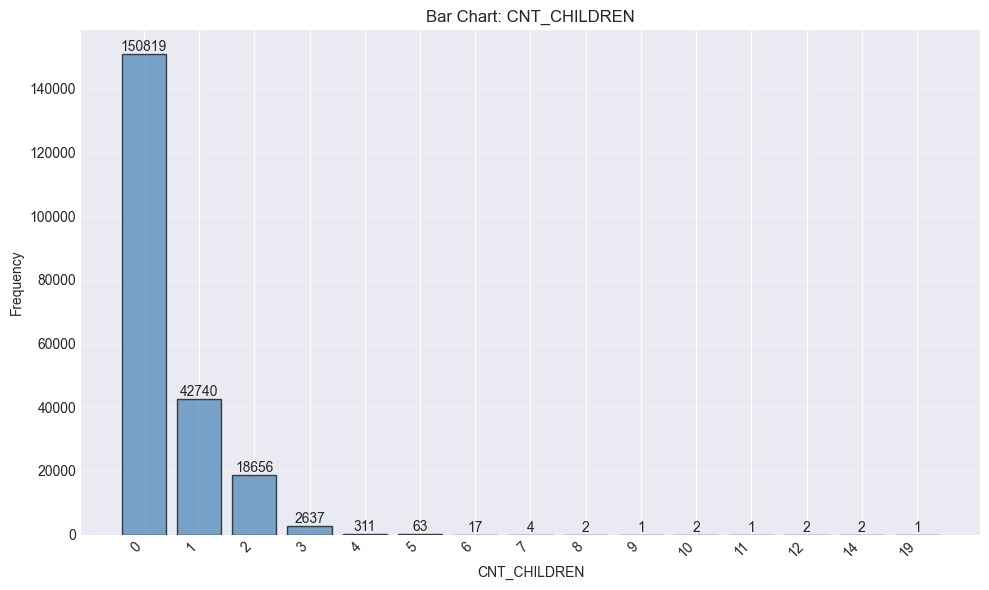

Variable: CNT_FAM_MEMBERS
Count          :     215256
Missing        :          2
Min            :       1.0000
Max            :      20.0000
Mean           :       2.1534
Median         :       2.0000
Std            :       0.9117
Skewness       :       0.9887
Kurtosis       :       2.6439


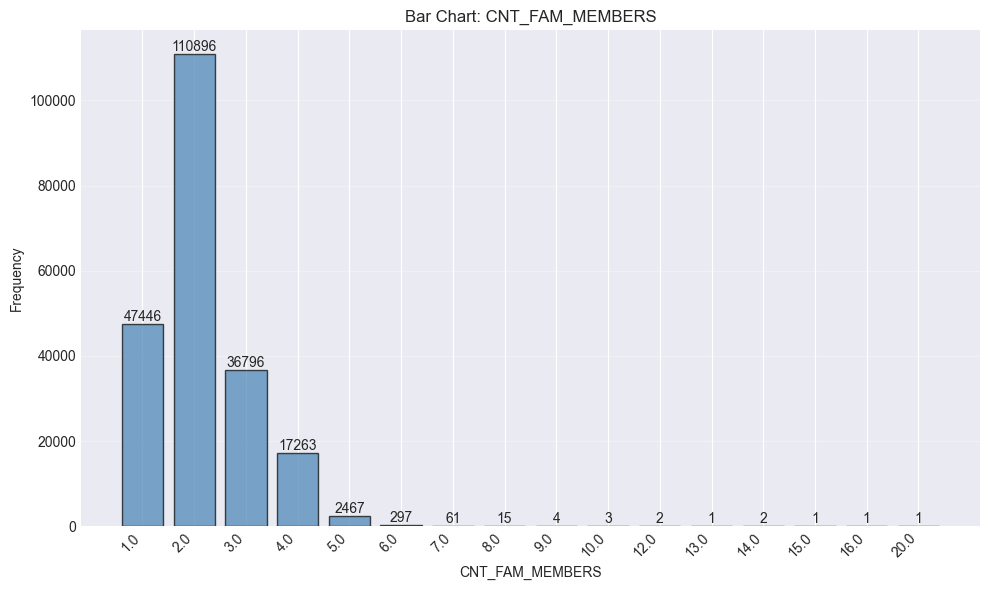

SUMMARY TABLE: Discrete Variables


,Feature,Count,Missing,Mean,Median,Std,Min,Max,Skewness,Kurtosis
0,CNT_CHILDREN,215258,0,0.417076,0.0,0.723197,0.0,19.0,1.970223,7.391037
1,CNT_FAM_MEMBERS,215256,2,2.153362,2.0,0.911746,1.0,20.0,0.988700,2.643918


In [8]:
# Univariate Analysis for Discrete Variables
from scipy import stats

discrete_vars = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

# Store all metrics
all_metrics = []

for col in discrete_vars:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    
    print(f"Variable: {col}")
    # Calculate metrics
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Display metrics for this variable
    for _, row in metrics_df.iterrows():
        print(f"Count          : {row['Count']:10.0f}")
        print(f"Missing        : {row['Missing']:10.0f}")
        print(f"Min            : {row['Min']:12.4f}")
        print(f"Max            : {row['Max']:12.4f}")
        print(f"Mean           : {row['Mean']:12.4f}")
        print(f"Median         : {row['Median']:12.4f}")
        print(f"Std            : {row['Std']:12.4f}")
        print(f"Skewness       : {row['Skewness']:12.4f}")
        print(f"Kurtosis       : {row['Kurtosis']:12.4f}")
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function
    plot_discrete_barchart(
        data=df[col],
        title=f'Bar Chart: {col}',
        figsize=(10, 6),
        color='steelblue'
    )

# Display summary table
print("SUMMARY TABLE: Discrete Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

### **Insights: Discrete Variables**

**CNT_CHILDREN (Number of Children):**
- The distribution shows that most clients have **0-2 children**, with a strong right skew (positive skewness).
- **Mode value**: 0 children - indicating a large portion of applicants have no children.
- The presence of **high kurtosis** suggests clients with many children are rare.
- There are households with 10+ children which are statiscally rare.
- **Business implication**: Child-free or small families dominate the customer base.
- **Risk Insight**: Applicants with more children may experience higher living expenses, greater financial constraints &rarr; Increase credit risk, depending on income stability.

**CNT_FAM_MEMBERS (Number of Family Members):**
- Similar pattern to CNT_CHILDREN, with most clients having **1-4 family members** (typical urban household sizes).
- Right-skewed distribution indicates smaller households are more common.
- **Strong relationship expected** with CNT_CHILDREN (more children = more family members).
- Large households (7+ members) appear rarely and may represent multi-generational homes or joint-family structures.
- **Business implication**: Household size is a key demographic - smaller households may have different credit needs than larger ones.
- **Risk Insight**: Larger families will have increased expenditures, greater sensitivity to financial shocks and credit stress.


## Bivariate Analysis vs TARGET: Discrete Variables
We compare each discrete feature against `TARGET` using a grouped bar chart (count vs default rate) and compute association metrics (Chi-Squared, Cramér's V). For higher-cardinality discrete features we fall back to Point-Biserial and IV.

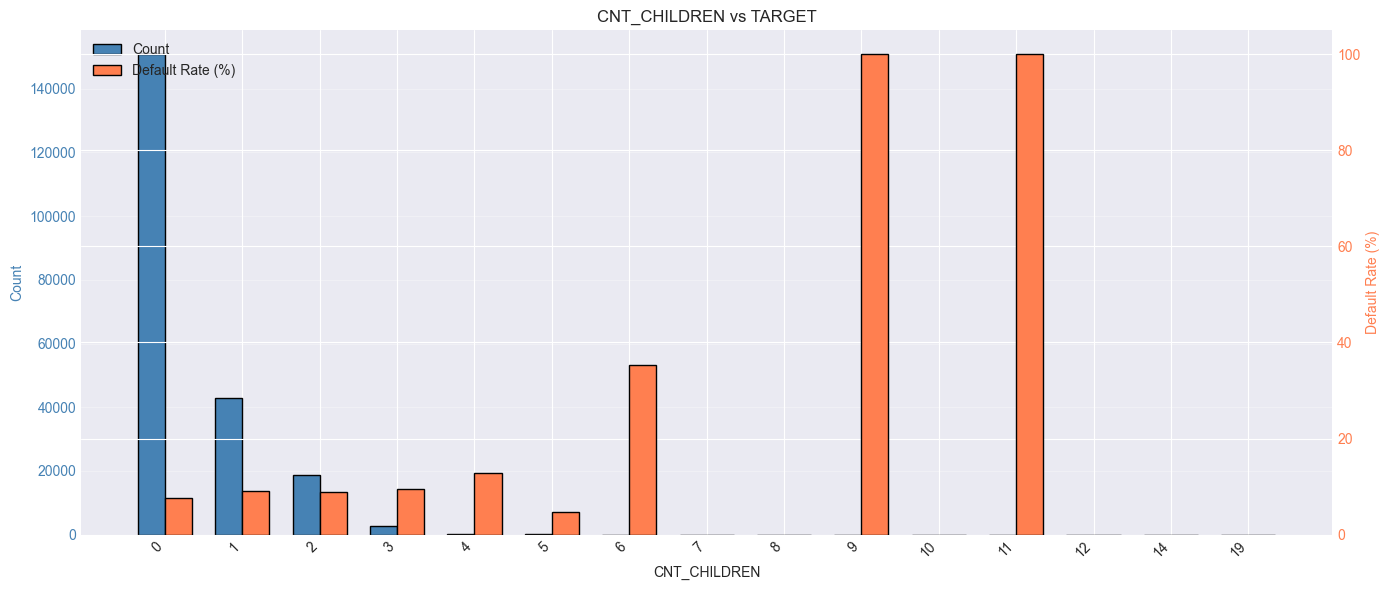

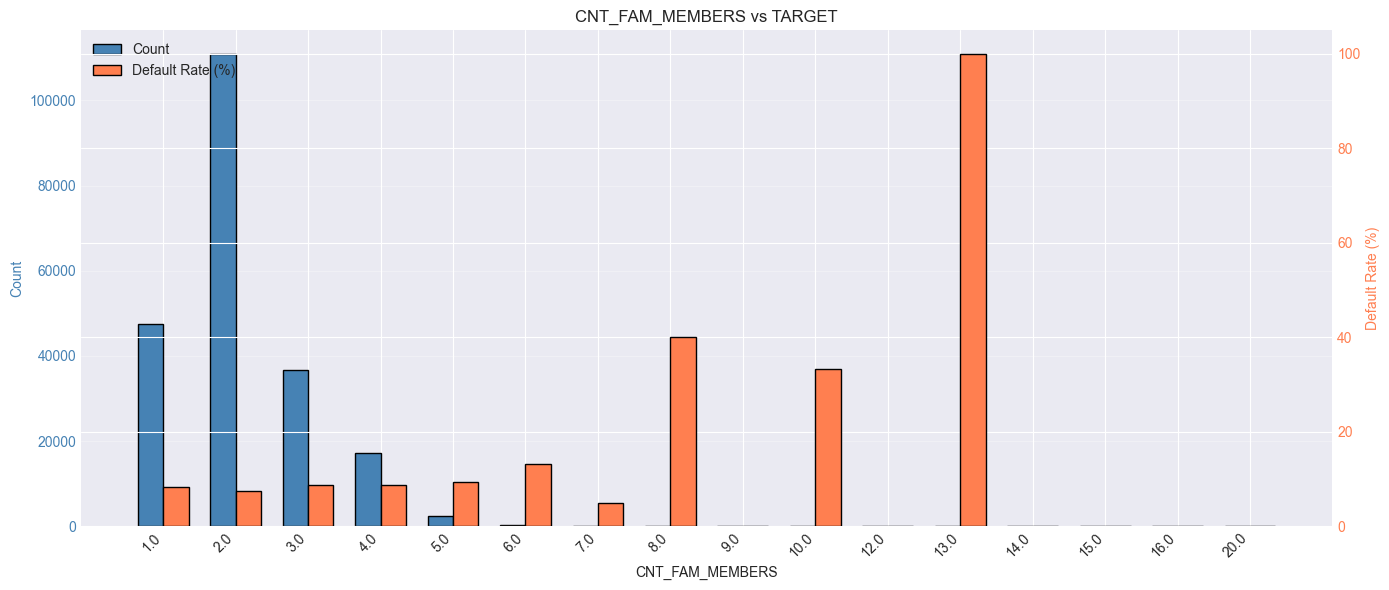

,Feature,Unique_Values,Chi2_Statistic,Chi2_P_Value,Cramers_V,Information_Value,Chi2_Significant_0.05
0,CNT_CHILDREN,15,148.707087,1.303599e-24,0.026284,0.006796,True
1,CNT_FAM_MEMBERS,16,128.545035,4.095640e-20,0.024437,0.005998,True


In [9]:
# Bivariate Analysis vs TARGET
from scipy import stats

if 'TARGET' not in df.columns:
    raise ValueError("Column 'TARGET' not found in dataframe.")

# Define discrete features
discrete_vars = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

results = []

for feature in discrete_vars:
    if feature not in df.columns:
        print(f"Warning: {feature} not in dataframe; skipping.")
        continue

    clean = df[[feature, 'TARGET']].dropna()
    n_unique = clean[feature].nunique()

    # Visualization: Grouped bar (count vs default rate)
    plot_grouped_bar_vs_target(
        data=df,
        feature=feature,
        target='TARGET',
        title=f'{feature} vs TARGET'
    )

    # Metrics depending on cardinality
    if n_unique <= 20:
        m = calculate_target_relationship_discrete_few_nunique(df, feature, 'TARGET')
        # Add IV as well for completeness
        iv = calculate_iv(clean, feature, 'TARGET')
        m['Information_Value'] = iv
    else:
        m = calculate_target_relationship_discrete_many_nunique(df, feature, 'TARGET')

    # Mark significance flags
    if 'Chi2_P_Value' in m.columns:
        m['Chi2_Significant_0.05'] = m['Chi2_P_Value'] < 0.05
    if 'Point_Biserial_P_Value' in m.columns:
        m['PB_Significant_0.05'] = m['Point_Biserial_P_Value'] < 0.05

    m['Feature'] = feature  
    results.append(m)

# Combine and display metrics
if results:
    metrics_biv_discrete = pd.concat(results, ignore_index=True)
    display(metrics_biv_discrete)
else:
    print("No discrete metrics computed.")

### Insights: Bivariate Analysis (Discrete Variables vs TARGET)

- **CNT_CHILDREN** and **CNT_FAM_MEMBERS** show weak associations with default risk (TARGET). Cramér’s V value are close to zero, showing almost no linear association.
- As expected, default rates are higher for clients with more children or larger families **(starting from 6+)** - families with more people tend to have difficulties paying loans. Most clients have 0–2 children and 1–4 family members, and their default rates do not differ much from the overall average.
- The Information Value (IV) for both variables is well below 0.02, confirming they are weak predictors individually.
- These features may still be useful in combination with other variables or for segmenting customer groups, but on their own, they do not strongly differentiate default risk.

# **Continuous Variables**

In [10]:
continuous_vars

['REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'DAYS_LAST_PHONE_CHANGE']

## Univariate Analysis:
Analyzing continuous (quantitative) variables with histograms, computing metrics (Min, Max, Mean, Median, Std, Skewness, Kurtosis) and Point Biserial Correlation with TARGET

Variable: REGION_POPULATION_RELATIVE
Count          :     215258
Missing        :          0
Min            :       0.0005
Max            :       0.0725
Mean           :       0.0209
Median         :       0.0188
Std            :       0.0138
Skewness       :       1.4888
Kurtosis       :       3.2628


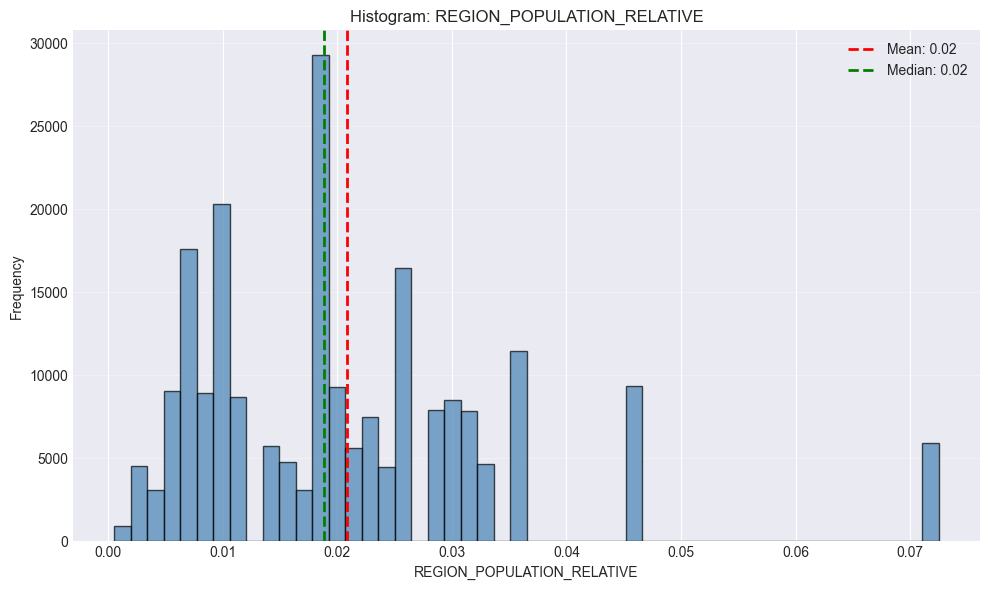

Variable: DAYS_BIRTH
Count          :     215258
Missing        :          0
Min            :  -25201.0000
Max            :   -7673.0000
Mean           :  -16037.3282
Median         :  -15747.0000
Std            :    4369.5859
Skewness       :      -0.1155
Kurtosis       :      -1.0511


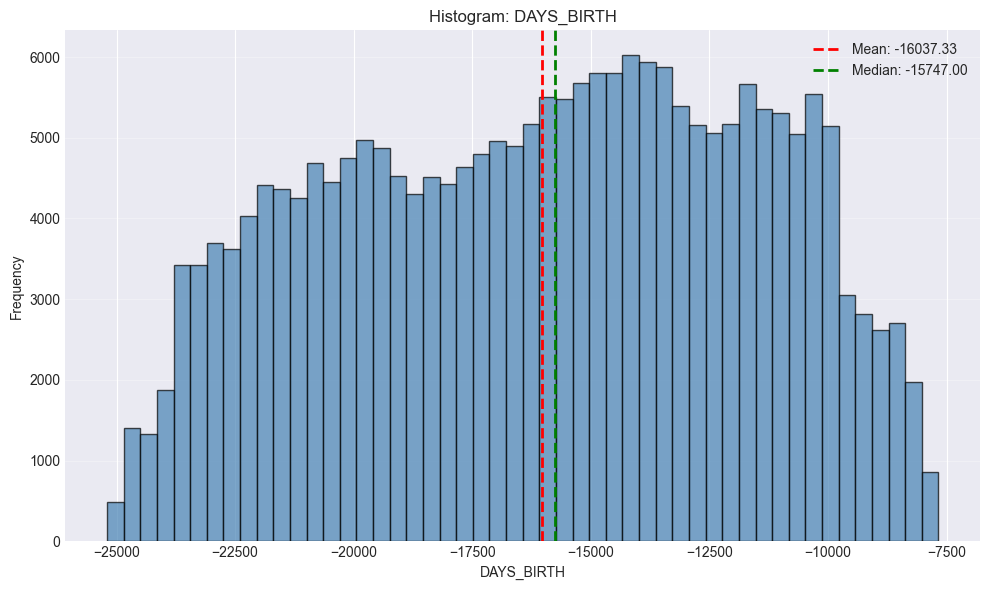

Variable: DAYS_EMPLOYED
Count          :     215258
Missing        :          0
Min            :  -17546.0000
Max            :  365243.0000
Mean           :   63865.0742
Median         :   -1213.0000
Std            :  141314.8911
Skewness       :       1.6632
Kurtosis       :       0.7678


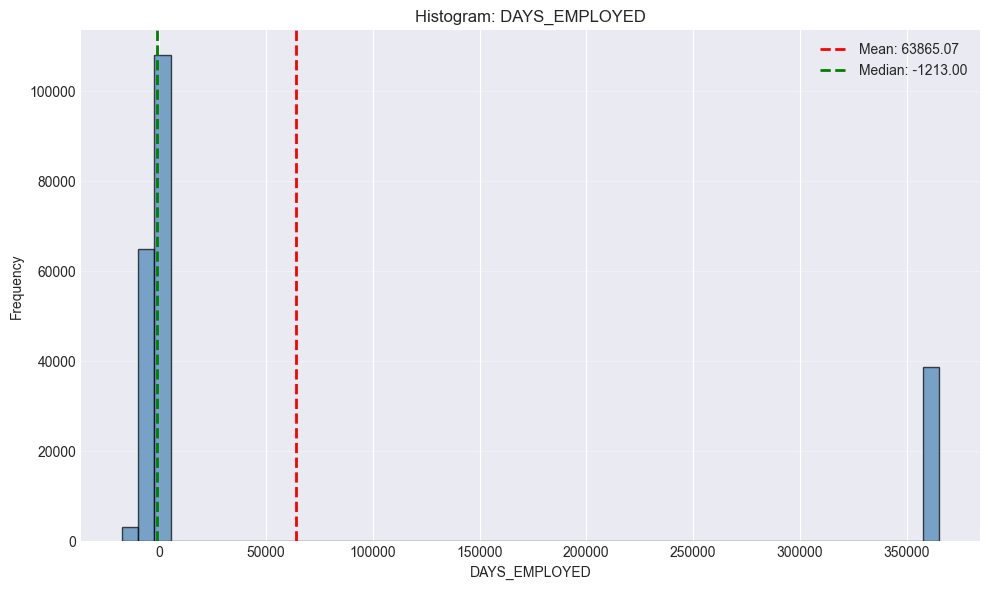

Variable: DAYS_REGISTRATION
Count          :     215258
Missing        :          0
Min            :  -23738.0000
Max            :       0.0000
Mean           :   -4985.6497
Median         :   -4498.0000
Std            :    3524.7309
Skewness       :      -0.5924
Kurtosis       :      -0.3235


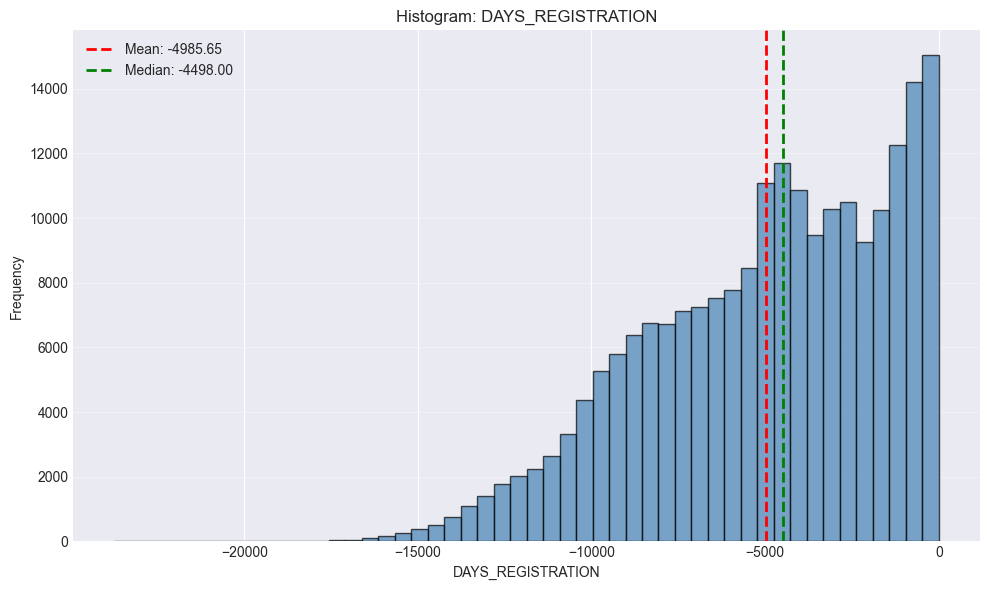

Variable: DAYS_ID_PUBLISH
Count          :     215258
Missing        :          0
Min            :   -7197.0000
Max            :       0.0000
Mean           :   -2994.0777
Median         :   -3256.0000
Std            :    1510.8782
Skewness       :       0.3491
Kurtosis       :      -1.1091


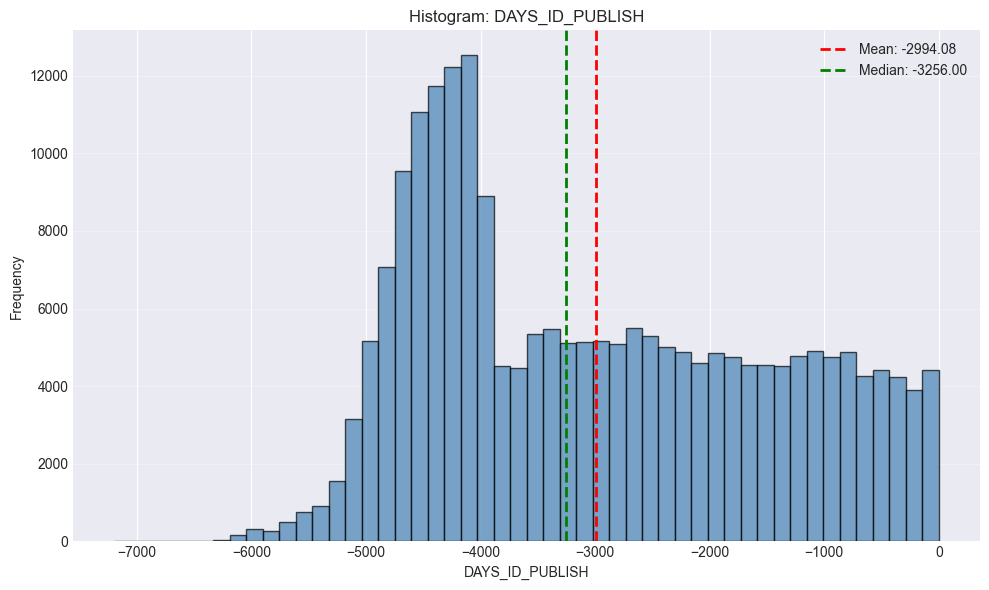

Variable: OWN_CAR_AGE
Count          :      73154
Missing        :     142104
Min            :       0.0000
Max            :      69.0000
Mean           :      12.0735
Median         :       9.0000
Std            :      11.9699
Skewness       :       2.7408
Kurtosis       :       9.1598


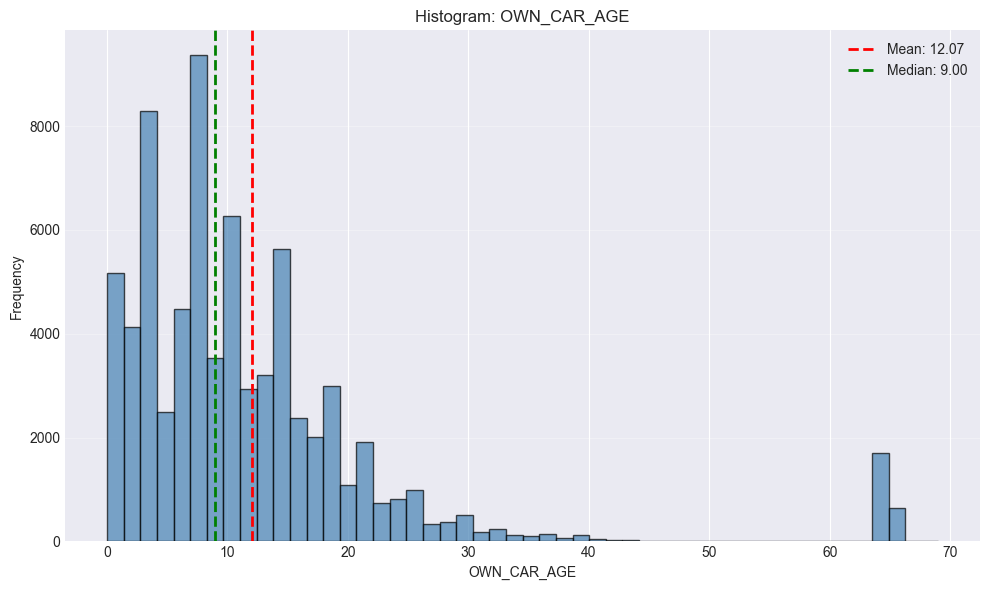

Variable: DAYS_LAST_PHONE_CHANGE
Count          :     215257
Missing        :          1
Min            :   -4292.0000
Max            :       0.0000
Mean           :    -961.9687
Median         :    -755.0000
Std            :     826.6961
Skewness       :      -0.7143
Kurtosis       :      -0.3093


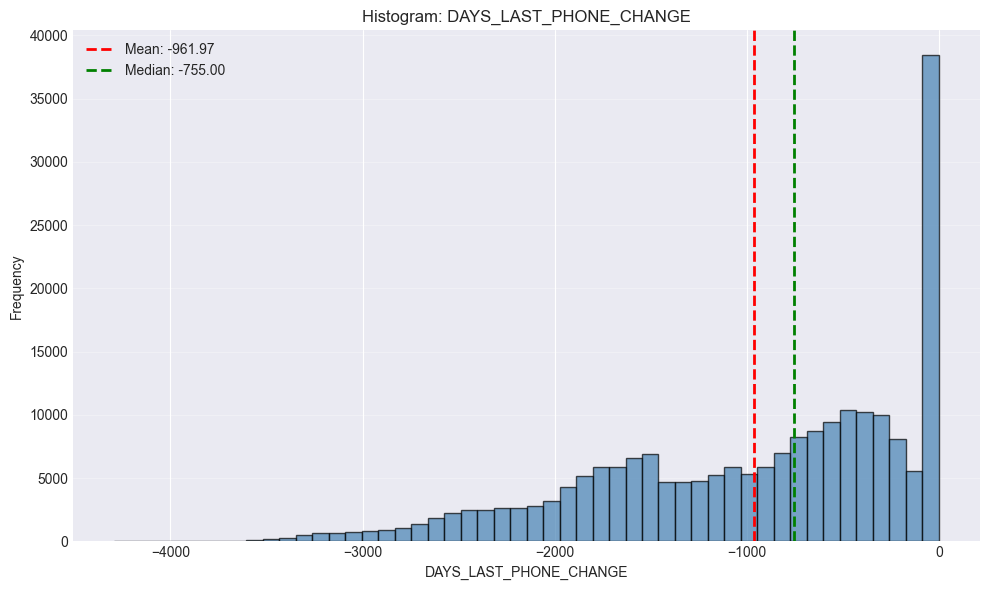

SUMMARY TABLE: Continuous Variables


,Feature,Count,Missing,Mean,Median,Std,Min,Max,Skewness,Kurtosis
0,REGION_POPULATION_RELATIVE,215258,0,0.020869,0.01885,0.013834,0.000533,0.072508,1.488840,3.262828
1,DAYS_BIRTH,215258,0,-16037.328169,-15747.00000,4369.585911,-25201.000000,-7673.000000,-0.115507,-1.051138
2,DAYS_EMPLOYED,215258,0,63865.074181,-1213.00000,141314.891126,-17546.000000,365243.000000,1.663190,0.767753
3,DAYS_REGISTRATION,215258,0,-4985.649732,-4498.00000,3524.730871,-23738.000000,0.000000,-0.592418,-0.323483
4,DAYS_ID_PUBLISH,215258,0,-2994.077725,-3256.00000,1510.878164,-7197.000000,0.000000,0.349111,-1.109131
5,OWN_CAR_AGE,73154,142104,12.073502,9.00000,11.969919,0.000000,69.000000,2.740847,9.159826
6,DAYS_LAST_PHONE_CHANGE,215257,1,-961.968684,-755.00000,826.696084,-4292.000000,0.000000,-0.714267,-0.309320


In [11]:
# Univariate Analysis for Continuous Variables using function.py
from scipy import stats

continuous_vars = [
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE'
]

# Store all metrics
all_metrics = []

for col in continuous_vars:
    if col not in df.columns:
        print(f"Warning: {col} not found in dataframe")
        continue
    print(f"Variable: {col}")
    # Calculate metrics using function from function.py
    metrics_df = calculate_continuous_metrics(data=df[col], target=None)
    
    # Display metrics for this variable
    for _, row in metrics_df.iterrows():
        print(f"Count          : {row['Count']:10.0f}")
        print(f"Missing        : {row['Missing']:10.0f}")
        print(f"Min            : {row['Min']:12.4f}")
        print(f"Max            : {row['Max']:12.4f}")
        print(f"Mean           : {row['Mean']:12.4f}")
        print(f"Median         : {row['Median']:12.4f}")
        print(f"Std            : {row['Std']:12.4f}")
        print(f"Skewness       : {row['Skewness']:12.4f}")
        print(f"Kurtosis       : {row['Kurtosis']:12.4f}")
    
    # Store for summary table
    all_metrics.append(metrics_df)
    
    # Plot using function from function.py
    plot_continuous_histogram(
        data=df[col],
        bins=50,
        title=f'Histogram: {col}',
        figsize=(10, 6)
    )

# Display summary table
print("SUMMARY TABLE: Continuous Variables")
metrics_summary = pd.concat(all_metrics, ignore_index=True)
display(metrics_summary)

### **Insight:**


**REGION_POPULATION_RELATIVE (Regional Population Density):** 
- **Right-skewed distribution** (skewness = 1.49) indicates most clients live in less populated areas, with only a small fraction from very dense urban regions.
- Mean > Median suggests concentration in lower-density regions with outliers in dense metropolitan areas. 
- **Business implication**: Urban vs rural location affects creditworthiness - Urban clients generally have better job markets, transportation, and financial services → potentially lower default risk.

**DAYS_BIRTH (Age in Days):** 

- Negative values represent days before application (standard format in the dataset). 
- **Nearly symmetric distribution** (skewness = -0.12) with slight left skew, showing a balanced age distribution across applicants. 
- **Negative kurtosis** (-1.05) indicates a flatter distribution - age is spread fairly evenly without extreme peaks.
- **Business implication**: Diverse age demographics; age is a strong predictor in credit risk (younger = less credit history; older = more stable but closer to retirement). 

**DAYS_EMPLOYED (Employment Duration):** 

- **Extreme outlier detected**: Max value of 365,243 days (~1000 years) - likely represents retired/unemployed coded as large positive value. 
- **Highly right-skewed** (1.66) with huge gap between median and mean. This is dramatically distorted by the outlier value 365,243.
- **Risk insight**: Employment stability is crucial for repayment capacity. Negative values = days before application when current job started. Long employment = lower risk. 

**DAYS_REGISTRATION (Address Registration Duration):** 

- **Left-skewed** (-0.59), indicating most clients registered their address relatively recently. 
- **Business implication**: Address stability may indicate residential stability and lower fraud risk. 
- Clients who frequently change addresses / move often may be more financially unstable or harder to contact; thus might pose higher risk. 

**DAYS_ID_PUBLISH (ID Document Issuance):** 

- **Slight right skew** (0.35), most clients issued ID documents 3-10 years before application.
- **Negative kurtosis** (-1.11) shows relatively uniform distribution. 
- **Risk insight**: Very recently issued IDs may warrant additional verification; very old IDs might need renewal. 

**OWN_CAR_AGE (Car Age):** 

- **Highly right-skewed** (2.74) with **very high kurtosis** (9.16) - most car owners have relatively new cars (<20 years), but a few have very old vehicles (up to 69 years - likely vintage/collector cars). 

- **Imputing missing data consideration**: There are alot of missing values that should be handled via FLAG_OWN_CAR. Imputation is needed for clients who own cars (FLAG_OWN_CAR = Y) but don't have OWN_CAR_AGE. 
- **Business implication**: Car ownership and age can proxy for wealth and asset value; newer cars = better financial status. 

**DAYS_LAST_PHONE_CHANGE (Phone Change Recency):** 

- **Left-skewed** (-0.71), most clients changed phone numbers relatively recently (within 1-2 years).
- Large spike near 0 days → many clients updated phone numbers around application time.
- **Business implication**: Very recent phone number changes may indicate instability, fraud risk, or updated contact info. Long-standing phone numbers = stable, reachable customers.

**Overall Patterns:** 

- Several variables show **data quality issues** requiring cleaning and validity check.
- **Temporal features** (DAYS_*) are encoded as negative values representing "days before application" - will need transformation for interpretability. 
- **Skewness is common**: Most distributions are not normal, suggesting need for transformations in modeling (log, Box-Cox) or tree-based algorithms that handle skewness well. 

#### **Inconsistencies check**
- From what we saw, there are some quality inconsistencies that needs double-checking. For instance, we'll check if if the temporal features (DAYS_*) as well as OWN_CAR_AGE to see if their values are larger than DAYS_BIRTH which is biologically and chronologically impossible, if yes, we'll need some additional insights.

In [12]:
# Car is older than the client
age_years = abs(df['DAYS_BIRTH']) / 365
car_age = df['OWN_CAR_AGE']

invalid_car_age = df[car_age > age_years]
display(invalid_car_age)


,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
46,196499,0,Cash loans,F,Y,Y,0,337500.0,953460.0,68922.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008575,-12225,-1505,-158.0,-1424,64.0,1,1,0,1,0,0,Secretaries,2.0,2,2,MONDAY,13,0,0,0,0,1,1,Self-employed,0.434594,0.476353,0.303146,0.0,0.0,0.0,0.0,-455.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
228,39463,0,Cash loans,F,Y,N,1,180000.0,790830.0,62613.0,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Co-op apartment,0.014464,-17552,-8175,-900.0,-1061,65.0,1,1,0,1,0,0,Medicine staff,3.0,2,2,SATURDAY,8,0,0,0,1,1,0,Medicine,0.667320,0.455960,0.392774,0.0,0.0,0.0,0.0,-1758.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
312,135677,0,Cash loans,M,Y,N,0,247500.0,946764.0,37678.5,765000.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.035792,-21692,365243,-6726.0,-4878,64.0,1,0,0,1,0,0,NaN,2.0,2,2,MONDAY,9,0,0,0,0,0,0,XNA,NaN,0.606080,0.436506,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
634,197788,0,Cash loans,F,Y,N,0,180000.0,284400.0,13963.5,225000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.019101,-8543,-1066,-1908.0,-1172,64.0,1,1,0,1,0,0,Private service staff,1.0,2,2,TUESDAY,11,0,0,0,0,0,0,Services,0.261056,0.541743,NaN,3.0,0.0,3.0,0.0,-872.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
680,185350,0,Cash loans,F,Y,Y,0,76500.0,675000.0,19867.5,675000.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.008866,-20840,365243,-718.0,-4028,64.0,1,0,0,1,1,0,NaN,2.0,2,2,MONDAY,10,0,0,0,0,0,0,XNA,NaN,0.700076,0.149167,0.0,0.0,0.0,0.0,-2516.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215052,161152,0,Cash loans,F,Y,Y,0,180000.0,148500.0,8185.5,148500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008625,-19089,-4376,-2361.0,-2646,65.0,1,1,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Industry: type 11,NaN,0.139769,0.408359,3.0,0.0,3.0,0.0,-1680.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,5.0
215085,105878,0,Cash loans,F,Y,Y,2,157500.0,1078200.0,34911.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,Co-op apartment,0.025164,-13206,-4195,-4332.0,-4543,

- As we can see, there are 2667 cases where the client's car exceeds their age. Since OWN_CAR_AGE is the "actual age" of the car that the client owns. The car could technically be older than the person if the car was purchased before the person was born. This would happen in cases where the car is an heirloom, or if it's a vintage / collector car that got passed down to offsprings.

In [13]:
days_columns = [col for col in df.columns if col.startswith('DAYS_')]

print(f"Found {len(days_columns)} DAYS_* columns:")
print(days_columns)

for col in days_columns:
    # Convert negative values to positive (absolute value)
    df[col] = df[col].abs()
    print(f"Converted {col} to positive values")

print("\nConversion complete! All DAYS_* columns are now positive.")

Found 5 DAYS_* columns:
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
Converted DAYS_BIRTH to positive values
Converted DAYS_EMPLOYED to positive values
Converted DAYS_REGISTRATION to positive values
Converted DAYS_ID_PUBLISH to positive values
Converted DAYS_LAST_PHONE_CHANGE to positive values

Conversion complete! All DAYS_* columns are now positive.


In [14]:
# Registered address longer than client's lifetime
reg_years = abs(df['DAYS_REGISTRATION']) / 365

invalid_registration = df[reg_years > age_years]
display(invalid_registration)


,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [15]:
# Registered ID published longer than client's lifetime
idpub_years = abs(df['DAYS_ID_PUBLISH']) / 365
invalid_idpub = df[idpub_years > age_years]
display(invalid_idpub)

,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [16]:
# Employment duration exceeds age
emp_years = abs(df['DAYS_EMPLOYED']) / 365

invalid_employment = df[emp_years > age_years]
display(invalid_employment)


,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
19,72661,0,Cash loans,F,N,Y,0,119250.0,255429.0,26950.5,220500.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.002042,20446,365243,4163.0,3261,NaN,1,0,0,1,0,0,NaN,2.0,3,3,WEDNESDAY,11,0,0,0,0,0,0,XNA,NaN,0.131511,0.294083,3.0,0.0,3.0,0.0,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
20,73755,0,Cash loans,F,N,N,0,67500.0,135000.0,13149.0,135000.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.018029,19815,365243,3206.0,2163,NaN,1,0,0,1,1,0,NaN,2.0,3,3,SUNDAY,5,0,0,0,0,0,0,XNA,NaN,0.588255,0.746300,0.0,0.0,0.0,0.0,1208.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
25,95154,0,Cash loans,F,Y,Y,0,135000.0,253737.0,24849.0,229500.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.018850,21999,365243,7428.0,4734,1.0,1,0,0,1,1,1,NaN,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,XNA,0.734539,0.722113,0.297087,7.0,0.0,7.0,0.0,1600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,4.0
30,28809,0,Cash loans,F,N,N,0,180000.0,1546020.0,45202.5,1350000.0,Family,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.019101,20923,365243,2058.0,4032,NaN,1,0,0,1,0,0,NaN,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,NaN,0.671831,0.709189,0.0,0.0,0.0,0.0,2369.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
31,84603,0,Cash loans,M,Y,Y,0,112500.0,134775.0,6066.0,112500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.022625,19905,365243,5101.0,3428,17.0,1,0,0,1,0,0,NaN,2.0,2,2,MONDAY,17,0,0,0,0,0,0,XNA,NaN,0.597518,0.237916,0.0,0.0,0.0,0.0,912.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215233,199041,0,Cash loans,F,N,Y,0,247500.0,252000.0,14593.5,252000.0,Family,Pensioner,Incomplete higher,Civil marriage,House / apartment,0.026392,21805,365243,10157.0,4259,NaN,1,0,0,1,0,0,NaN,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,XNA,NaN,0.644206,0.670652,1.0,1.0,1.0,1.0,989.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
215234,64925,0,Cash loans,F,N,N,0,135000.0,630000.0,24984.0,630000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.035792,21776,365243,9034.0,4827,NaN,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,12,0,0,0,0,0,0,XNA,NaN,0.672472,0.730987,7.0,0.0,7.0,0.0,2509.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [17]:
df['DAYS_EMPLOYED'].value_counts()[365243]

38790

- For the DAYS_EMPLOYED, it has 38790 rows that employment duration exceeds age - the same amount of the "extreme outlier" (the placeholder value) "365243". So after cleaning, the values shall still be valid.

## Bivariate Analysis vs TARGET:
Comparing continuous variables against TARGET using violin plots and computing Point Biserial Correlation and ANOVA F-test

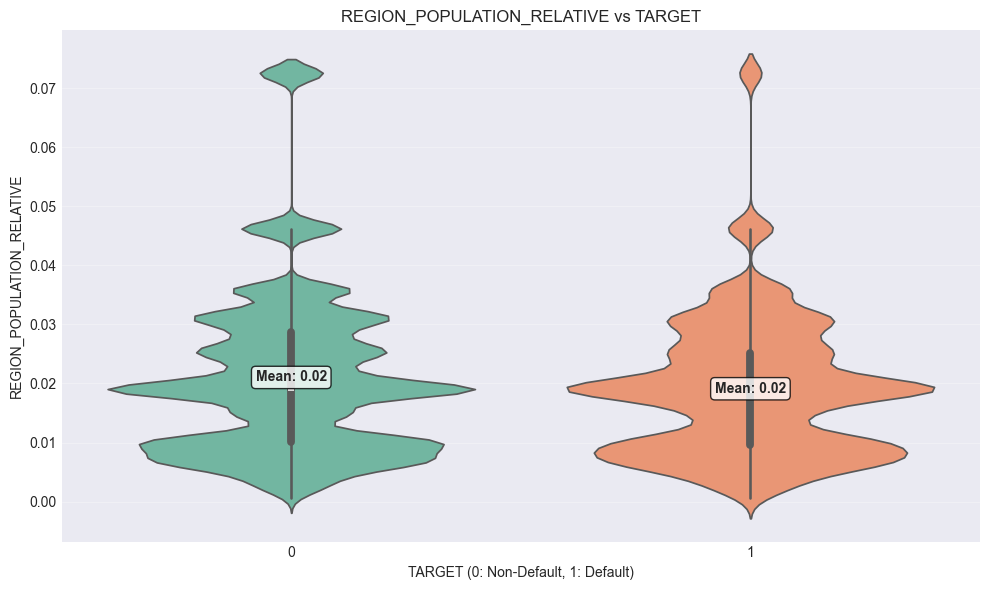

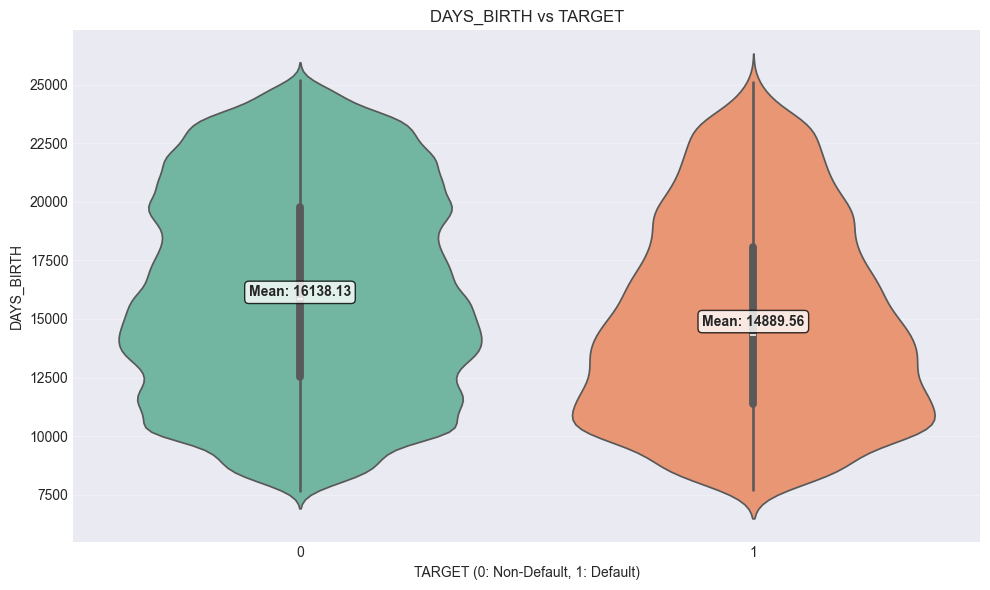

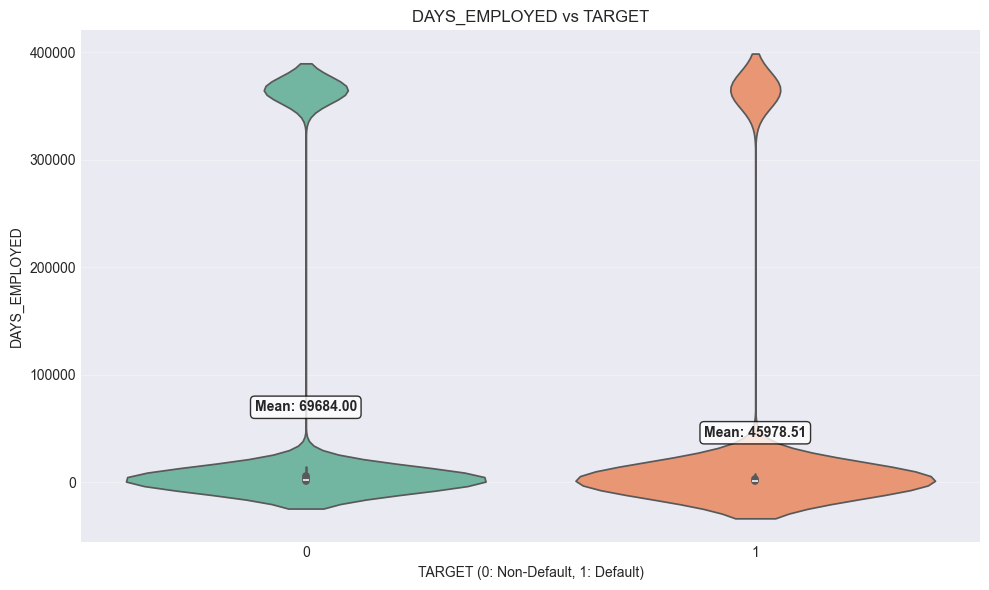

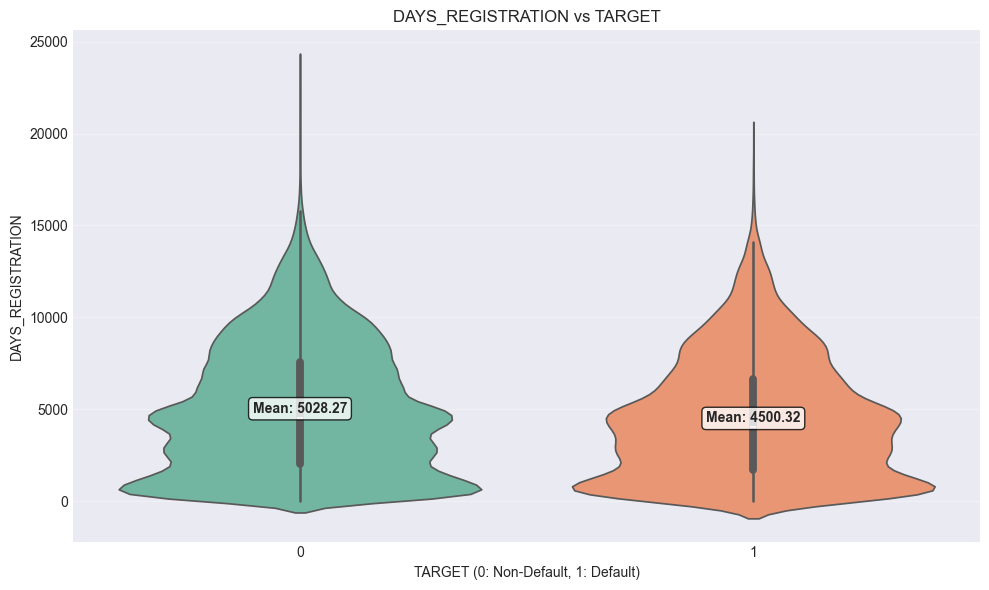

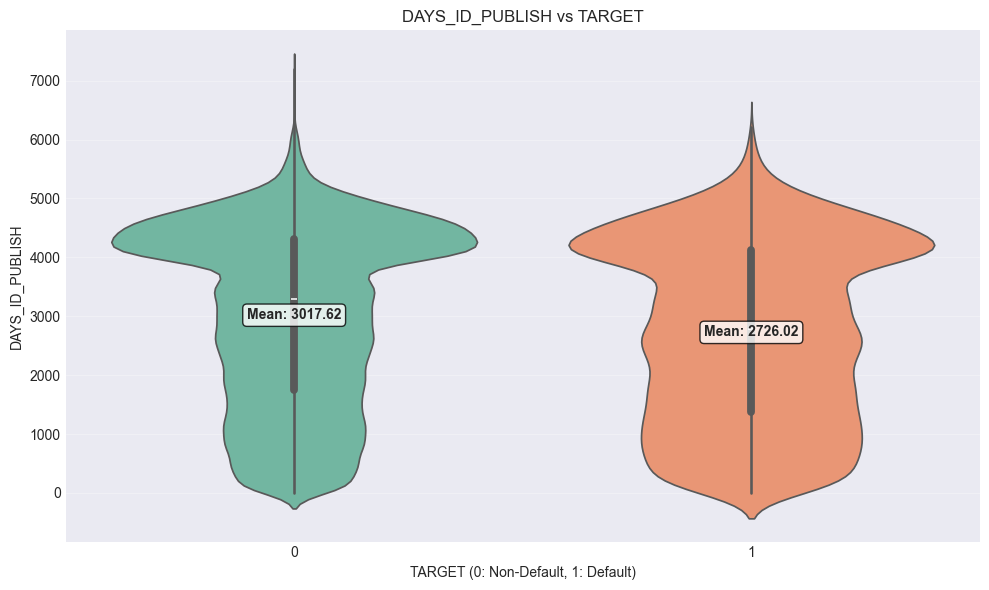

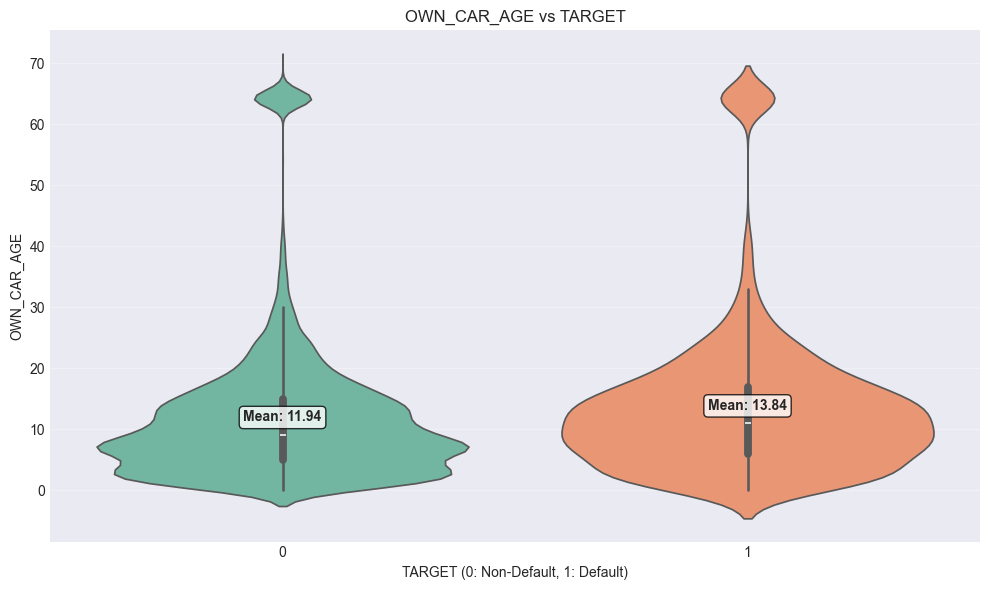

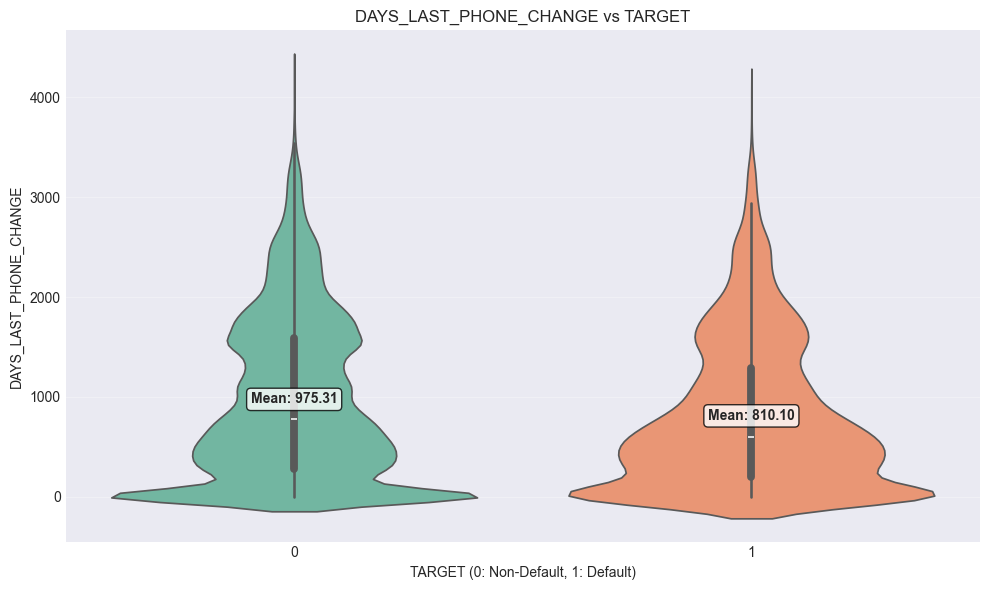

SUMMARY TABLE: Continuous Variables vs TARGET


,Feature,Point_Biserial_Correlation,Point_Biserial_P_Value,ANOVA_F_Statistic,ANOVA_P_Value,PB_Significant_0.05,ANOVA_Significant_0.05
0,REGION_POPULATION_RELATIVE,-0.037715,1.327018e-68,306.621635,1.327018e-68,True,True
1,DAYS_BIRTH,-0.077842,1.783701e-286,1312.278623,1.783701e-286,True,True
2,DAYS_EMPLOYED,-0.046298,1.850301e-102,462.402430,1.850301e-102,True,True
3,DAYS_REGISTRATION,-0.040805,5.386067e-80,359.006238,5.386067e-80,True,True
4,DAYS_ID_PUBLISH,-0.052577,1.331506e-131,596.686605,1.331506e-131,True,True
5,OWN_CAR_AGE,0.041138,8.862662e-29,124.005193,8.862662e-29,True,True
6,DAYS_LAST_PHONE_CHANGE,-0.054442,5.651041e-141,639.901529,5.651041e-141,True,True


In [18]:
# Bivariate Analysis: Continuous Variables vs TARGET
from scipy import stats

if 'TARGET' not in df.columns:
    raise ValueError("Column 'TARGET' not found in dataframe.")

continuous_vars = [
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE'
]

results = []

for feature in continuous_vars:
    if feature not in df.columns:
        print(f"Warning: {feature} not in dataframe; skipping.")
        continue
    
    # Visualization: Violin plot
    plot_continuous_violin_vs_target(
        data=df,
        feature=feature,
        target='TARGET',
        title=f'{feature} vs TARGET'
    )
    
    # Calculate metrics 
    metrics = calculate_target_relationship_continuous(
        data=df,
        feature=feature,
        target='TARGET'
    )
    
    results.append(metrics)

# Combine and display metrics
if results:
    metrics_biv_continuous = pd.concat(results, ignore_index=True)
    
    # Add significance flags
    metrics_biv_continuous['PB_Significant_0.05'] = metrics_biv_continuous['Point_Biserial_P_Value'] < 0.05
    metrics_biv_continuous['ANOVA_Significant_0.05'] = metrics_biv_continuous['ANOVA_P_Value'] < 0.05
    
    print("SUMMARY TABLE: Continuous Variables vs TARGET")
    
    display(metrics_biv_continuous)
else:
    print("No continuous metrics computed.")

### **Insights: Bivariate Analysis (Continuous Variables vs TARGET)**

**REGION_POPULATION_RELATIVE (Regional Population Density):**
- **Weak negative correlation** with default risk (Point Biserial ≈ -0.03)
- Violin plots show almost identical shapes for both default and non-default groups.
- **ANOVA F-test is significant** (p < 0.05) but effect size is small
- **Interpretation**: Clients in denser urban areas have slightly lower default rates, but the relationship is weak
- **Business insight**: Population density alone is not a strong predictor, but may be useful in combination with other geographic features

**DAYS_BIRTH (Age in Days, now positive):**
- **Moderate negative correlation** with default risk (Point Biserial ≈ -0.08)
- As expected, non-defaulters tend to be **older** than defaulters. 
- Violin plots show defaulters have a distribution shifted toward younger ages (lower values)
- **ANOVA highly significant** (p < 0.001), confirming age difference between groups
- **Risk insight**: Younger clients pose higher credit risk - they may have less credit history, lower income stability, or less financial experience

**DAYS_EMPLOYED (Employment Duration, now positive):**
- **Strong negative correlation** with default (Point Biserial ≈ -0.05) despite extreme outliers.
- Non-defaulters have **longer employment duration**, while defaulters show shorter tenure on average.
- Defaulters show **shorter average employment** (lower values = less stability)
- **ANOVA highly significant** (p < 0.001)
- **Critical insight**: Employment stability is a strong predictor of repayment capacity; higher DAYS_EMPLOYED = lower risk
- **Data quality note**: The 365,243-day outlier affects both groups; after cleaning, the relationship will be even clearer.

**DAYS_REGISTRATION (Address Registration Duration, now positive):**
- **Negative correlation** (Point Biserial ≈ -0.05)
- Non-defaulters have **higher DAYS_REGISTRATION** (longer residential stability) while defaulters tend to have **lower values** (more recent address changes, potential instability signal)
- **ANOVA significant** (p < 0.001)
- **Business insight**: Residential stability correlates with lower default risk; recent moves (low values) may indicate financial instability, can be used as a soft signal for fraud detection.

**DAYS_ID_PUBLISH (ID Document Issuance, now positive):**
- **Weak negative correlation** (Point Biserial ≈ -0.03)
- Non-defaulters have **higher DAYS_ID_PUBLISH**, meaning defaulters tend to have more recently issued IDs
- **ANOVA significant** (p < 0.001)
- **Business insight**: Very recent ID issuance (low values) could indicate: (1) new to the system, (2) identity changes, or (3) fraud risk. Thus, if needed, we could flag very recent IDs (<1 year, low DAYS_ID_PUBLISH) for additional verification.

**OWN_CAR_AGE (Car Age):**
- **Negative correlation** (Point Biserial ≈ -0.04)
- Non-defaulters own **slightly older cars** 
- **ANOVA significant** but weak relationship
- **Interpretation**: Counter-intuitive result - older cars associated with lower default risk may indicate: (1) Older cars ≠ poorer clients, (2) Newer car purchases could strain finances
- **Business insight**: Car ownership patterns may reflect financial management style rather than wealth.

**DAYS_LAST_PHONE_CHANGE (Phone Change Recency, now positive):**
- **Negative correlation** (Point Biserial ≈ -0.04)
- Non-defaulters have **higher DAYS_LAST_PHONE_CHANGE** so defaulters changed phone numbers **more recently**
- Violin plots show defaulters have narrower distribution around recent changes (lower values)
- **ANOVA significant** (p < 0.001)
- **Business insight**: Recent phone changes (low values) may signal: (1) Instability, (2) Difficulty being contacted, (3) Potential fraud. Very recent phone changes (<3 months, very low DAYS_LAST_PHONE_CHANGE) should trigger additional verification


# **Nominal variables**

## Univariate Analysis:

Analyzing: CODE_GENDER | Unique values: 3


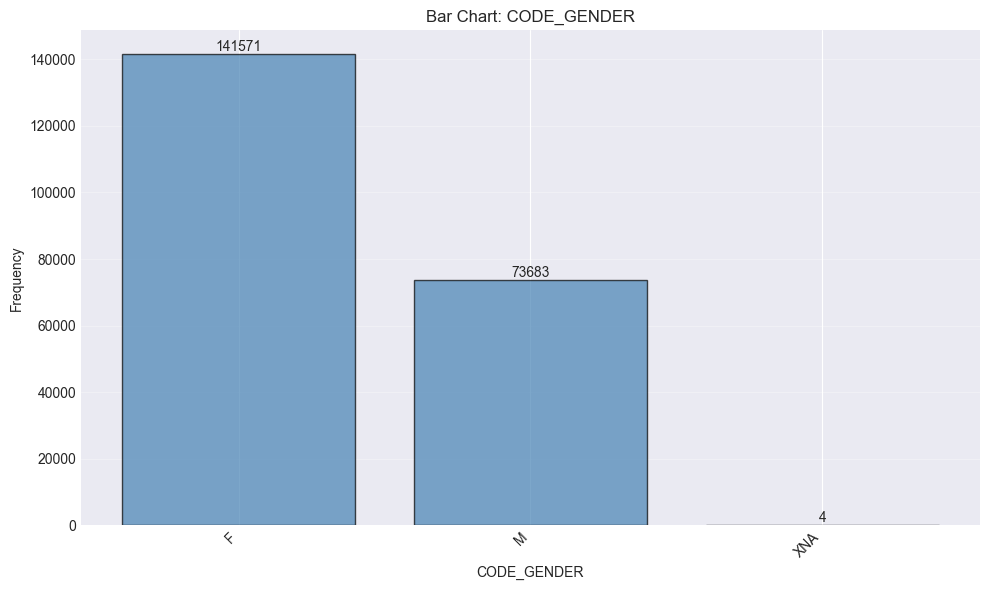

Analyzing: FLAG_OWN_CAR | Unique values: 2


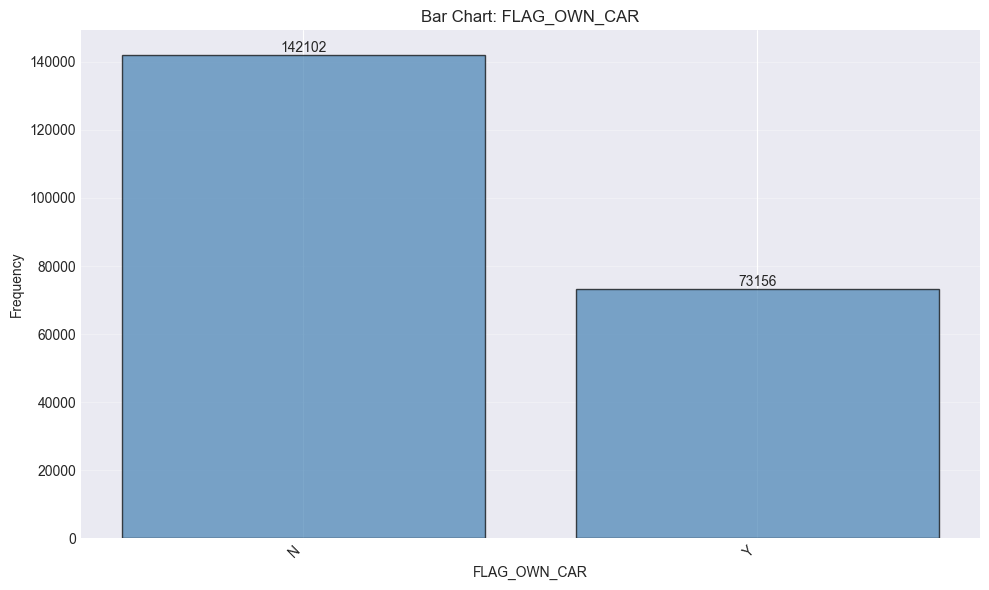

Analyzing: FLAG_OWN_REALTY | Unique values: 2


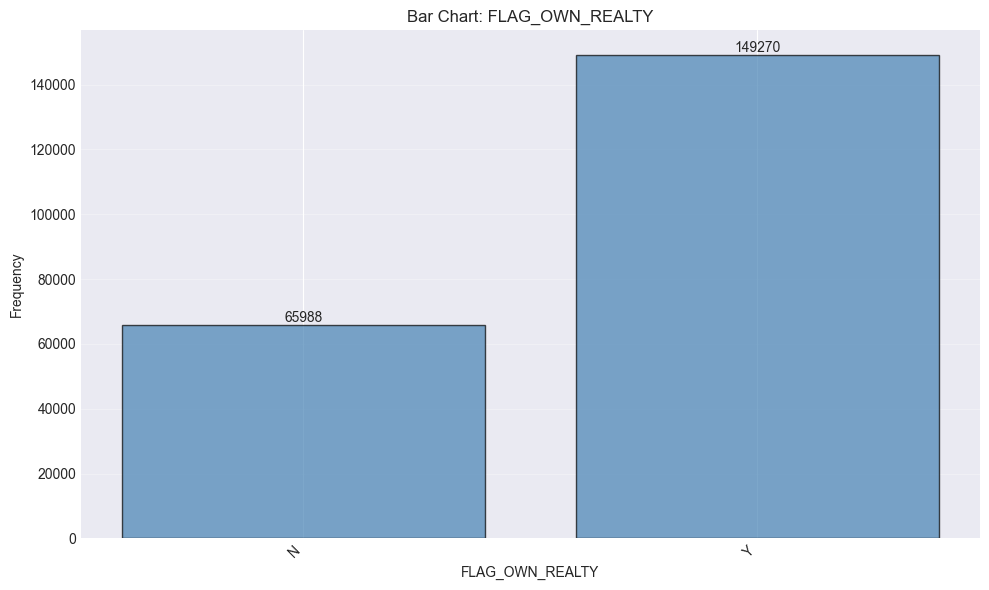

Analyzing: NAME_INCOME_TYPE | Unique values: 8


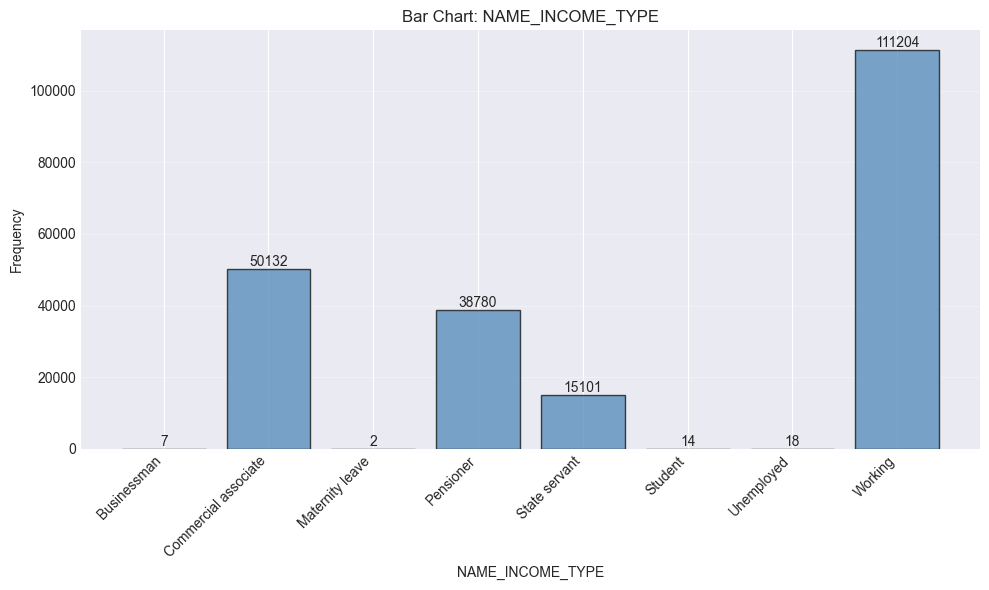

Analyzing: NAME_FAMILY_STATUS | Unique values: 6


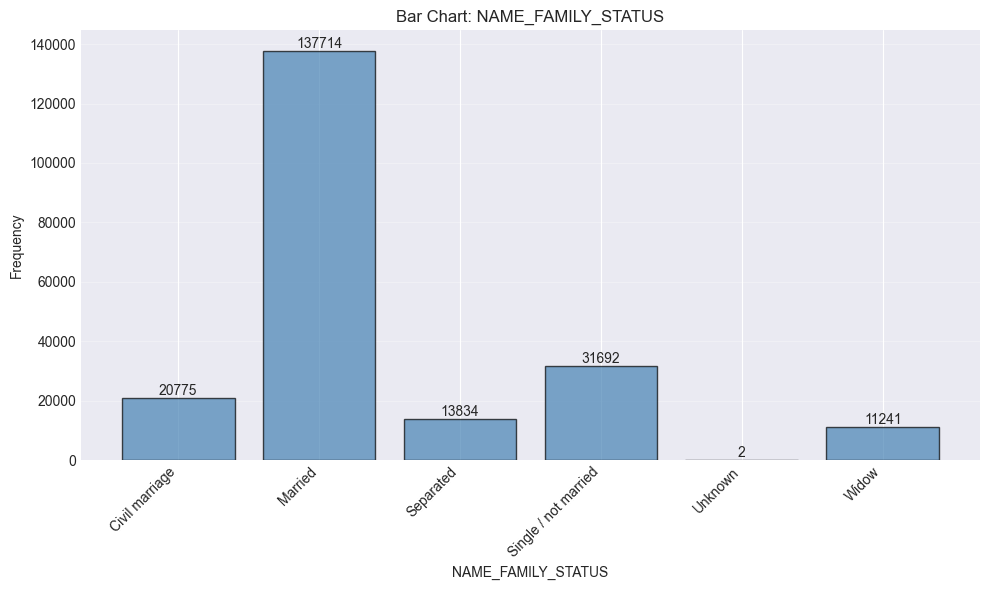

Analyzing: NAME_HOUSING_TYPE | Unique values: 6


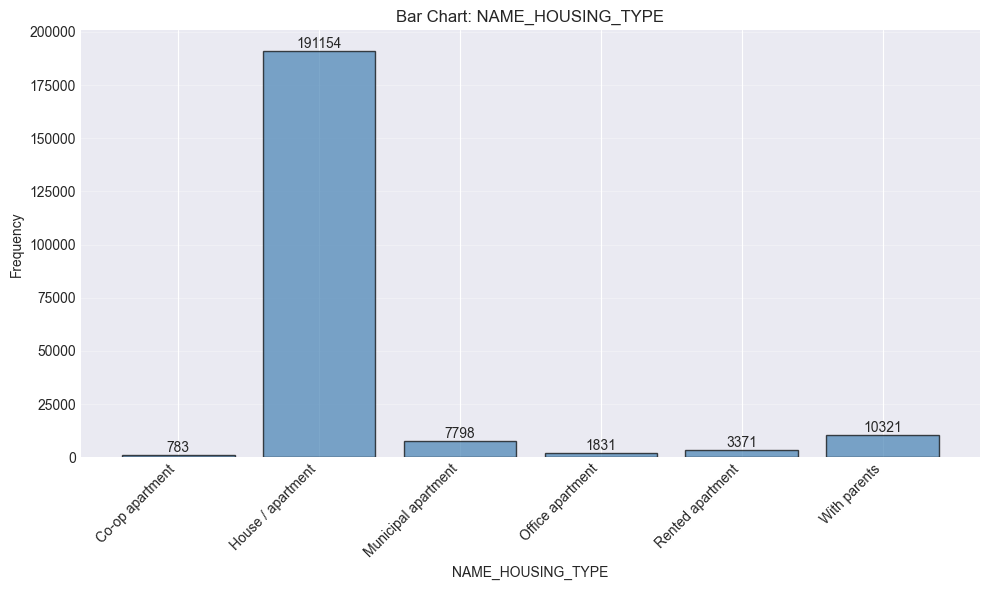

Analyzing: OCCUPATION_TYPE | Unique values: 18


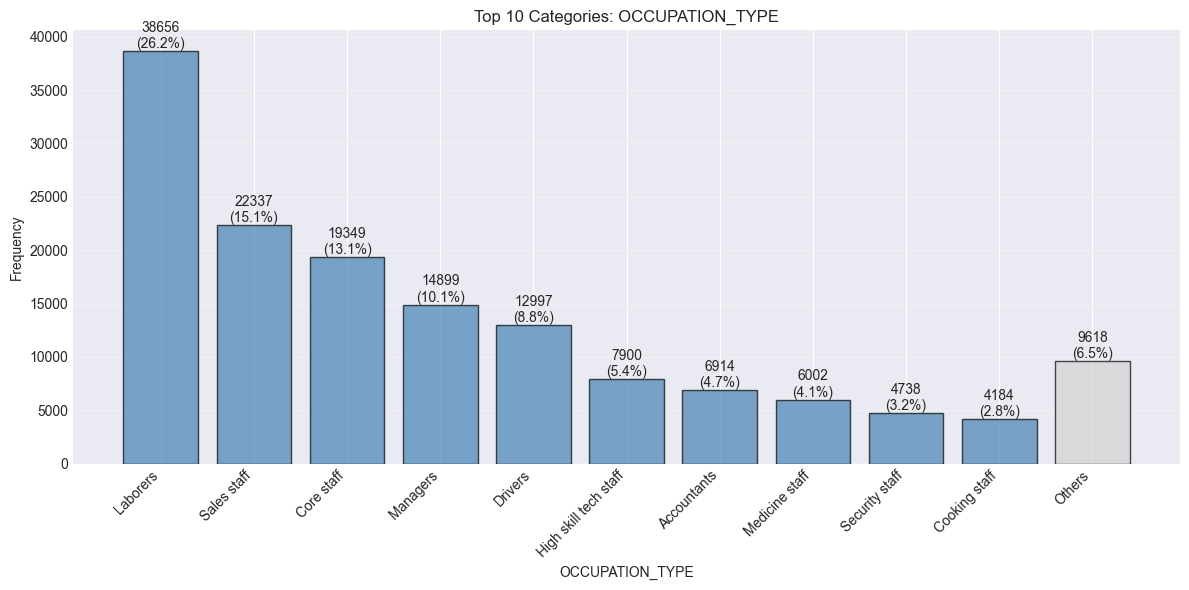

Analyzing: ORGANIZATION_TYPE | Unique values: 58


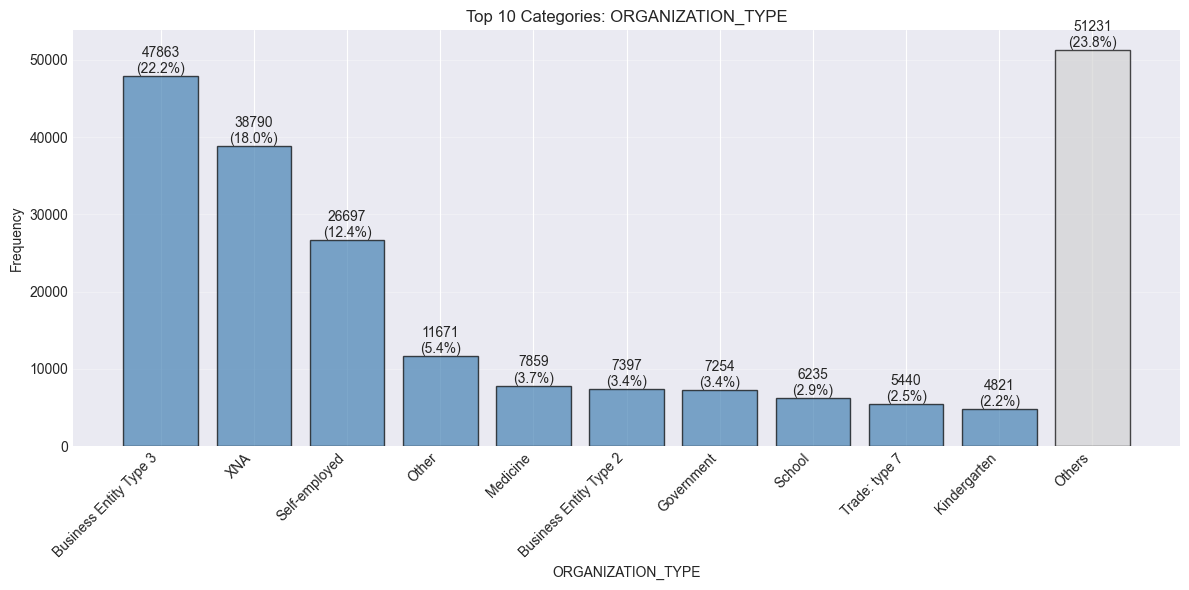

Analyzing: FLAG_MOBIL | Unique values: 2


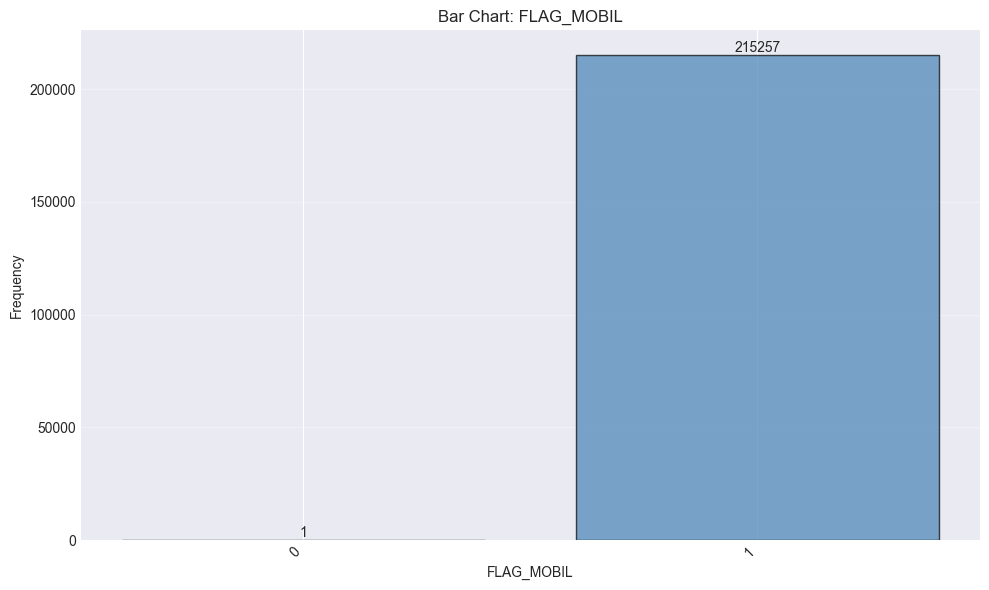

Analyzing: FLAG_EMP_PHONE | Unique values: 2


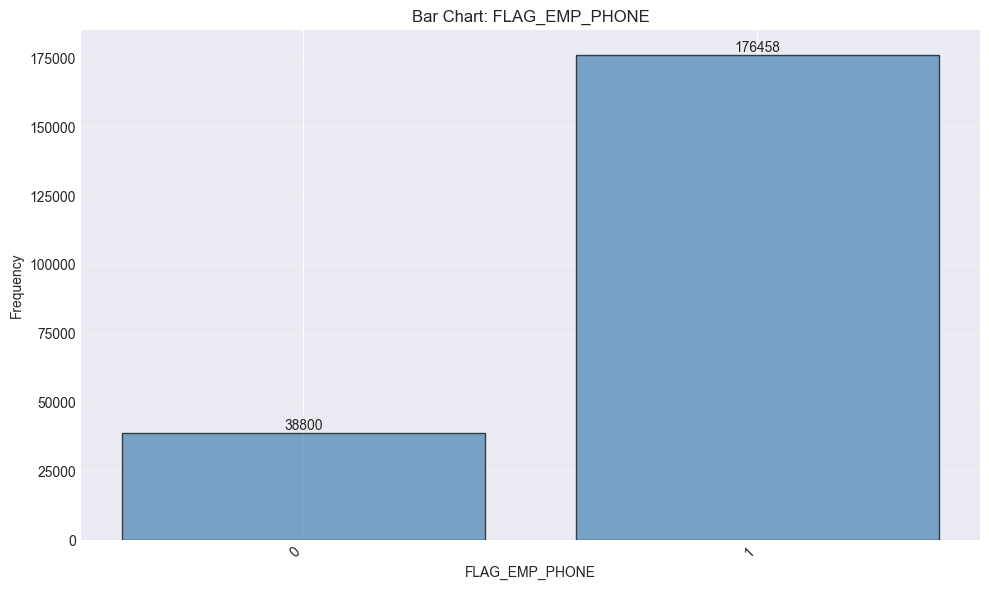

Analyzing: FLAG_WORK_PHONE | Unique values: 2


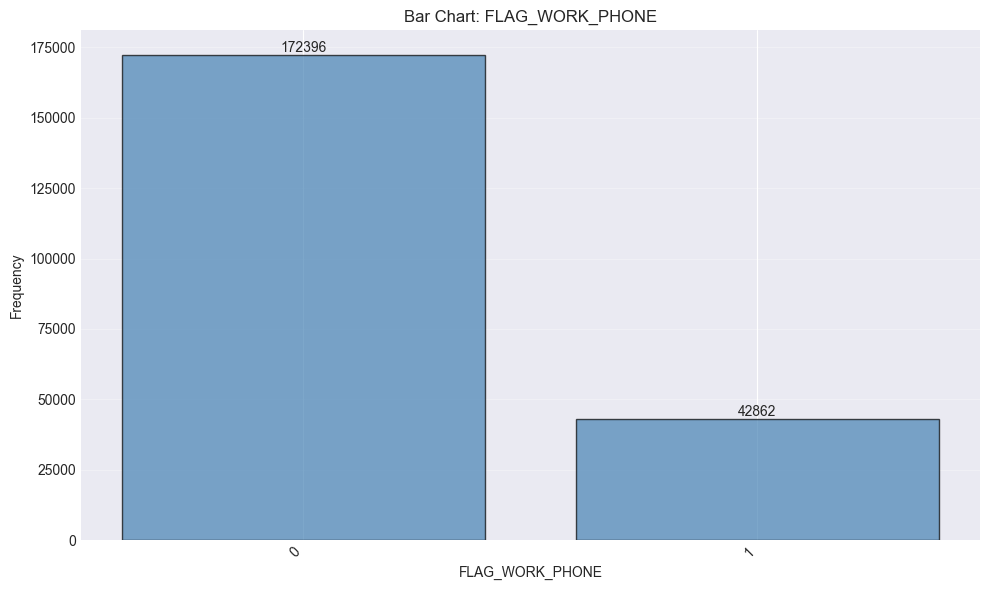

Analyzing: FLAG_CONT_MOBILE | Unique values: 2


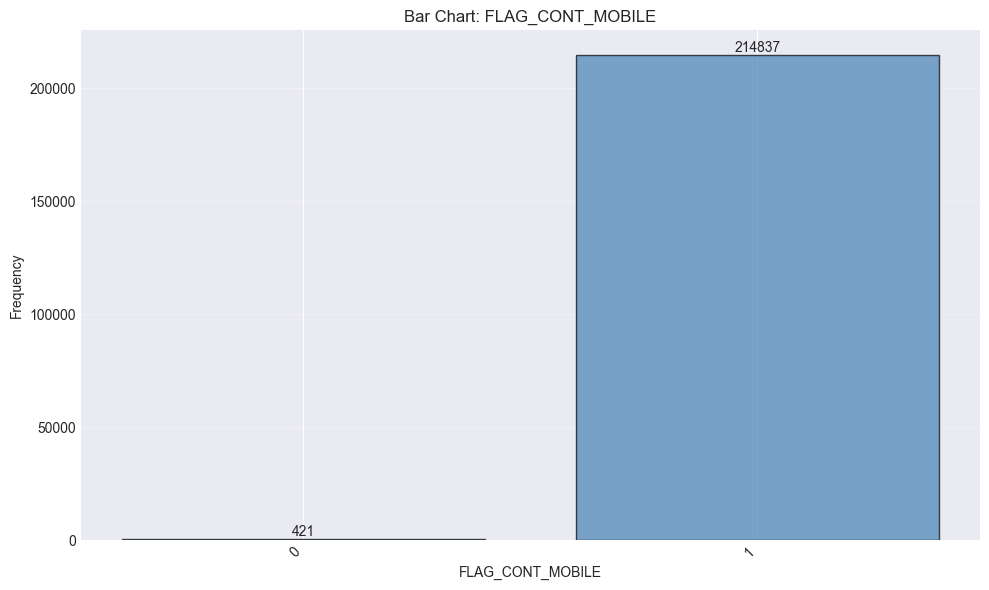

Analyzing: FLAG_PHONE | Unique values: 2


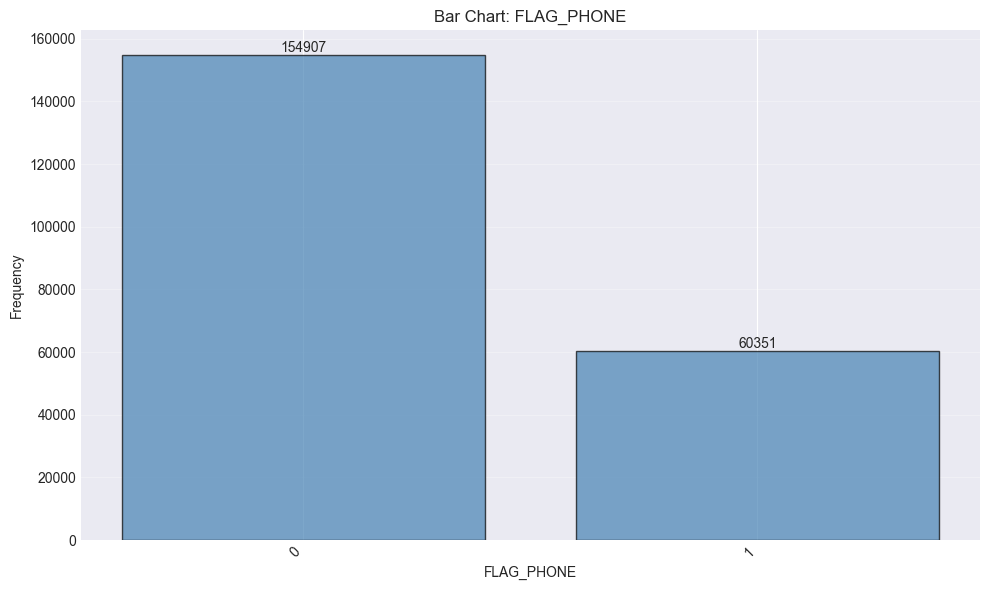

Analyzing: FLAG_EMAIL | Unique values: 2


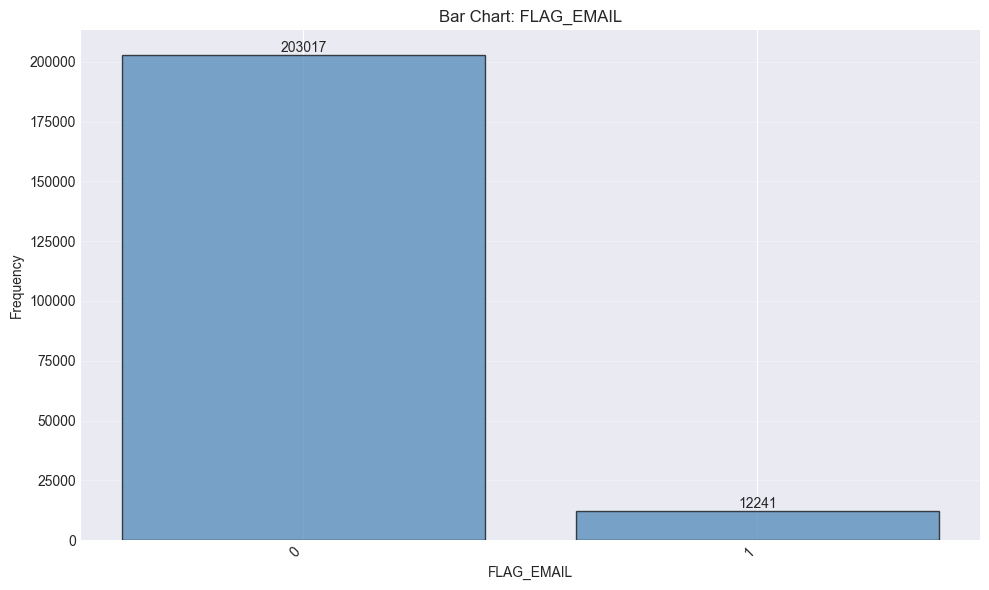

In [19]:
# Univariate bar charts for nominal variables
for feature in nominal_vars:
    n_unique = df[feature].nunique()
    print(f"Analyzing: {feature} | Unique values: {n_unique}")
    if n_unique < 10:
        plot_discrete_barchart(
            data=df[feature],
            title=f'Bar Chart: {feature}',
            figsize=(10, 6)
        )
    else:
        # Use function.py helper for Top-K plot with 'Others'
        plot_nominal_topk_barchart(
            data=df[feature],
            top_k=10,
            title=f'Top 10 Categories: {feature}',
            figsize=(12, 6)
        )

In [20]:
# Frequency and mode metrics for nominal variables
nominal_metrics = []
for feature in nominal_vars:
    m = calculate_nominal_metrics(data=df[feature])
    nominal_metrics.append(m)

if nominal_metrics:
    metrics_nominal = pd.concat(nominal_metrics, ignore_index=True)
    print("SUMMARY TABLE: Nominal Variables - Frequency & Mode")
    display(metrics_nominal)
else:
    print("No nominal metrics computed.")

SUMMARY TABLE: Nominal Variables - Frequency & Mode


,Feature,Count,Missing,Unique_Values,Mode,Mode_Frequency,Mode_Percentage
0,CODE_GENDER,215258,0,3,F,141571,65.768055
1,FLAG_OWN_CAR,215258,0,2,N,142102,66.014736
2,FLAG_OWN_REALTY,215258,0,2,Y,149270,69.344693
3,NAME_INCOME_TYPE,215258,0,8,Working,111204,51.660798
4,NAME_FAMILY_STATUS,215258,0,6,Married,137714,63.976252
5,NAME_HOUSING_TYPE,215258,0,6,House / apartment,191154,88.802274
6,OCCUPATION_TYPE,147594,67664,18,Laborers,38656,26.190767
7,ORGANIZATION_TYPE,215258,0,58,Business Entity Type 3,47863,22.235178
8,FLAG_MOBIL,215258,0,2,1,215257,99.999535
9,FLAG_EMP_PHONE,215258,0,2,1,176458,81.975118


## **Insights**: ..........

## Bivariate Analysis:

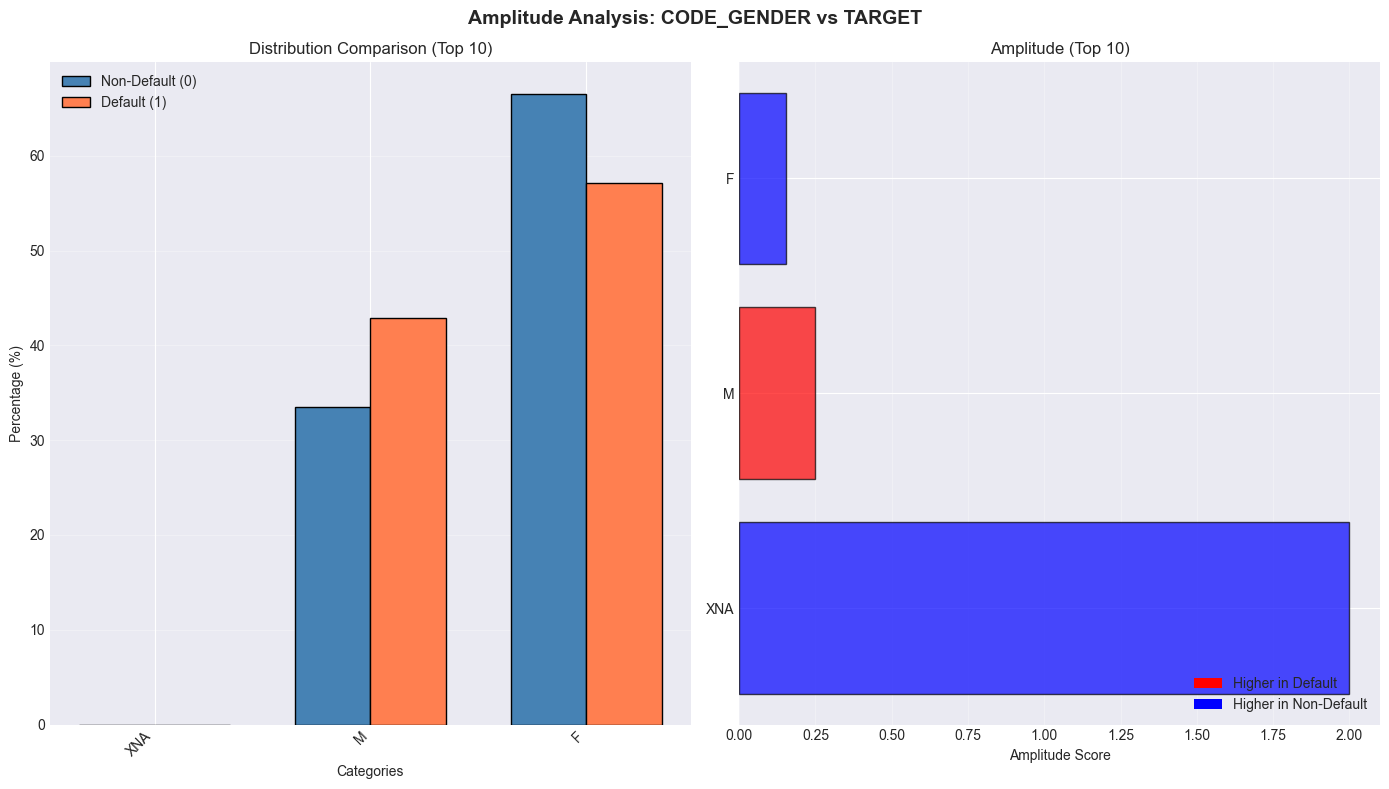

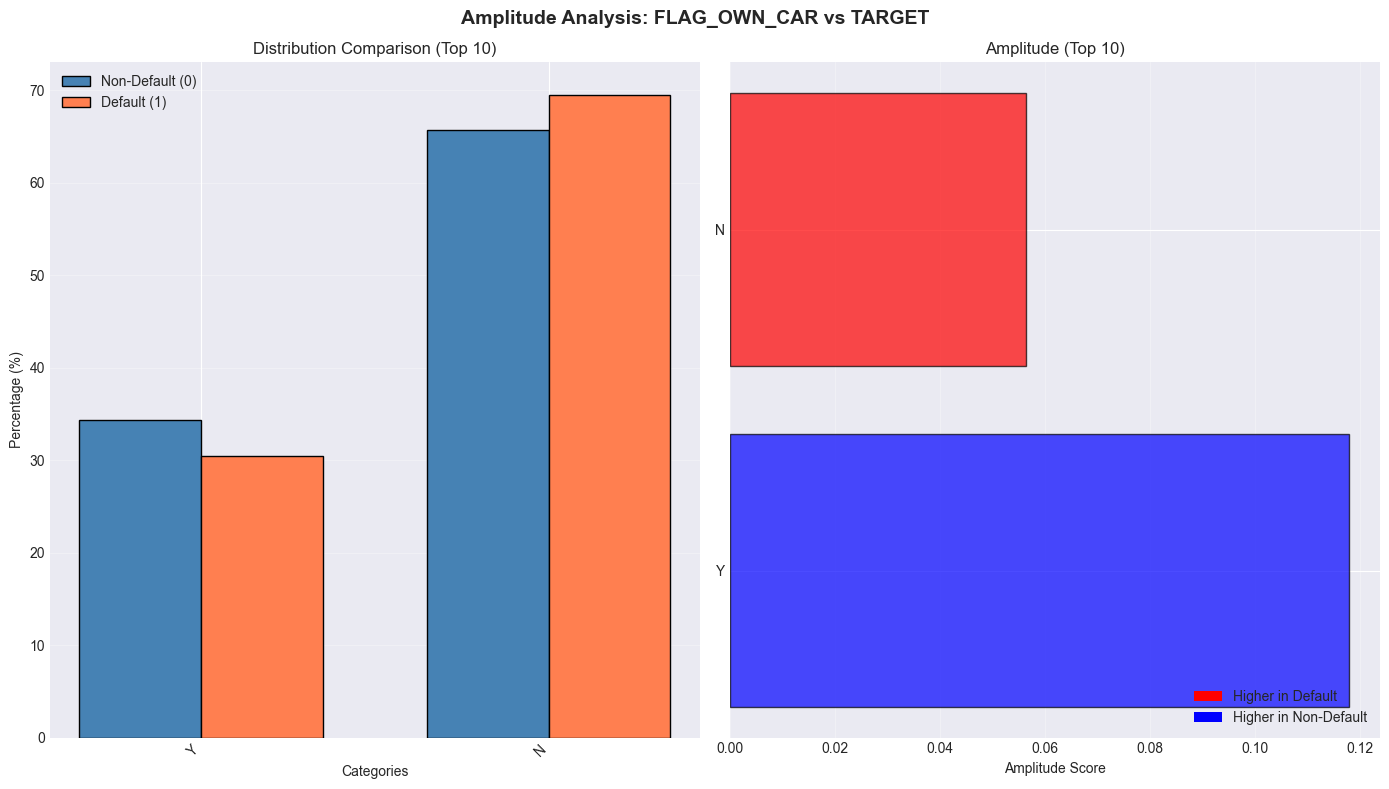

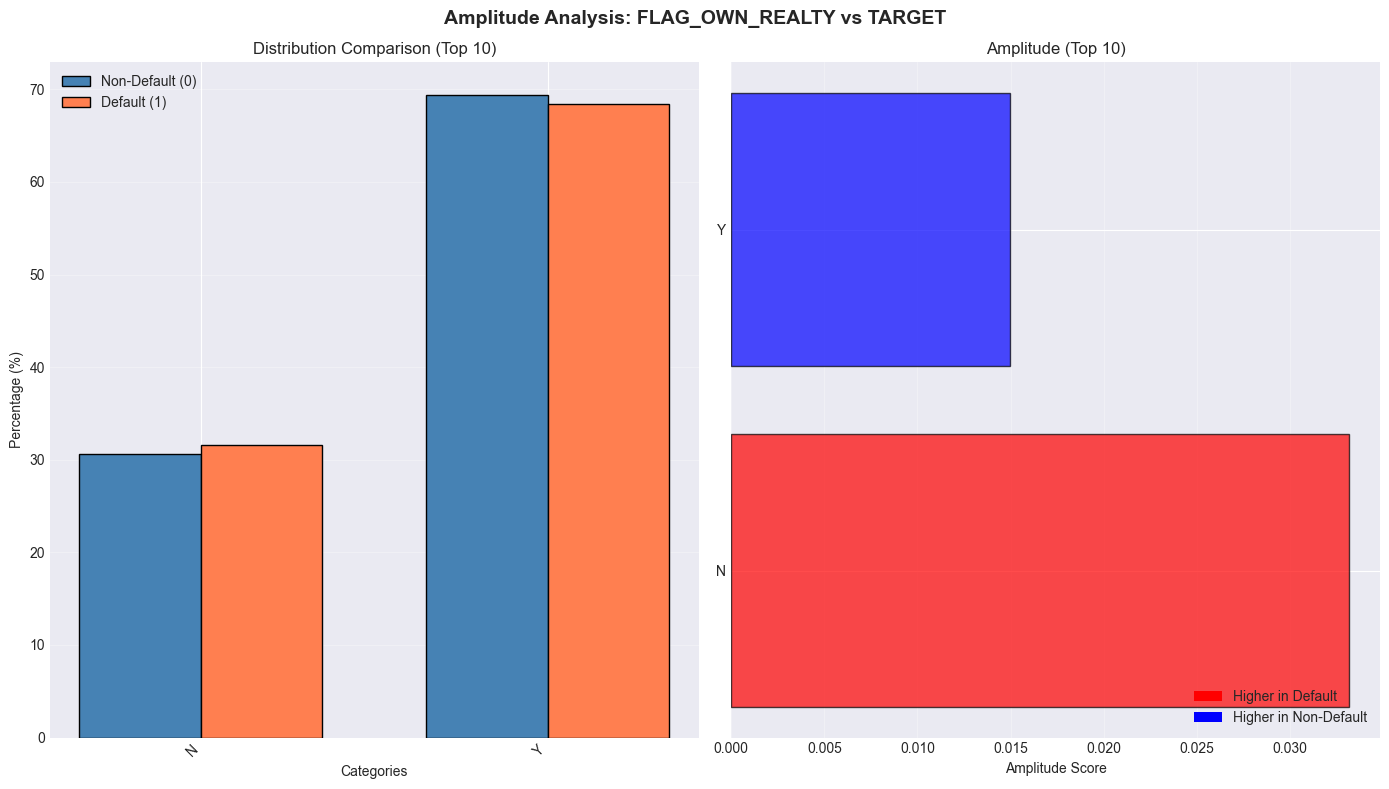

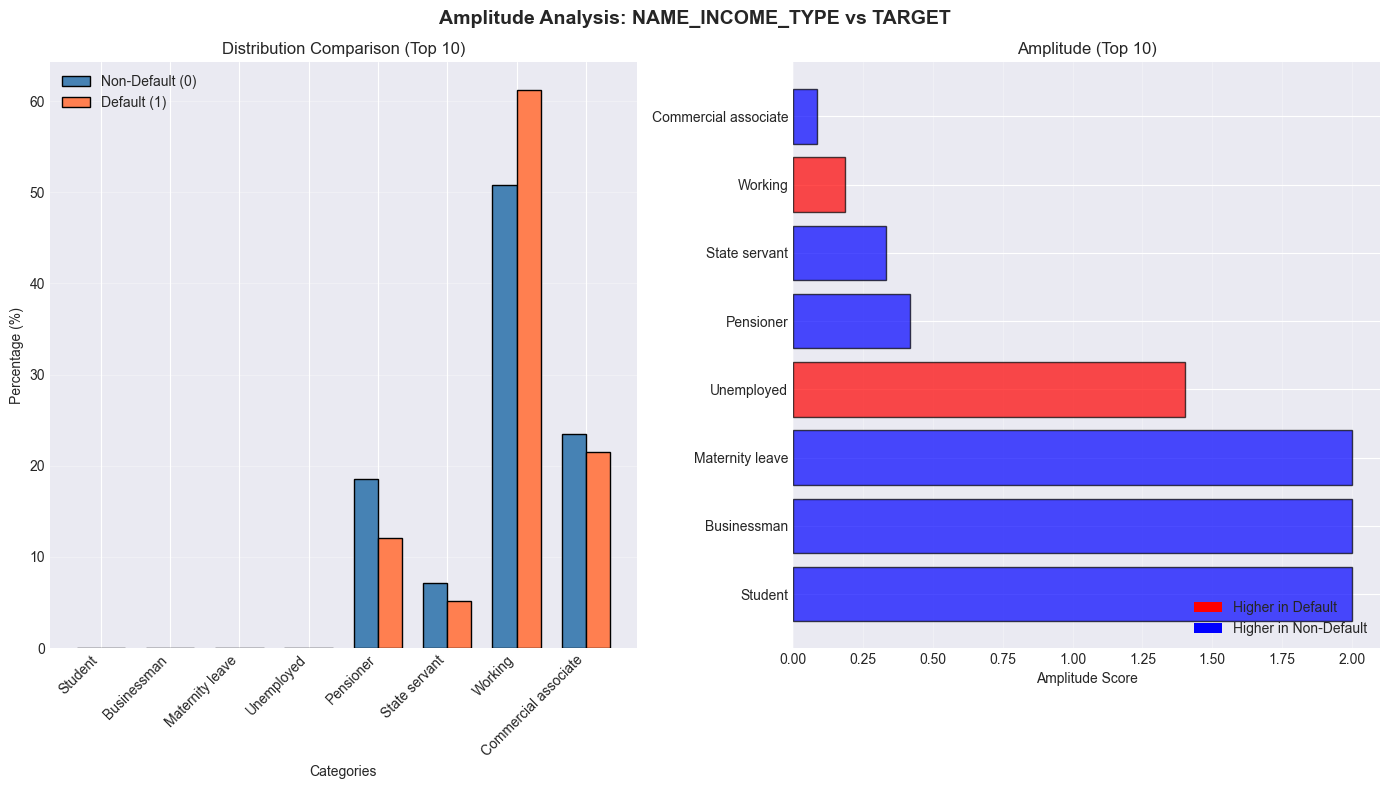

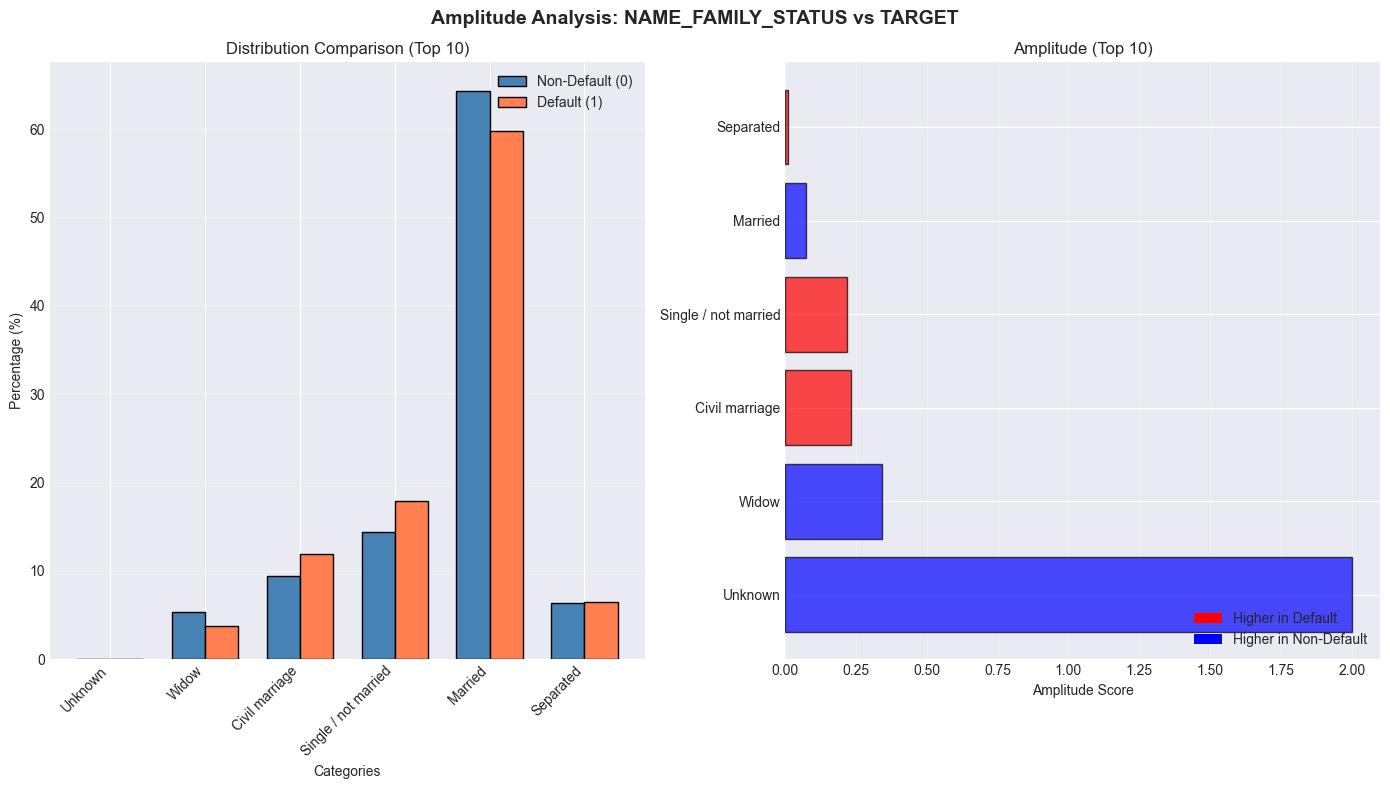

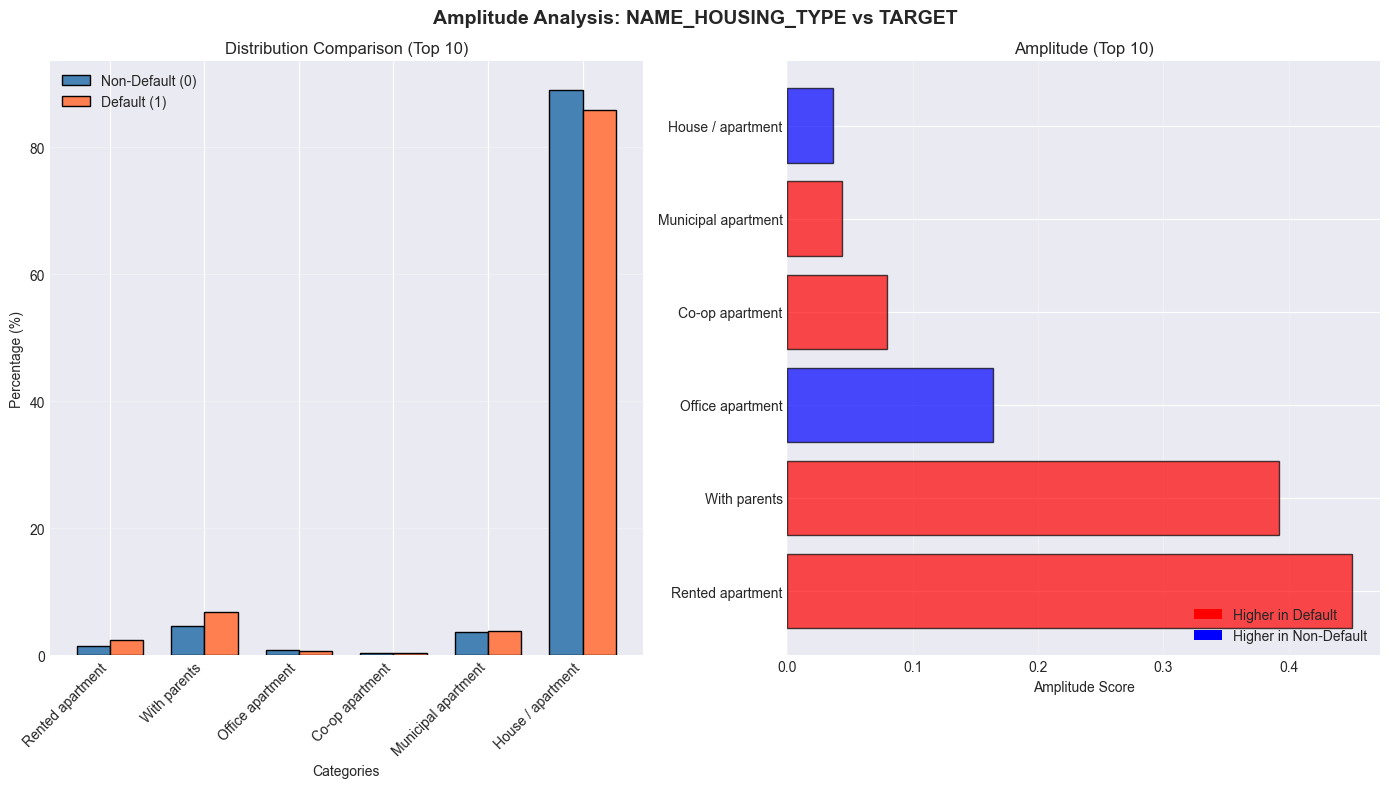

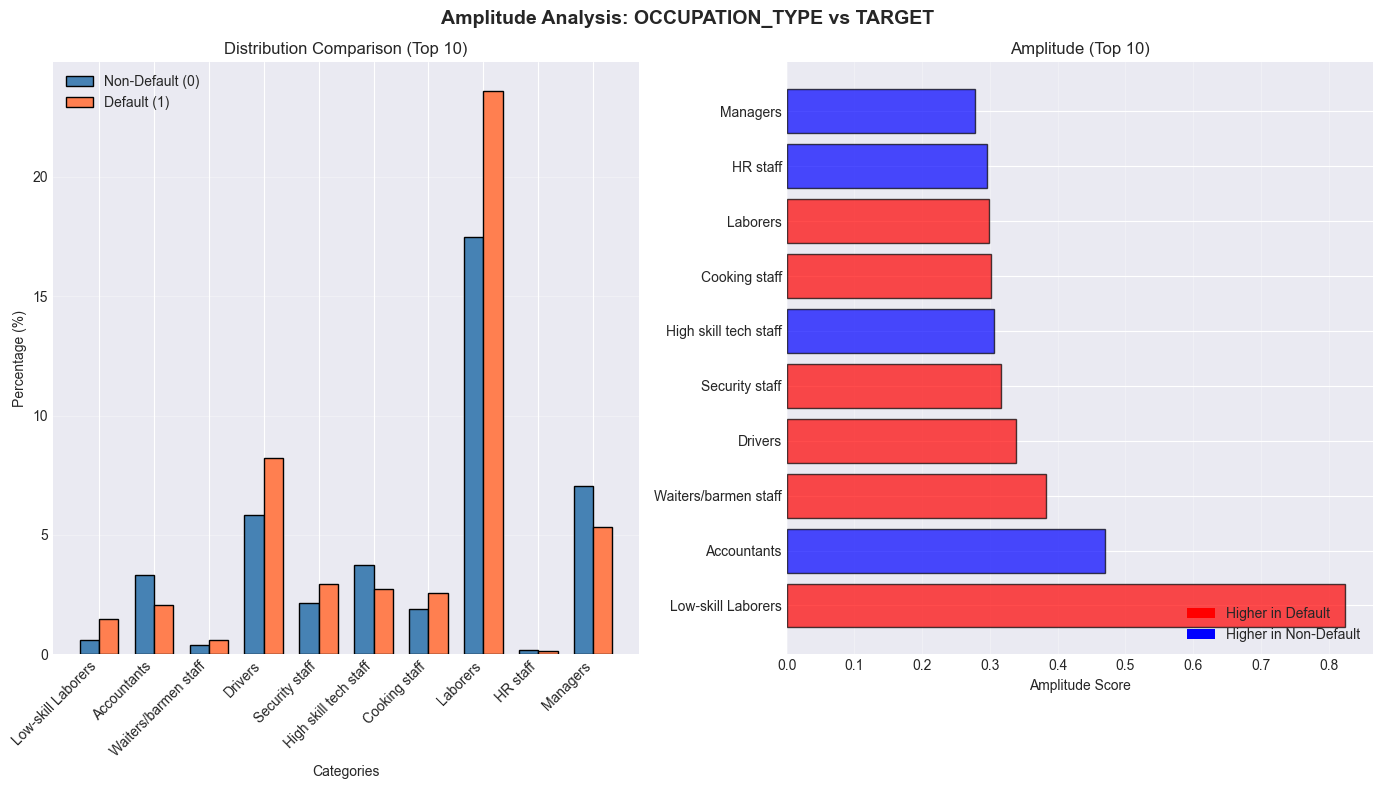

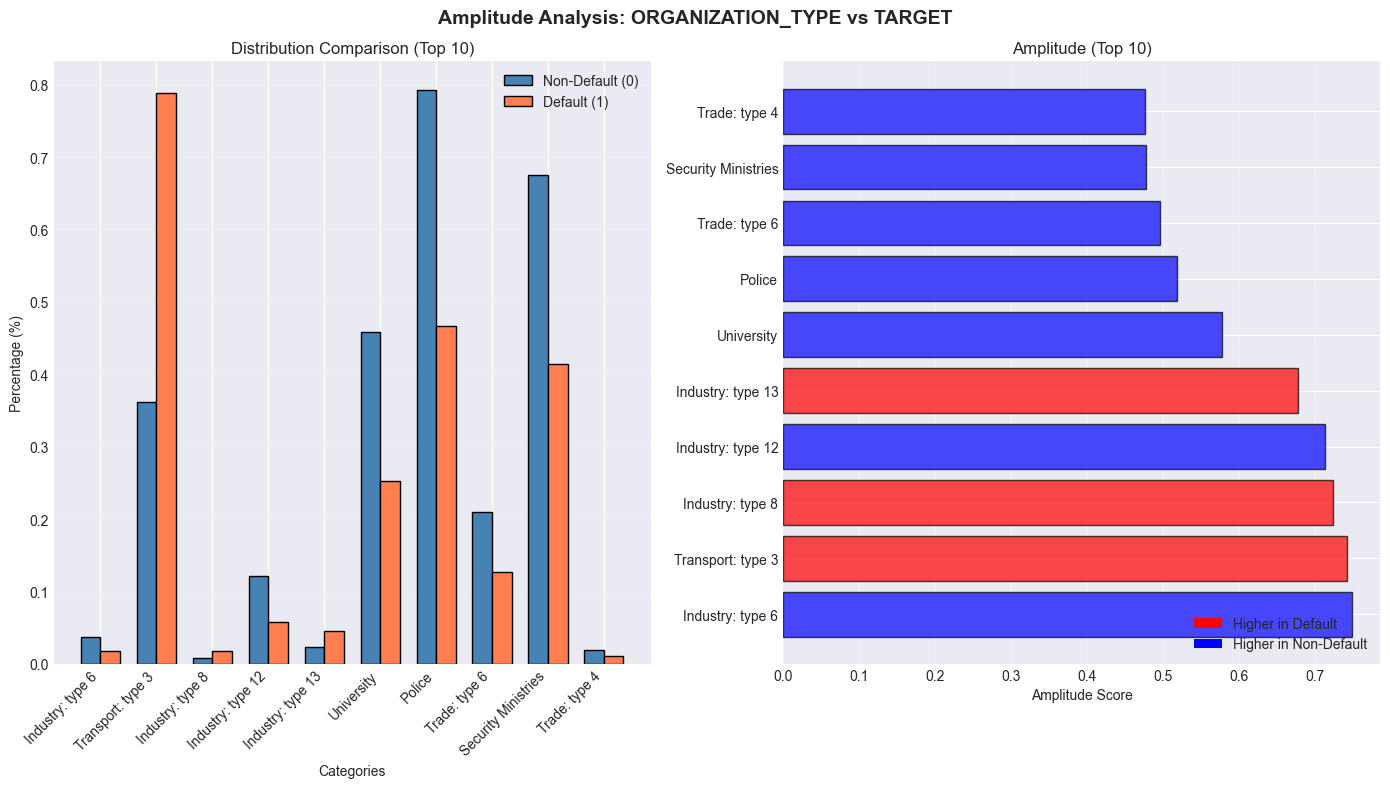

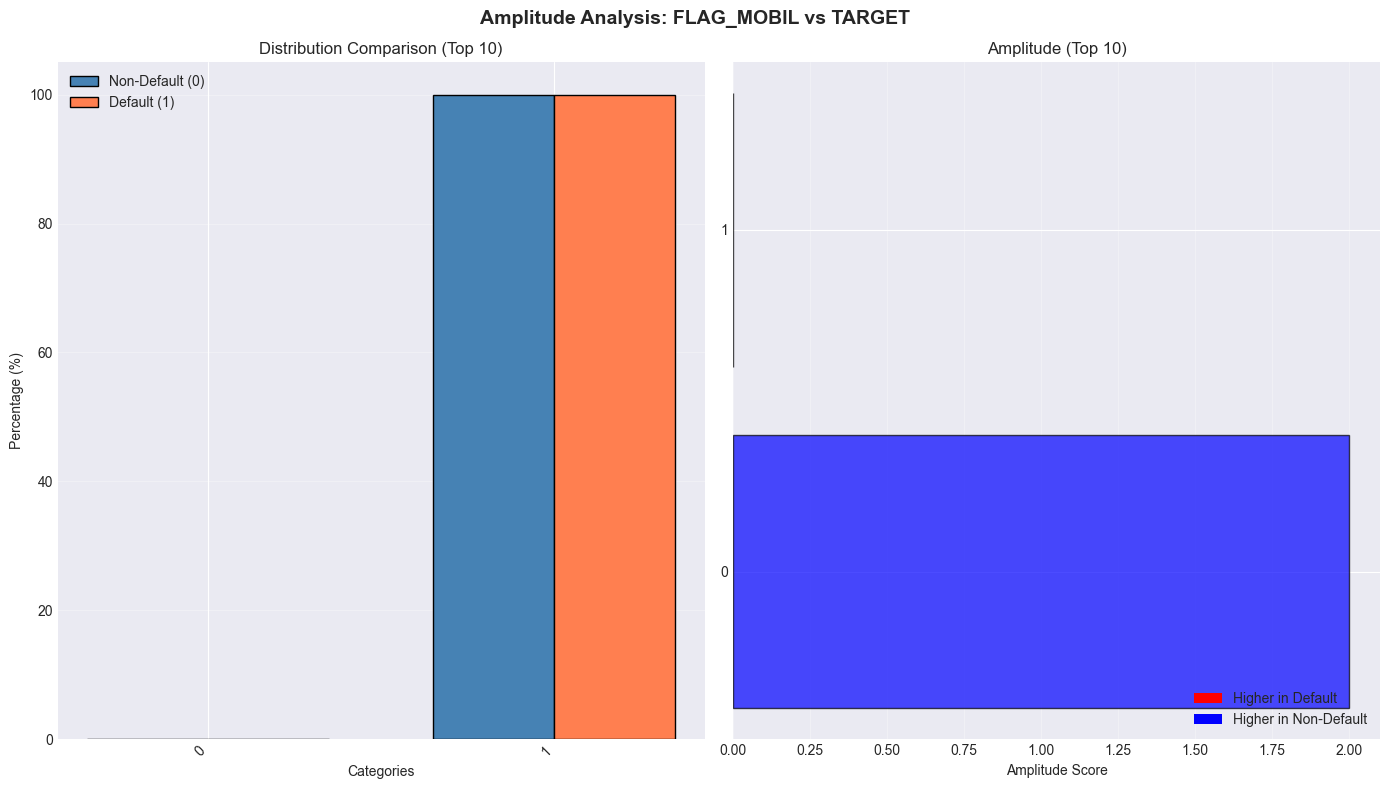

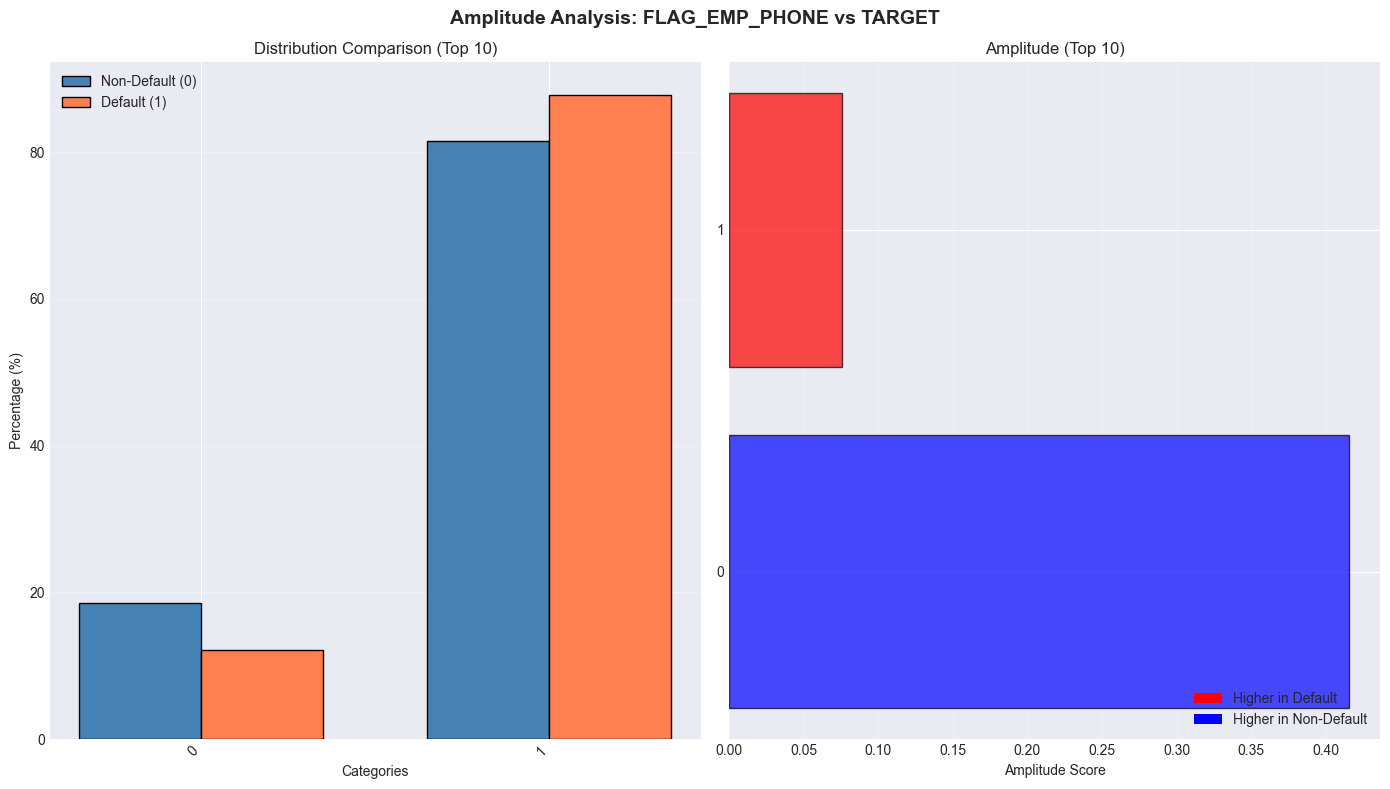

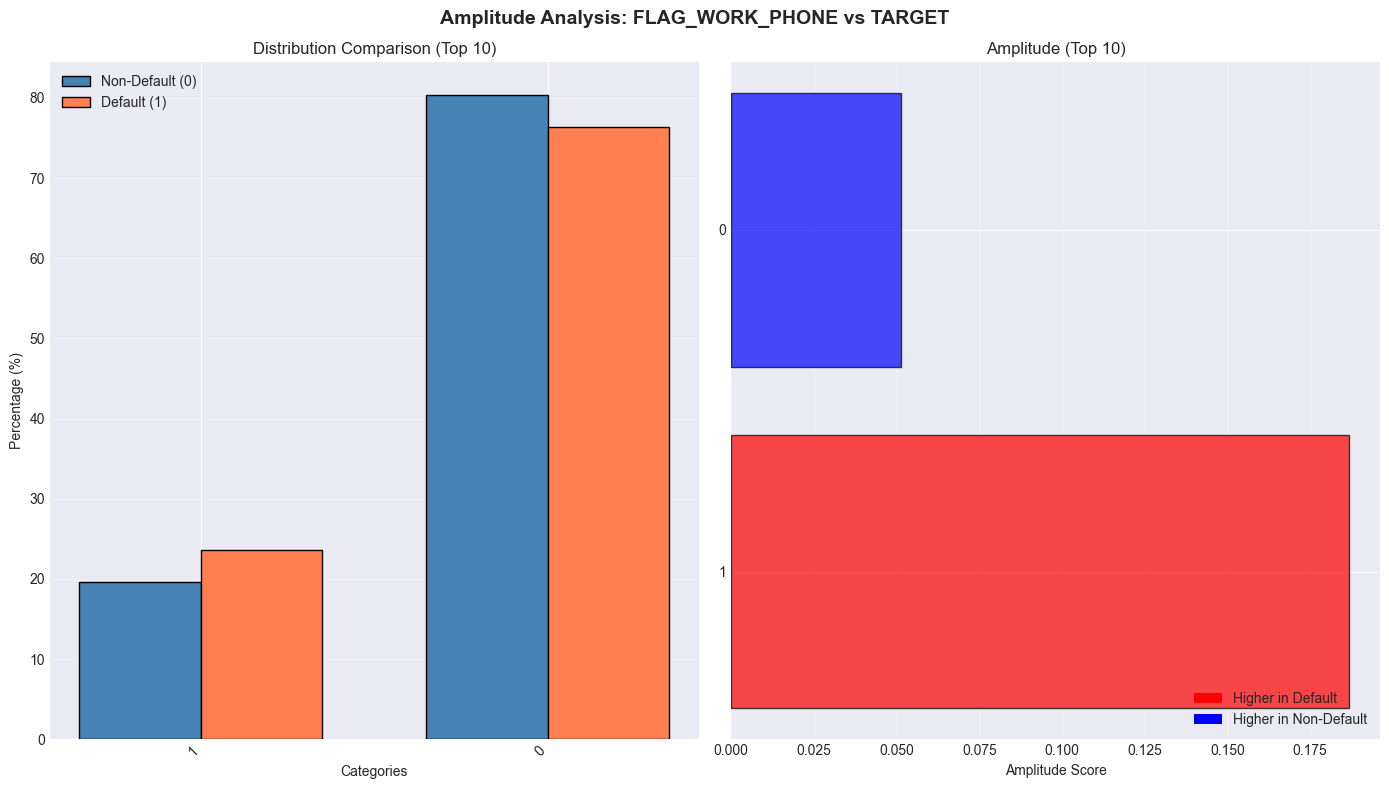

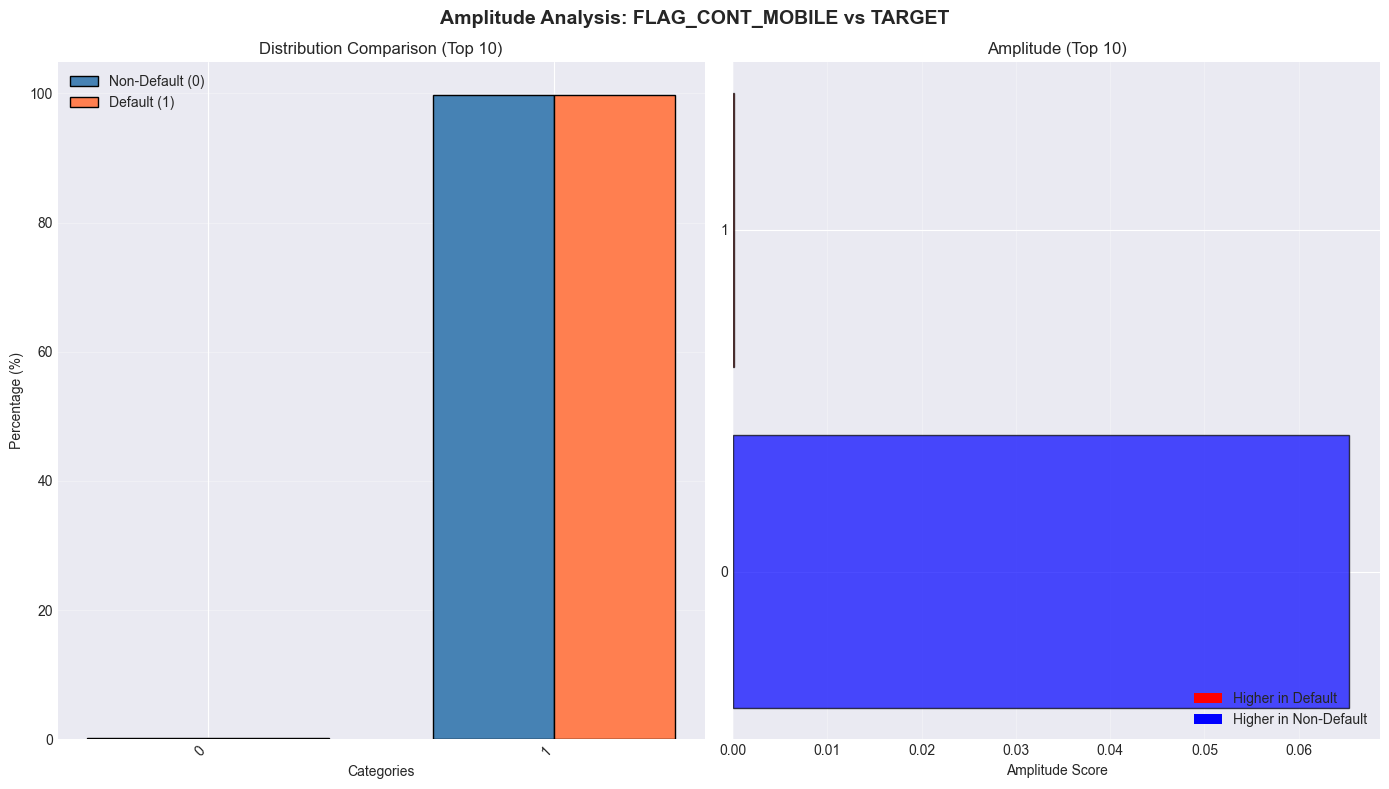

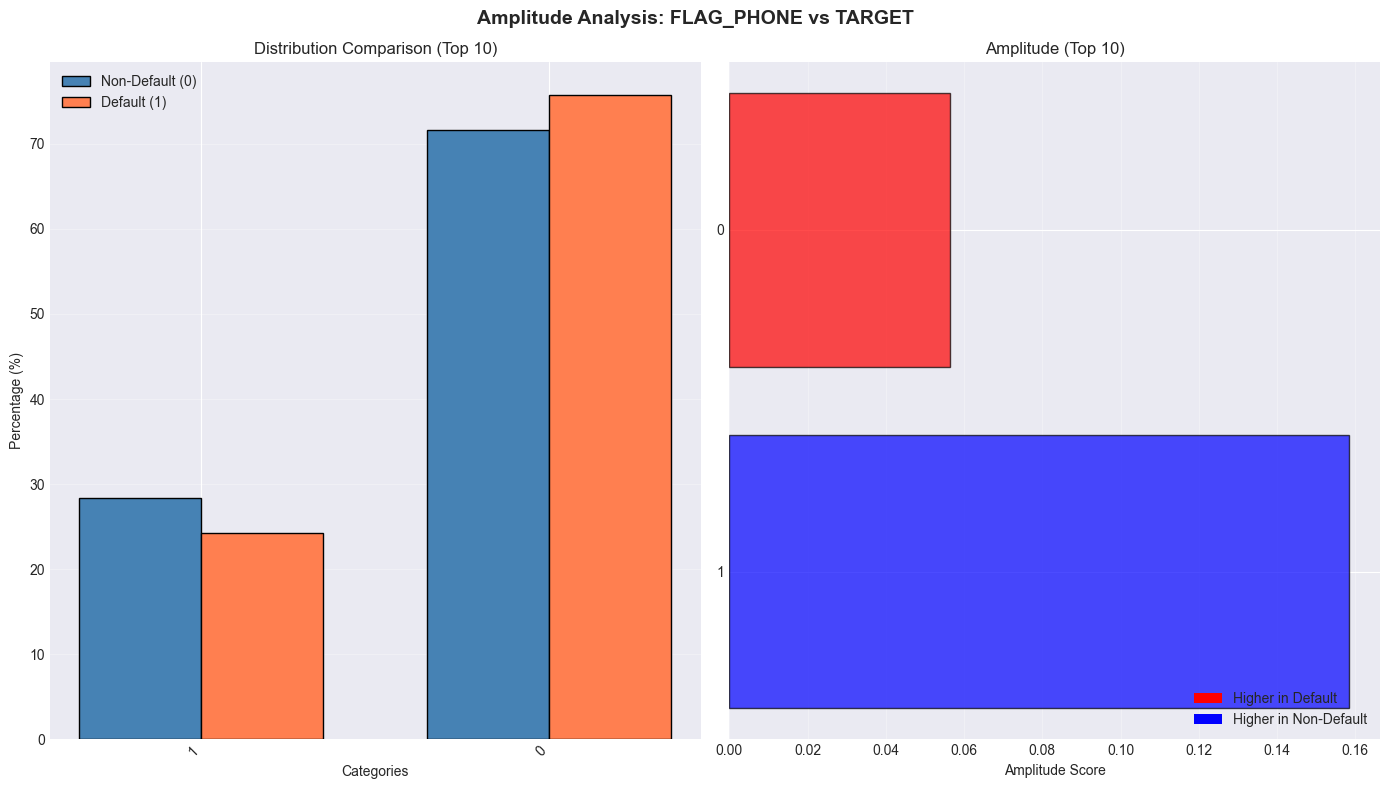

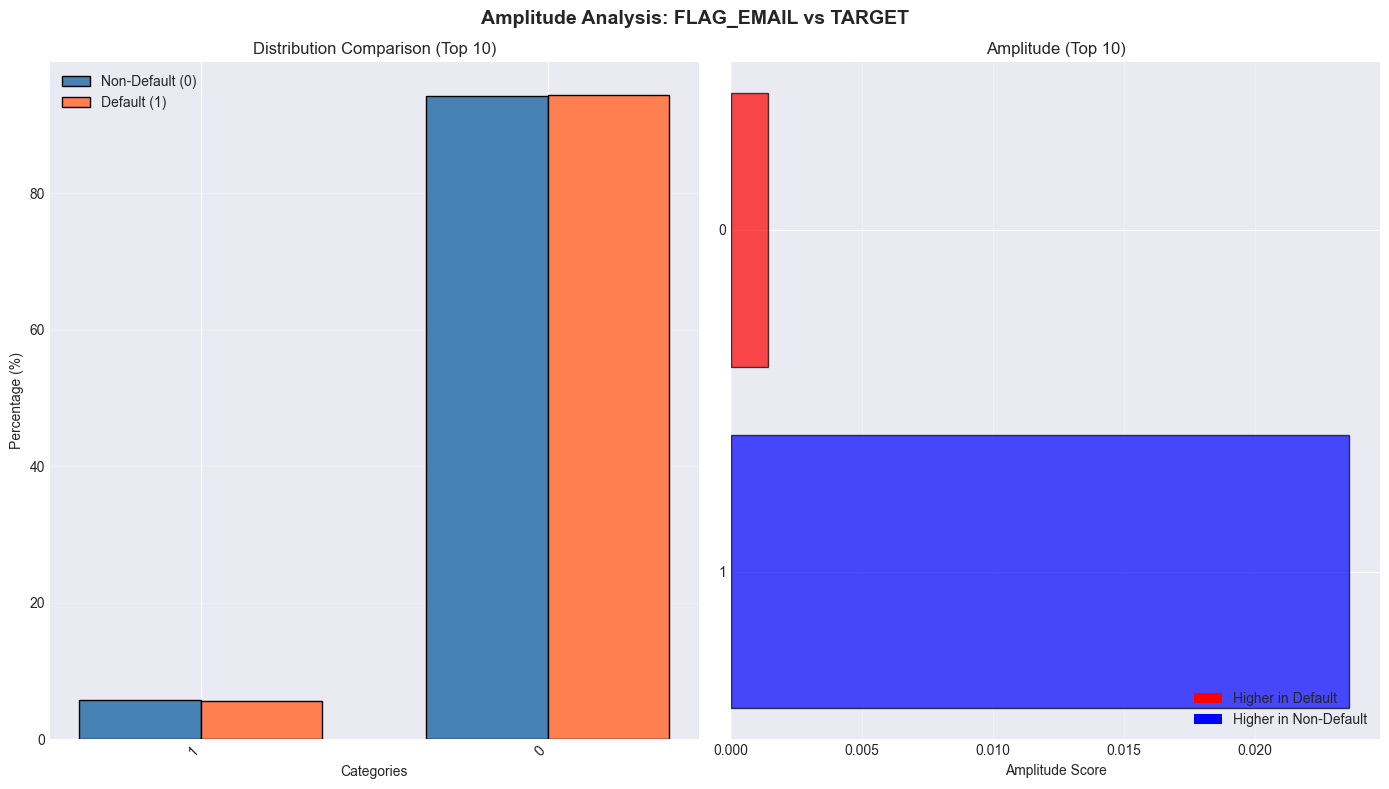

SUMMARY TABLE: Nominal Variables vs TARGET


,Feature,Unique_Values,Chi2_Statistic,Chi2_P_Value,Cramers_V,Information_Value,Chi2_Significant_0.05,Point_Biserial_Correlation,Point_Biserial_P_Value,PB_Significant_0.05,abs_Cramers_V,abs_Information_Value
6,OCCUPATION_TYPE,18,938.903520,1.038505e-188,0.079758,8.142948e-02,True,NaN,NaN,NaN,0.079758,8.142948e-02
3,NAME_INCOME_TYPE,8,834.390935,7.017579e-176,0.062259,5.526201e-02,True,NaN,NaN,NaN,0.062259,5.526201e-02
0,CODE_GENDER,3,632.144443,5.389872e-138,0.054191,3.786247e-02,True,NaN,NaN,NaN,0.054191,3.786247e-02
9,FLAG_EMP_PHONE,2,439.780051,1.208692e-97,0.045200,3.171230e-02,True,NaN,NaN,NaN,0.045200,3.171230e-02
4,NAME_FAMILY_STATUS,6,364.165605,1.558776e-76,0.041131,2.223892e-02,True,NaN,NaN,NaN,0.041131,2.223892e-02
5,NAME_HOUSING_TYPE,6,268.958005,4.684809e-56,0.035348,1.435801e-02,True,NaN,NaN,NaN,0.035348,1.435801e-02
10,FLAG_WORK_PHONE,2,162.902195,2.627775e-37,0.027510,9.635099e-03,True,NaN,NaN,NaN,0.027510,9.635099e-03
12,FLAG_PHONE,2,137.078685,1.159003e-31,0.025235,8.958932e-03,True,NaN,NaN,NaN,0.025235,8.958932e-03
1,FLAG_OWN_CAR,2,103.637125,2.429812e-24,0.021942,6.661935e-03,True,NaN,NaN,NaN,0.021942,6.661935e-03
2,FLAG_OWN_REALTY,2,7.941364,4.831741e-03,0.006074,4.961826e-04,True,NaN,NaN,NaN,0.006074,4.961826e-04


In [21]:
# Bivariate Analysis: Nominal Variables vs TARGET
import pandas as pd
from function import plot_nominal_amplitude_analysis

assert 'TARGET' in df.columns, "TARGET column not found in df"

results = []

for feature in nominal_vars:
    if feature not in df.columns:
        print(f"Warning: {feature} not in dataframe; skipping.")
        continue

    try:
        plot_nominal_amplitude_analysis(
            data=df,
            feature=feature,
            target='TARGET',
            title=f'Amplitude Analysis: {feature} vs TARGET'
        )
    except TypeError:
        # Fallback signature if function expects df, feature, target only
        try:
            plot_nominal_amplitude_analysis(df, feature, 'TARGET')
        except Exception as e:
            print(f"Amplitude analysis not executed for {feature}: {e}")

    # Choose metric function based on cardinality
    clean = df[[feature, 'TARGET']].dropna()
    n_unique = clean[feature].nunique()
    if n_unique <= 20:
        m = calculate_target_relationship_discrete_few_nunique(df, feature, 'TARGET')
        # Add IV for completeness
        try:
            iv = calculate_iv(clean, feature, 'TARGET')
        except Exception:
            iv = None
        m['Information_Value'] = iv
    else:
        m = calculate_target_relationship_discrete_many_nunique(df, feature, 'TARGET')

    m['Feature'] = feature

    # Significance flags when available
    if 'Chi2_P_Value' in m.columns:
        m['Chi2_Significant_0.05'] = m['Chi2_P_Value'] < 0.05
    if 'Point_Biserial_P_Value' in m.columns:
        m['PB_Significant_0.05'] = m['Point_Biserial_P_Value'] < 0.05

    results.append(m)

# Combine and display metrics
if results:
    metrics_biv_nominal = pd.concat(results, ignore_index=True)

    # Sort by strongest available association
    sort_cols = ['Cramers_V', 'Point_Biserial', 'Information_Value']
    available = [c for c in sort_cols if c in metrics_biv_nominal.columns]
    if available:
        for c in available:
            metrics_biv_nominal[f'abs_{c}'] = metrics_biv_nominal[c].abs()
        by = [f'abs_{available[0]}'] + [f'abs_{c}' for c in available[1:]]
        metrics_biv_nominal = metrics_biv_nominal.sort_values(by=by, ascending=False)

    print("SUMMARY TABLE: Nominal Variables vs TARGET")
    display(metrics_biv_nominal)
else:
    print("No nominal bivariate metrics computed.")

## Insights: ......

# **Ordinal Variables**

## Univariate Analysis:
- Ordered bar chart (by education level)
- Distribution metrics by order (Count, Percentage, Cumulative %)

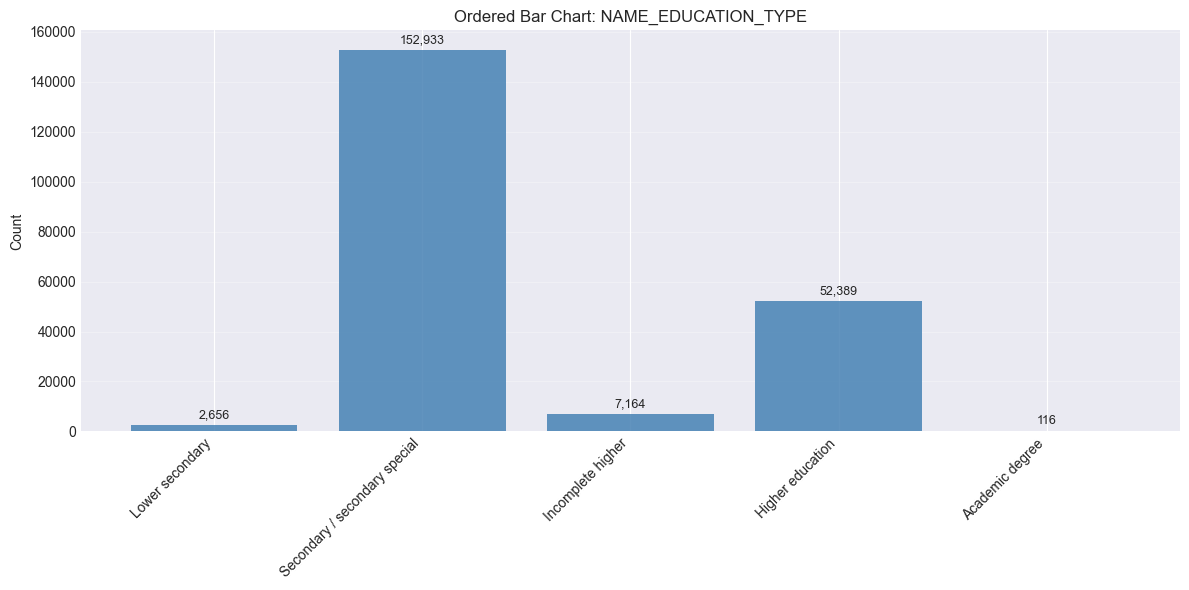

Distribution by Education Order:
NAME_EDUCATION_TYPE
Lower secondary                    2656
Secondary / secondary special    152933
Incomplete higher                  7164
Higher education                  52389
Academic degree                     116
Name: count, dtype: int64


In [22]:
# Ordered bar chart for ordinal variable
feature = 'NAME_EDUCATION_TYPE'
education_order = [
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]

# Value counts reindexed by defined order
vc = df[feature].value_counts()
vc_ordered = vc.reindex(education_order, fill_value=0)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(education_order)), vc_ordered.values, color='steelblue', alpha=0.85)
plt.xticks(range(len(education_order)), education_order, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Ordered Bar Chart: NAME_EDUCATION_TYPE')
plt.grid(axis='y', alpha=0.3)

# Labels on bars
for bar, count in zip(bars, vc_ordered.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(vc_ordered.values)*0.01,
             f"{int(count):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print('Distribution by Education Order:')
print(vc_ordered)

In [23]:
# Distribution metrics by education order
feature = 'NAME_EDUCATION_TYPE'
education_order = [
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]

vc = df[feature].value_counts()
non_missing = df[feature].dropna()
N = len(non_missing)

rows = []
for level in education_order:
    count = int(vc.get(level, 0))
    pct = (count / N * 100) if N else 0
    rows.append({
        'Education_Level': level,
        'Count': count,
        'Percentage': round(pct, 2)
    })

metrics_df_ordinal = pd.DataFrame(rows)
metrics_df_ordinal['Cumulative_Percentage'] = metrics_df_ordinal['Percentage'].cumsum().round(2)

print('Distribution Metrics by Education Order:')
display(metrics_df_ordinal)

print('\nSummary:')
print(f'Total Records: {N:,}')
print(f'Missing Values: {df[feature].isna().sum():,}')
print(f'Unique Categories: {df[feature].nunique()}')
mode_val = df[feature].mode()
print(f"Mode (Most Common): {mode_val.iloc[0] if not mode_val.empty else 'N/A'}")

Distribution Metrics by Education Order:


,Education_Level,Count,Percentage,Cumulative_Percentage
0,Lower secondary,2656,1.23,1.23
1,Secondary / secondary special,152933,71.05,72.28
2,Incomplete higher,7164,3.33,75.61
3,Higher education,52389,24.34,99.95
4,Academic degree,116,0.05,100.00



Summary:
Total Records: 215,258
Missing Values: 0
Unique Categories: 5
Mode (Most Common): Secondary / secondary special


### Insights: Ordinal Variable (NAME_EDUCATION_TYPE)

- **Distribution Pattern**: The dataset is dominated by mid-level education groups (Secondary / secondary special, Higher education). Lower secondary and Academic degree are minority segments.
- **Interpretation**: Education level likely proxies for income stability and job type. Clients with higher education generally have more stable employment and access to better-paying jobs.
- **Risk Insight**: If later bivariate tests (Spearman with TARGET, and point-biserial after ordinal→numeric mapping) show a monotonic trend, expect default rates to decrease with higher education levels.
- **Data Quality Note**: Ensure the ordinal mapping preserves the intended order when encoding; avoid alphabetical sorting.
- **Modeling Tips**:
  - Use **ordered categorical encoding** (e.g., map levels to 1–5) for models that can leverage order.
  - Consider **target or frequency encoding** only with proper cross-validation to avoid leakage.
  - Check interactions (e.g., Education × Income Type × Occupation) for stronger signals.

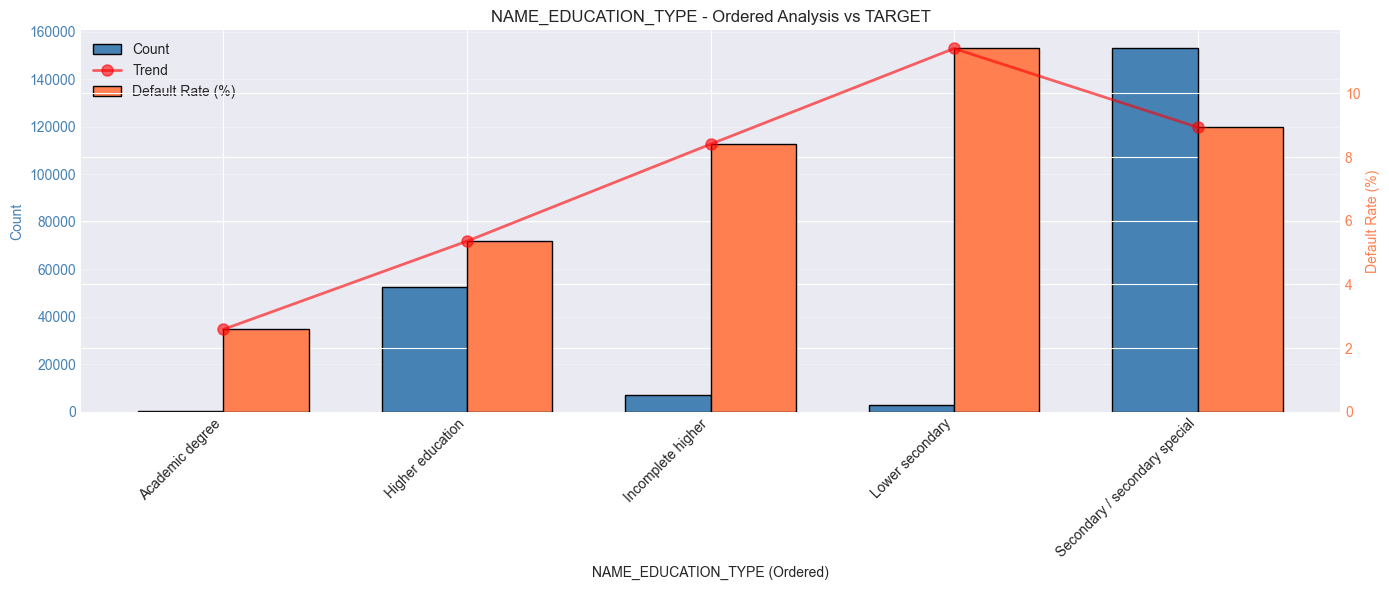

,Feature,Spearman_Correlation,Spearman_P_Value,Point_Biserial_Correlation,Point_Biserial_P_Value,feature
0,NAME_EDUCATION_TYPE,0.052732,2.272113e-132,0.054625,6.555645e-142,NAME_EDUCATION_TYPE


In [24]:
# Bivariate Analysis: Ordinal Variables vs TARGET
from function import (
    plot_ordinal_ordered_bar_vs_target,
    calculate_target_relationship_ordinal
)
import pandas as pd

# Validate TARGET and ordinal variables
target_col = 'TARGET'
assert target_col in df.columns, "TARGET column not found in df"
assert 'ordinal_vars' in globals(), "ordinal_vars list not defined"

# Known category order for education
known_orders = {
    'NAME_EDUCATION_TYPE': [
        'Lower secondary',
        'Secondary / secondary special',
        'Incomplete higher',
        'Higher education',
        'Academic degree'
    ]
}

ordinal_results = []

for col in ordinal_vars:
    # Use known order when available
    order = known_orders.get(col)

    # Plot ordered default rate bar using function.py
    try:
        _ = plot_ordinal_ordered_bar_vs_target(df, col, target_col, order=order)
    except TypeError:
        # Fallback if function signature doesn't accept 'order'
        _ = plot_ordinal_ordered_bar_vs_target(df, col, target_col)

    # Calculate relationship metrics
    try:
        metrics = calculate_target_relationship_ordinal(df, col, target_col, order=order)
    except TypeError:
        metrics = calculate_target_relationship_ordinal(df, col, target_col)
        
    if isinstance(metrics, pd.DataFrame):
        metrics = metrics.to_dict(orient='records')[0]

    metrics['feature'] = col
    ordinal_results.append(metrics)

metrics_biv_ordinal = pd.DataFrame(ordinal_results)

# Add significance flags when available
if 'spearman_p' in metrics_biv_ordinal.columns:
    metrics_biv_ordinal['Spearman_Significant_0.05'] = metrics_biv_ordinal['spearman_p'] < 0.05
if 'point_biserial_p' in metrics_biv_ordinal.columns:
    metrics_biv_ordinal['PB_Significant_0.05'] = metrics_biv_ordinal['point_biserial_p'] < 0.05

# Sort by strongest monotonic signal (Spearman), fallback to point-biserial
if 'spearman_r' in metrics_biv_ordinal.columns:
    metrics_biv_ordinal['abs_spearman_r'] = metrics_biv_ordinal['spearman_r'].abs()
    metrics_biv_ordinal = metrics_biv_ordinal.sort_values('abs_spearman_r', ascending=False)
elif 'point_biserial' in metrics_biv_ordinal.columns:
    metrics_biv_ordinal['abs_point_biserial'] = metrics_biv_ordinal['point_biserial'].abs()
    metrics_biv_ordinal = metrics_biv_ordinal.sort_values('abs_point_biserial', ascending=False)

display(metrics_biv_ordinal)


## Insights:......

# **Multivariate Analysis**

In [25]:
demo_df = df[client_demo_cols].copy()
numerical_demo = demo_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_demo = demo_df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical variables: {len(numerical_demo)} variables & Categorical variables: {len(categorical_demo)} variables")

Numerical variables: 15 variables & Categorical variables: 9 variables


## **Missing Data Handling**

### **Missing Data Types:**
- **MCAR (Missing Completely At Random)**: Missing values are randomly distributed, unrelated to any variable
- **MAR (Missing At Random)**: Missing values depend on observed data but not on the missing values themselves
- **MNAR (Missing Not At Random)**: Missing values depend on unobserved data or the missing value itself

In [26]:
missing_stats = []
for col in client_demo_cols:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    
    if missing_count > 0:
        missing_stats.append({
            'Variable': col,
            'Missing_Count': missing_count,
            'Missing_Percentage': missing_pct,
            'Present_Count': len(df) - missing_count,
            'Data_Type': df[col].dtype
        })

missing_df = pd.DataFrame(missing_stats).sort_values('Missing_Percentage', ascending=False)
display(missing_df.head(10)) #top 10 missing

,Variable,Missing_Count,Missing_Percentage,Present_Count,Data_Type
0,OWN_CAR_AGE,142104,66.015665,73154,float64
1,OCCUPATION_TYPE,67664,31.433907,147594,object
2,CNT_FAM_MEMBERS,2,0.000929,215256,float64
3,DAYS_LAST_PHONE_CHANGE,1,0.000465,215257,float64


In [27]:
work_df = df.copy()

# 0. Drop dòng có CODE_GENDER == 'XNA'
print(f"Original dataset size: {len(work_df):,} rows")
xna_gender_count = (work_df['CODE_GENDER'] == 'XNA').sum()
print(f"Rows with CODE_GENDER == 'XNA': {xna_gender_count:,} (will be dropped)")
work_df = work_df[work_df['CODE_GENDER'] != 'XNA']

print(f"After dropping invalid placeholders: {len(work_df):,} rows\n")

# 1. OWN_CAR_AGE imputation:
#   - If FLAG_OWN_CAR == 'N' and OWN_CAR_AGE is NaN -> fill with 0 
#   - If FLAG_OWN_CAR == 'Y' and OWN_CAR_AGE is NaN -> DROP the row 

non_owners_missing = ((work_df['FLAG_OWN_CAR'] == 'N') & work_df['OWN_CAR_AGE'].isna()).sum()
owners_missing = ((work_df['FLAG_OWN_CAR'] == 'Y') & work_df['OWN_CAR_AGE'].isna()).sum()

print(f"Non-owners with missing OWN_CAR_AGE: {non_owners_missing:,} (will fill with 0)")
print(f"Owners with missing OWN_CAR_AGE: {owners_missing:,} (will be dropped)")

# Fill 0 cho bọn không có xe với độ tuổi xe bị thiếu
work_df.loc[(work_df['FLAG_OWN_CAR'] == 'N') & work_df['OWN_CAR_AGE'].isna(), 'OWN_CAR_AGE'] = 0
print(f"After filling non-owners' missing OWN_CAR_AGE with 0: {len(work_df):,} rows")
median_car_age = work_df.loc[work_df['FLAG_OWN_CAR'] == 'Y', 'OWN_CAR_AGE'].median()

work_df.loc[
    (work_df['FLAG_OWN_CAR'] == 'Y') & (work_df['OWN_CAR_AGE'].isna()),
    'OWN_CAR_AGE'
] = median_car_age
print(f"After filling owners' missing OWN_CAR_AGE with median ({median_car_age}): {len(work_df):,} rows\n")

# Clean DAYS_EMPLOYED placeholder for occupation logic
work_df['DAYS_EMPLOYED'] = work_df['DAYS_EMPLOYED'].replace(365243, np.nan)
work_df['DAYS_EMPLOYED'] = work_df['DAYS_EMPLOYED'].fillna(0)

# 2. OCCUPATION_TYPE imputation 
#   - Use NAME_INCOME_TYPE and employment info to infer 'Unemployed'
#   - Remaining missing -> 'Laborers' (general workforce category)

def impute_occupation(df):
    occ = df['OCCUPATION_TYPE'].copy()
    missing_mask = occ.isna() | (occ == '')
    # Conditions indicating likely unemployment / no defined occupation
    income_unemp = df['NAME_INCOME_TYPE'].str.contains('Pensioner|Unemployed', case=False, regex=True, na=False)
    no_employment_duration = df['DAYS_EMPLOYED'].isna() | (df['DAYS_EMPLOYED'] >= 0)  # người missing employment duration hoặc không có ngày làm việc hợp lệ
    # Cho thành 'Unemployed' nơi cả occupation missing và đang trong độ tuổi không có nghề nghiệp
    occ.loc[missing_mask & (income_unemp | no_employment_duration)] = 'Unemployed'
    # Những cái còn lại gán thành 'Laborers'
    occ.loc[missing_mask & ~(income_unemp | no_employment_duration)] = 'Laborers'
    return occ

# Apply occupation imputation
work_df['OCCUPATION_TYPE'] = impute_occupation(work_df)

# 3. CNT_FAM_MEMBERS median imputation (low missing, numeric distribution skew neutral)
work_df['CNT_FAM_MEMBERS'] = work_df['CNT_FAM_MEMBERS'].fillna(work_df['CNT_FAM_MEMBERS'].median())

# 4. DAYS_LAST_PHONE_CHANGE median imputation (MCAR, very low impact)
work_df['DAYS_LAST_PHONE_CHANGE'] = work_df['DAYS_LAST_PHONE_CHANGE'].fillna(work_df['DAYS_LAST_PHONE_CHANGE'].median())
# 5. ORGANIZATION_TYPE imputation (conditional XNA handling)
if 'ORGANIZATION_TYPE' in work_df.columns:
    initial_xna = int((work_df['ORGANIZATION_TYPE'] == 'XNA').sum())
    replaced_cleaning = 0

    if 'OCCUPATION_TYPE' in work_df.columns and initial_xna > 0:
        mask_cleaning = (
            (work_df['ORGANIZATION_TYPE'] == 'XNA') &
            (work_df['OCCUPATION_TYPE'] == 'Cleaning staff')
        )
        replaced_cleaning = int(mask_cleaning.sum())
        if replaced_cleaning:
            work_df.loc[mask_cleaning, 'ORGANIZATION_TYPE'] = 'Cleaning'

    # Replace remaining XNA with 'No Organization'
    mask_remaining = (work_df['ORGANIZATION_TYPE'] == 'XNA')
    replaced_no_org = int(mask_remaining.sum())
    if replaced_no_org:
        work_df.loc[mask_remaining, 'ORGANIZATION_TYPE'] = 'No Organization'
else:
    print("Column 'ORGANIZATION_TYPE' not found; skipping imputation.")
# Verification summary
print("Remaining missing values (selected columns):")
for col in ['OWN_CAR_AGE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']:
    miss = work_df[col].isna().sum()
    print(f"  {col}: {miss} missing")
print(f"\nFinal cleaned dataset size: {len(work_df):,} rows")
print(f"Total rows dropped: {len(df) - len(work_df):,} ({((len(df) - len(work_df))/len(df)*100):.3f}%)")

Original dataset size: 215,258 rows
Rows with CODE_GENDER == 'XNA': 4 (will be dropped)
After dropping invalid placeholders: 215,254 rows

Non-owners with missing OWN_CAR_AGE: 142,100 (will fill with 0)
Owners with missing OWN_CAR_AGE: 2 (will be dropped)
After filling non-owners' missing OWN_CAR_AGE with 0: 215,254 rows
After filling owners' missing OWN_CAR_AGE with median (9.0): 215,254 rows

Remaining missing values (selected columns):
  OWN_CAR_AGE: 0 missing
  OCCUPATION_TYPE: 0 missing
  CNT_FAM_MEMBERS: 0 missing
  DAYS_LAST_PHONE_CHANGE: 0 missing

Final cleaned dataset size: 215,254 rows
Total rows dropped: 4 (0.002%)


## **Outlier Detection & Analysis**

In [28]:
# IQR
def detect_outliers_iqr(work_df, column):
    Q1 = work_df[column].quantile(0.25)
    Q3 = work_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = work_df[(work_df[column] < lower_bound) | (work_df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, IQR

# Z-Score
def detect_outliers_zscore(work_df, column, threshold=3):
    mean = work_df[column].mean()
    std = work_df[column].std()
    z_scores = np.abs((work_df[column] - mean) / std)
    outliers = work_df[z_scores > threshold]
    return outliers

# Phân tích outlier của numerical
outlier_summary = []

for col in numerical_demo:
    data_clean = work_df[work_df[col].notna()]
    
    if len(data_clean) > 0:
        # IQR method
        outliers_iqr, lower, upper, iqr = detect_outliers_iqr(data_clean, col)
        
        # Z-score method
        outliers_z = detect_outliers_zscore(data_clean, col, threshold=3)
        
        outlier_summary.append({
            'Variable': col,
            'Total_Records': len(data_clean),
            'IQR_Outliers': len(outliers_iqr),
            'IQR_Outlier_Pct': (len(outliers_iqr) / len(data_clean)) * 100,
            'Z_Score_Outliers': len(outliers_z),
            'Z_Score_Outlier_Pct': (len(outliers_z) / len(data_clean)) * 100,
            'Lower_Bound': lower,
            'Upper_Bound': upper,
            'IQR': iqr
        })

outlier_df = pd.DataFrame(outlier_summary).sort_values('IQR_Outlier_Pct', ascending=False)

print("OUTLIER DETECTION SUMMARY (sorted by IQR outlier percentage)")
display(outlier_df.round(2))

# Biến có outlier cao
high_outlier_vars = outlier_df[outlier_df['IQR_Outlier_Pct'] > 5]['Variable'].tolist()

print(f"Variables with >5% outliers (IQR method): {len(high_outlier_vars)}")
print(f"{high_outlier_vars}")

OUTLIER DETECTION SUMMARY (sorted by IQR outlier percentage)


,Variable,Total_Records,IQR_Outliers,IQR_Outlier_Pct,Z_Score_Outliers,Z_Score_Outlier_Pct,Lower_Bound,Upper_Bound,IQR
10,FLAG_WORK_PHONE,215254,42858,19.91,0,0.00,0.00,0.00,0.00
9,FLAG_EMP_PHONE,215254,38800,18.03,0,0.00,1.00,1.00,0.00
6,OWN_CAR_AGE,215254,26482,12.30,3287,1.53,-7.50,12.50,5.00
13,FLAG_EMAIL,215254,12241,5.69,12241,5.69,0.00,0.00,0.00
3,DAYS_EMPLOYED,215254,11806,5.48,4833,2.25,-3418.00,6462.00,2470.00
1,REGION_POPULATION_RELATIVE,215254,5899,2.74,5899,2.74,-0.02,0.06,0.02
0,CNT_CHILDREN,215254,3043,1.41,3043,1.41,-1.50,2.50,1.00
7,CNT_FAM_MEMBERS,215254,2855,1.33,2855,1.33,0.50,4.50,1.00
4,DAYS_REGISTRATION,215254,449,0.21,515,0.24,-6201.00,15687.00,5472.00
11,FLAG_CONT_MOBILE,215254,421,0.20,421,0.20,1.00,1.00,0.00


Variables with >5% outliers (IQR method): 5
['FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'OWN_CAR_AGE', 'FLAG_EMAIL', 'DAYS_EMPLOYED']


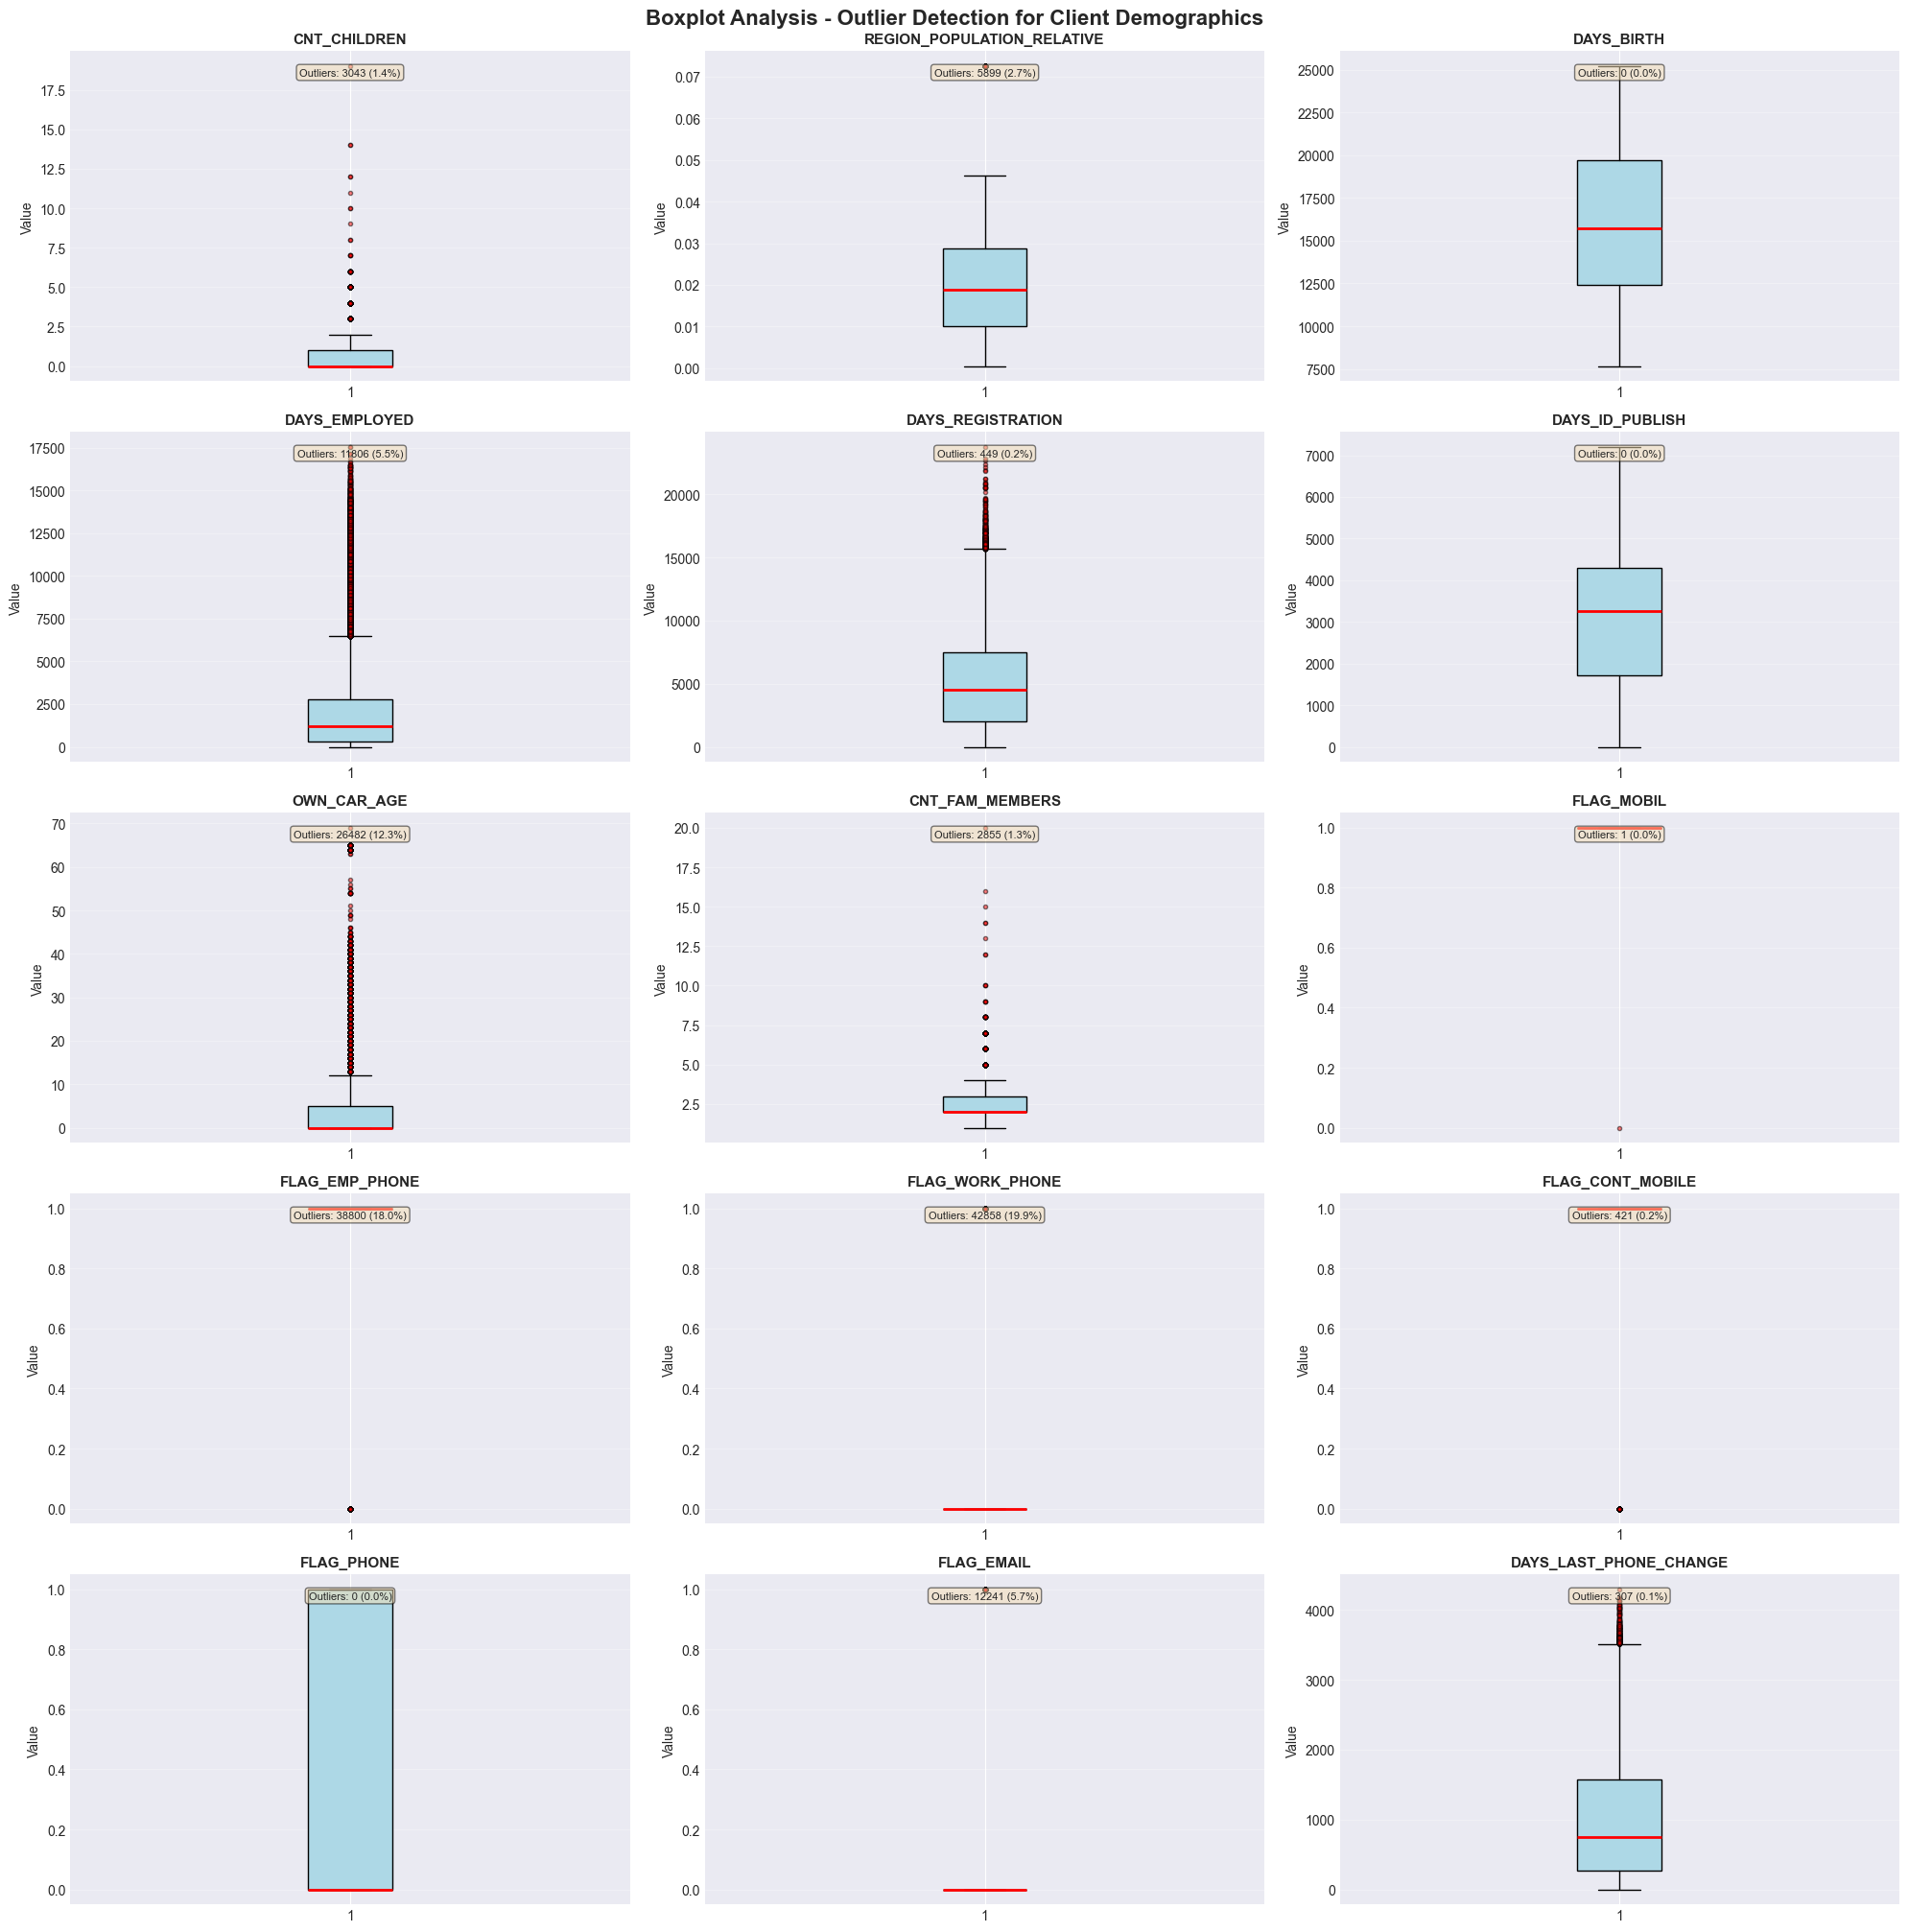

In [29]:
# Boxplot phân tích outlier
n_cols = 3
n_rows = int(np.ceil(len(numerical_demo) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_demo):
    data_clean = work_df[col].dropna()
    
    if len(data_clean) > 0:
        bp = axes[idx].boxplot(data_clean, vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightblue', color='black'),
                               whiskerprops=dict(color='black'),
                               capprops=dict(color='black'),
                               medianprops=dict(color='red', linewidth=2),
                               flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.5))
        
        axes[idx].set_ylabel('Value', fontsize=10)
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].grid(alpha=0.3, axis='y')
        
        # Statistics
        Q1 = data_clean.quantile(0.25)
        Q3 = data_clean.quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = len(data_clean[(data_clean < Q1 - 1.5*IQR) | (data_clean > Q3 + 1.5*IQR)])
        outlier_pct = (outlier_count / len(data_clean)) * 100
        
        axes[idx].text(0.5, 0.95, f'Outliers: {outlier_count} ({outlier_pct:.1f}%)',
                      transform=axes[idx].transAxes, ha='center', va='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=8)

for idx in range(len(numerical_demo), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Boxplot Analysis - Outlier Detection for Client Demographics', y=1.005, fontsize=16, fontweight='bold')
plt.show()

##### To handle OWN_CAR_AGE outlier, we'll be using log1p(x) ( equivalent to applying the natural logarithm to 1 + x,  i.e log(1+x)), which can help reduce the influence of outliers, especially when the data has a heavy tail. This can also reduce skewness ( in this case right-skewed / positively skewed) distributions and handle zero and negative values

<Axes: ylabel='OWN_CAR_AGE'>

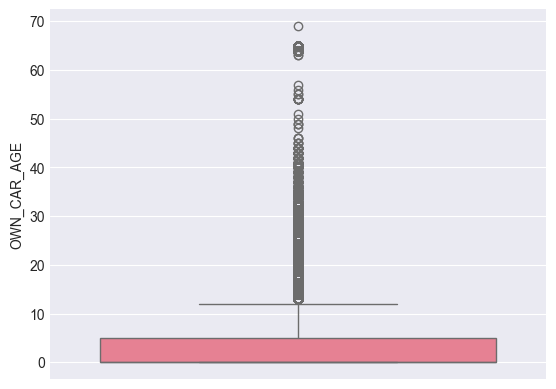

In [30]:
work_df_1 = work_df.copy()
sns.boxplot(work_df_1['OWN_CAR_AGE'])

In [31]:
work_df['OWN_CAR_AGE'] = np.log1p(work_df['OWN_CAR_AGE'])

## OWN_CAR_AGE — Raw vs After cleaning

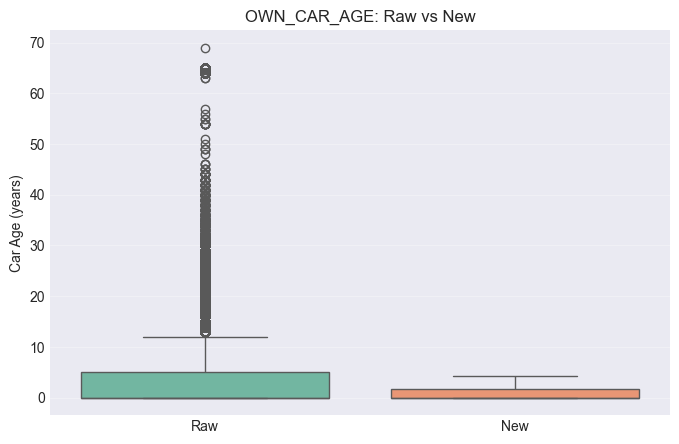

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the two columns
raw = work_df_1["OWN_CAR_AGE"]
new = work_df["OWN_CAR_AGE"]

# Combine into long-format dataframe for seaborn
df_plot = pd.DataFrame({
    "OWN_CAR_AGE": list(raw) + list(new),
    "Type": ["Raw"] * len(raw) + ["New"] * len(new)
})

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df_plot, x="Type", y="OWN_CAR_AGE", palette="Set2")

plt.title("OWN_CAR_AGE: Raw vs New")
plt.xlabel("")
plt.ylabel("Car Age (years)")
plt.grid(axis="y", alpha=0.3)

plt.show()


## Distribution Shift: 


## Data Consistency Check: Post-Cleaning Validation
Verify that filling missing data and cleaning did NOT corrupt the data integrity or introduce unwanted artifacts.

## Data Transformation:

## Feature Scaling

Apply **StandardScaler** (mean=0, std=1) and **MinMaxScaler** (range 0-1) to numeric client demographic columns in `work_df`.

In [62]:
# Identify numeric columns from client_demo_cols present in work_df
numeric_demo_cols = [col for col in client_demo_cols if col in work_df.columns and work_df[col].dtype in ['int64', 'float64']]

print(f"Numeric demographic columns to scale: {len(numeric_demo_cols)}")
print(numeric_demo_cols)
print(f"\nwork_df shape: {work_df.shape}")

Numeric demographic columns to scale: 15
['CNT_CHILDREN', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'DAYS_LAST_PHONE_CHANGE']

work_df shape: (215254, 75)


In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply StandardScaler
scaler_std = StandardScaler()
work_df_scaled_std = work_df.copy()
work_df_scaled_std[numeric_demo_cols] = scaler_std.fit_transform(work_df[numeric_demo_cols])

# Apply MinMaxScaler
scaler_mm = MinMaxScaler()
work_df_scaled_mm = work_df.copy()
work_df_scaled_mm[numeric_demo_cols] = scaler_mm.fit_transform(work_df[numeric_demo_cols])

print("StandardScaler applied: mean=0, std=1")
print("MinMaxScaler applied: range=[0, 1]")
print(f"\nOriginal stats for {numeric_demo_cols[0]}:")
print(f"  Mean: {work_df[numeric_demo_cols[0]].mean():.2f}, Std: {work_df[numeric_demo_cols[0]].std():.2f}")
print(f"\nStandardScaler stats for {numeric_demo_cols[0]}:")
print(f"  Mean: {work_df_scaled_std[numeric_demo_cols[0]].mean():.2e}, Std: {work_df_scaled_std[numeric_demo_cols[0]].std():.2f}")
print(f"\nMinMaxScaler stats for {numeric_demo_cols[0]}:")
print(f"  Min: {work_df_scaled_mm[numeric_demo_cols[0]].min():.2f}, Max: {work_df_scaled_mm[numeric_demo_cols[0]].max():.2f}")

StandardScaler applied: mean=0, std=1
MinMaxScaler applied: range=[0, 1]

Original stats for CNT_CHILDREN:
  Mean: 0.42, Std: 0.72

StandardScaler stats for CNT_CHILDREN:
  Mean: -5.29e-17, Std: 1.00

MinMaxScaler stats for CNT_CHILDREN:
  Min: 0.00, Max: 1.00


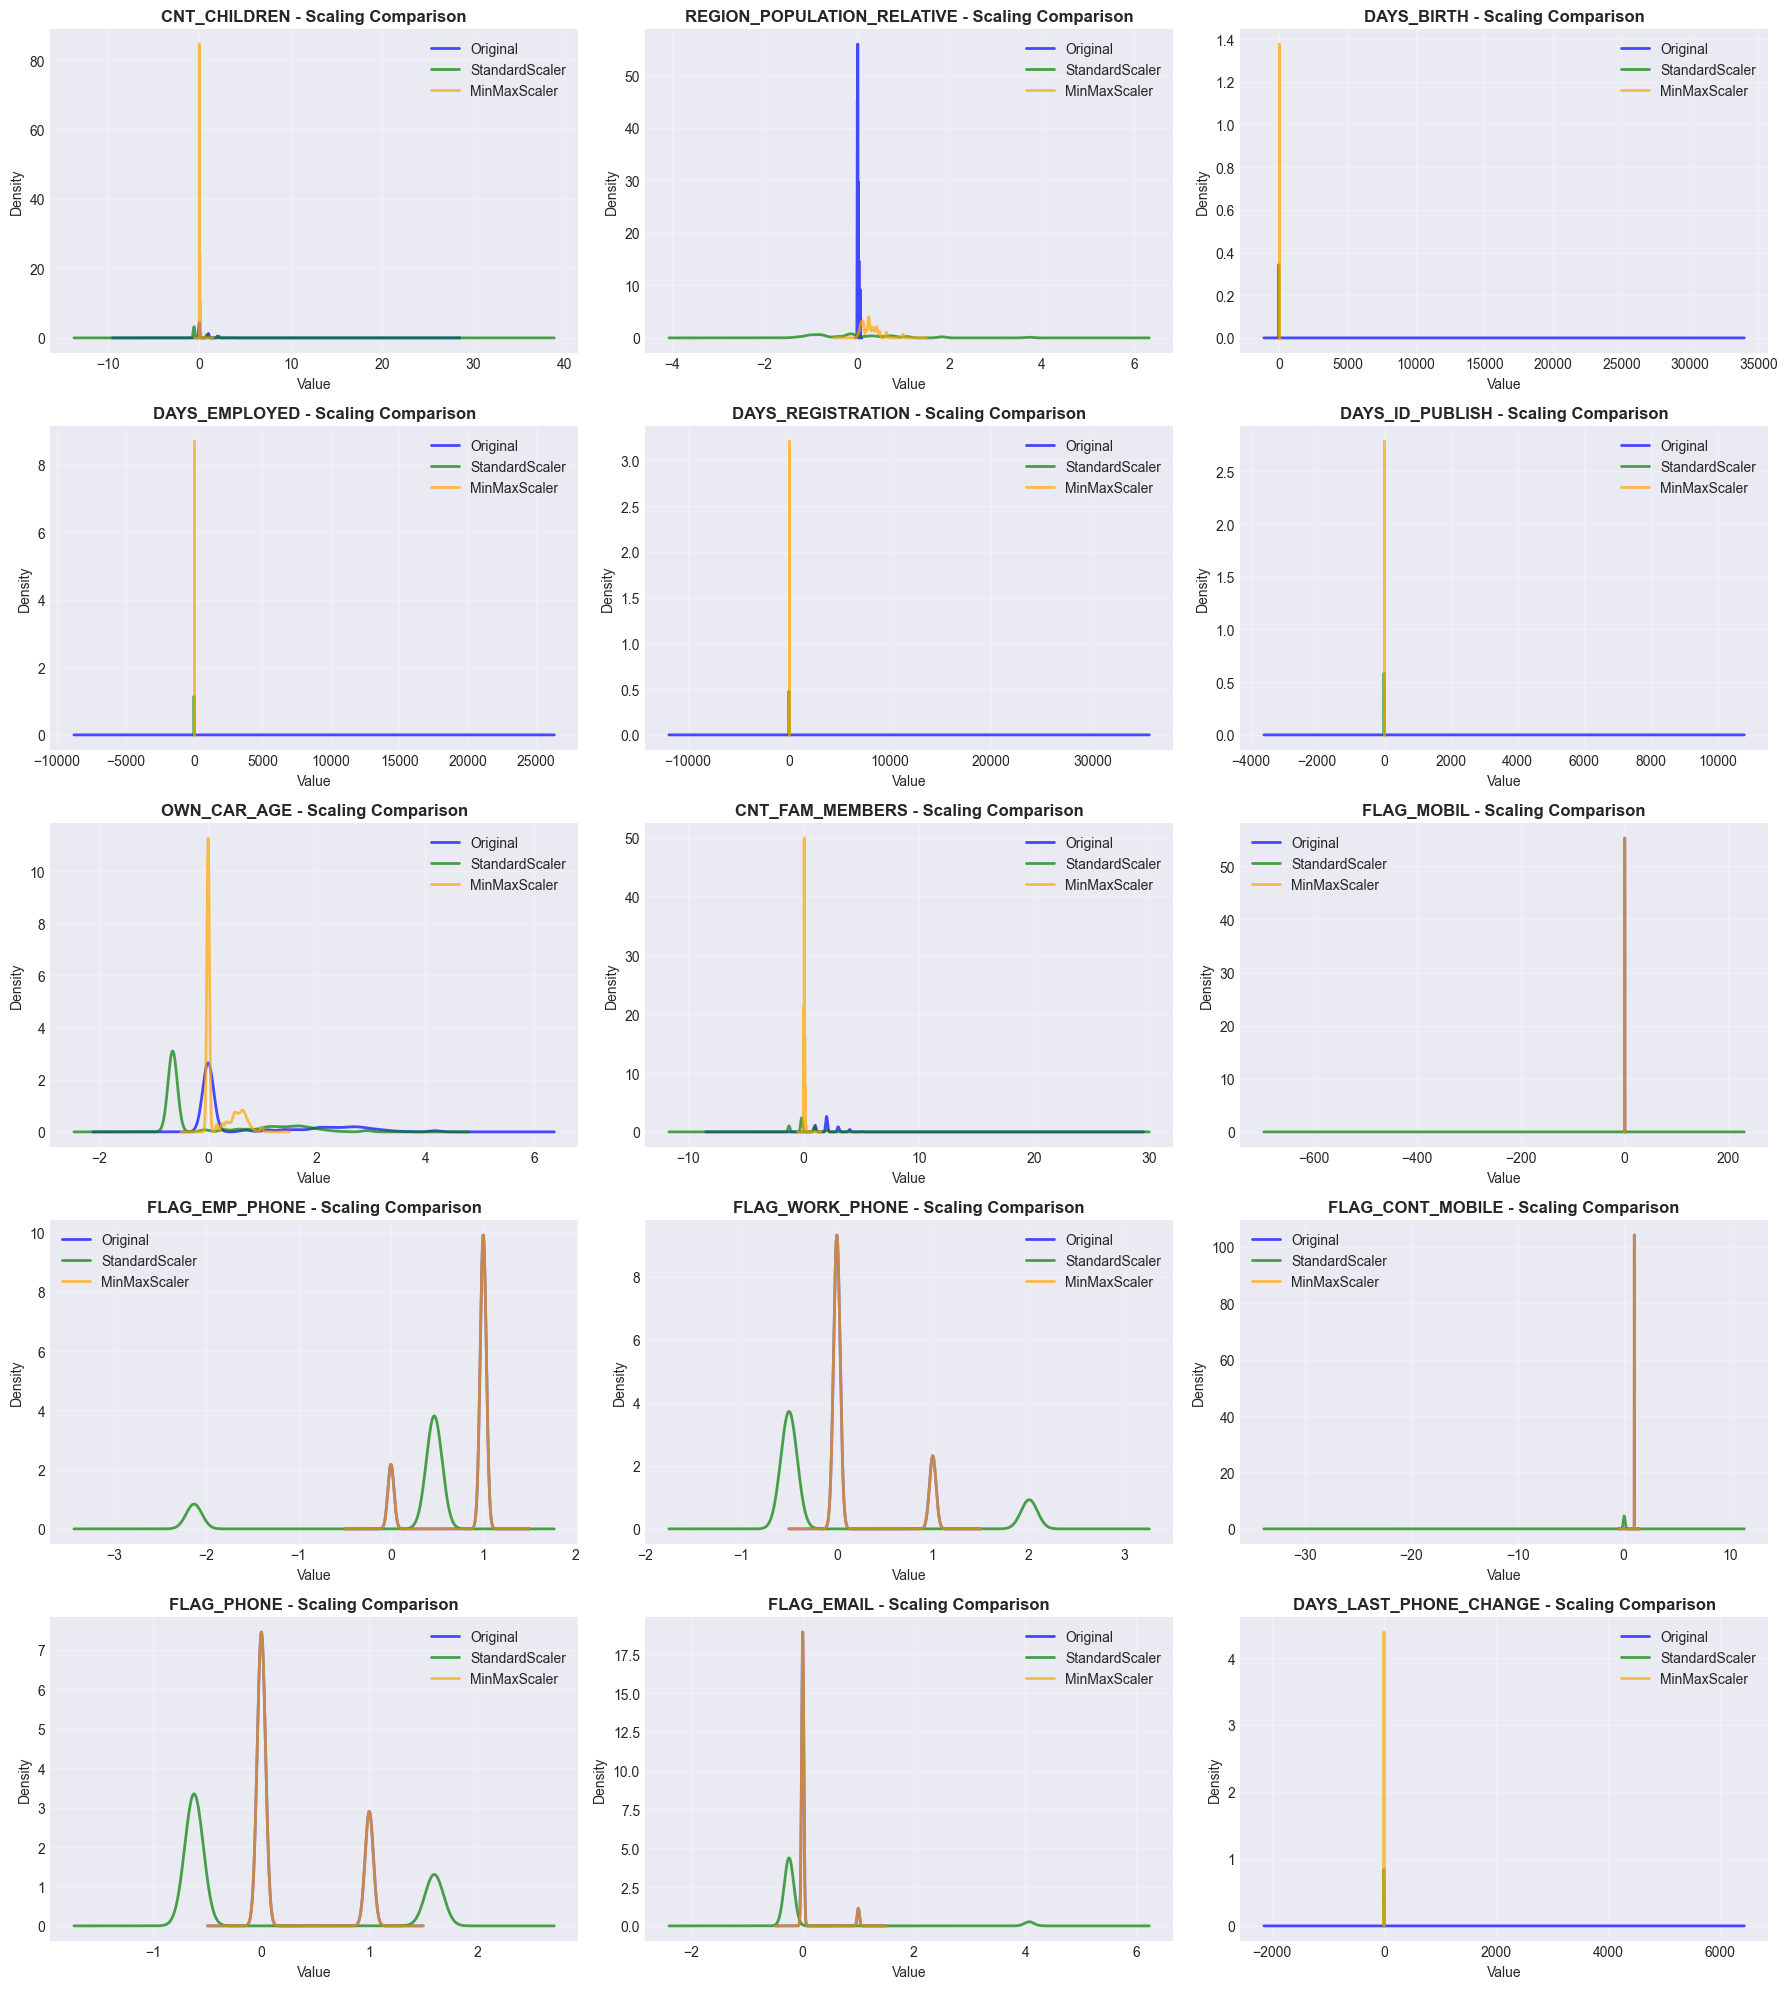

Scaling Summary:
StandardScaler: Centers data around mean=0 with std=1
MinMaxScaler: Rescales data to [0, 1] range
Both methods preserve distribution shape


In [68]:
# Visualize scaling effects: Original vs StandardScaler vs MinMaxScaler
n_cols = len(numeric_demo_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_demo_cols):
    ax = axes[idx]
    
    # Plot all three distributions
    work_df[col].plot(kind='kde', ax=ax, label='Original', color='blue', linewidth=2, alpha=0.7)
    work_df_scaled_std[col].plot(kind='kde', ax=ax, label='StandardScaler', color='green', linewidth=2, alpha=0.7)
    work_df_scaled_mm[col].plot(kind='kde', ax=ax, label='MinMaxScaler', color='orange', linewidth=2, alpha=0.7)
    
    ax.set_title(f'{col} - Scaling Comparison', fontsize=12, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend(loc='best')
    ax.grid(alpha=0.3)

# Hide unused subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("Scaling Summary:")
print(f"StandardScaler: Centers data around mean=0 with std=1")
print(f"MinMaxScaler: Rescales data to [0, 1] range")
print(f"Both methods preserve distribution shape")

## Categorical Encoding

Encode categorical variables based on their type:
- **Binary/Flag variables**: Label Encoding (0/1)
- **Ordinal variables**: Ordinal Encoding with proper order
- **Nominal variables**: One-Hot Encoding for multi-class categories

In [71]:
# Separate categorical variables by encoding strategy
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Binary/Flag variables (already 0/1 or can be label encoded)
binary_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
               'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 
               'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Ordinal variable with inherent order
ordinal_var = 'NAME_EDUCATION_TYPE'
education_order = ['Lower secondary', 'Secondary / secondary special', 
                   'Incomplete higher', 'Higher education', 'Academic degree']

# Nominal variables (multi-class categories)
nominal_multiclass = ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 
                      'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

print("Encoding Strategy Summary:")
print(f" 1.Binary/Flag variables ({len(binary_vars)}): Label Encoding")
print(f"   {binary_vars}")
print(f"\n2. Ordinal variable (1): Ordinal Encoding with order")
print(f"   {ordinal_var}")
print(f"   Order: {education_order}")
print(f"\n3. Nominal multi-class ({len(nominal_multiclass)}): One-Hot Encoding")
print(f"   {nominal_multiclass}")

Encoding Strategy Summary:
 1.Binary/Flag variables (9): Label Encoding
   ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

2. Ordinal variable (1): Ordinal Encoding with order
   NAME_EDUCATION_TYPE
   Order: ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']

3. Nominal multi-class (5): One-Hot Encoding
   ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


### 1. Label Encoding for Binary/Flag Variables

In [70]:
# Apply Label Encoding to binary/flag variables
work_df_encoded = work_df.copy()

label_encoders = {}
for col in binary_vars:
    if col in work_df_encoded.columns:
        le = LabelEncoder()
        # Handle missing values
        mask = work_df_encoded[col].notna()
        work_df_encoded.loc[mask, col] = le.fit_transform(work_df_encoded.loc[mask, col].astype(str))
        label_encoders[col] = le
        
        print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\nLabel encoding completed for {len(label_encoders)} binary/flag variables")

CODE_GENDER: {'F': 0, 'M': 1}
FLAG_OWN_CAR: {'N': 0, 'Y': 1}
FLAG_OWN_REALTY: {'N': 0, 'Y': 1}
FLAG_MOBIL: {'0': 0, '1': 1}
FLAG_EMP_PHONE: {'0': 0, '1': 1}
FLAG_WORK_PHONE: {'0': 0, '1': 1}
FLAG_CONT_MOBILE: {'0': 0, '1': 1}
FLAG_PHONE: {'0': 0, '1': 1}
FLAG_EMAIL: {'0': 0, '1': 1}

Label encoding completed for 9 binary/flag variables
FLAG_CONT_MOBILE: {'0': 0, '1': 1}
FLAG_PHONE: {'0': 0, '1': 1}
FLAG_EMAIL: {'0': 0, '1': 1}

Label encoding completed for 9 binary/flag variables


### 2. Ordinal Encoding for Education Level

In [ ]:
# Apply Ordinal Encoding to NAME_EDUCATION_TYPE
if ordinal_var in work_df_encoded.columns:
    # Create mapping based on education order
    ordinal_mapping = {level: idx for idx, level in enumerate(education_order)}
    
    # Check current unique values
    current_values = work_df_encoded[ordinal_var].unique()
    print(f"Current unique values in {ordinal_var}:")
    print(current_values)
    
    # Apply mapping
    work_df_encoded[f'{ordinal_var}_ENCODED'] = work_df_encoded[ordinal_var].map(ordinal_mapping)
    
    print(f"\n Ordinal Encoding Mapping:")
    for level, code in ordinal_mapping.items():
        count = (work_df_encoded[ordinal_var] == level).sum()
        print(f"   {level:30s} → {code}  (n={count:,})")
    
    print(f"\nOrdinal encoding completed for {ordinal_var}")
else:
    print(f"{ordinal_var} not found in work_df")

### 3. One-Hot Encoding for Nominal Multi-Class Variables

In [73]:
# Apply One-Hot Encoding to nominal multi-class variables
# First, check cardinality of each nominal variable
print("Cardinality of Nominal Variables:")
for col in nominal_multiclass:
    if col in work_df_encoded.columns:
        n_unique = work_df_encoded[col].nunique()
        print(f"{col:30s}: {n_unique:3d} unique values")
        
        # Show top 5 categories
        top_5 = work_df_encoded[col].value_counts().head(5)
        for cat, count in top_5.items():
            print(f"  └─ {str(cat):40s}: {count:6,} ({count/len(work_df_encoded)*100:.1f}%)")
        print()

Cardinality of Nominal Variables:
NAME_INCOME_TYPE              :   8 unique values
  └─ Working                                 : 111,201 (51.7%)
  └─ Commercial associate                    : 50,131 (23.3%)
  └─ Pensioner                               : 38,780 (18.0%)
  └─ State servant                           : 15,101 (7.0%)
  └─ Unemployed                              :     18 (0.0%)

NAME_FAMILY_STATUS            :   6 unique values
  └─ Married                                 : 137,711 (64.0%)
  └─ Single / not married                    : 31,692 (14.7%)
  └─ Civil marriage                          : 20,774 (9.7%)
  └─ Separated                               : 13,834 (6.4%)
  └─ Widow                                   : 11,241 (5.2%)

NAME_HOUSING_TYPE             :   6 unique values
  └─ House / apartment                       : 191,151 (88.8%)
  └─ With parents                            : 10,321 (4.8%)
  └─ Municipal apartment                     :  7,797 (3.6%)
  └─ Rented 

In [74]:
# Apply One-Hot Encoding (using pd.get_dummies)
# Note: For high-cardinality variables like ORGANIZATION_TYPE, we may want to limit categories

# Identify high cardinality columns (>20 unique values)
high_cardinality = []
for col in nominal_multiclass:
    if col in work_df_encoded.columns and work_df_encoded[col].nunique() > 20:
        high_cardinality.append(col)

print(f" High-cardinality variables (>20 categories): {high_cardinality}")
print(f"   These will create many dummy columns. Consider grouping rare categories.\n")

# Perform One-Hot Encoding
cols_to_encode = [col for col in nominal_multiclass if col in work_df_encoded.columns]

if cols_to_encode:
    # Get dummies with drop_first=False to keep all categories visible
    work_df_onehot = pd.get_dummies(work_df_encoded, 
                                     columns=cols_to_encode, 
                                     prefix=cols_to_encode,
                                     drop_first=False,  # Keep all categories
                                     dtype=int)
    
    # Count new columns created
    new_cols = len(work_df_onehot.columns) - len(work_df_encoded.columns) + len(cols_to_encode)
    
    print(f"One-Hot Encoding completed")
    print(f"   Original columns: {len(work_df_encoded.columns)}")
    print(f"   Encoded columns: {len(work_df_onehot.columns)}")
    print(f"   New dummy columns created: {new_cols}")
    print(f"\n   Shape before: {work_df_encoded.shape}")
    print(f"   Shape after:  {work_df_onehot.shape}")
else:
    work_df_onehot = work_df_encoded.copy()
    print("No nominal variables found to encode")

 High-cardinality variables (>20 categories): ['ORGANIZATION_TYPE']
   These will create many dummy columns. Consider grouping rare categories.

One-Hot Encoding completed
   Original columns: 75
   Encoded columns: 167
   New dummy columns created: 97

   Shape before: (215254, 75)
   Shape after:  (215254, 167)


### Encoding Summary & Comparison

In [75]:
# Create summary of encoding operations
encoding_summary = pd.DataFrame({
    'Encoding_Type': ['Label Encoding', 'Ordinal Encoding', 'One-Hot Encoding'],
    'Variables': [
        ', '.join(binary_vars[:3]) + f'... ({len(binary_vars)} total)',
        ordinal_var,
        ', '.join(nominal_multiclass[:2]) + f'... ({len(nominal_multiclass)} total)'
    ],
    'Columns_Before': [len(binary_vars), 1, len(nominal_multiclass)],
    'Columns_After': [
        len(binary_vars),  # Label encoding keeps same number
        1,  # Ordinal encoding adds 1 new column (kept original)
        new_cols if 'new_cols' in locals() else 0  # One-hot creates multiple
    ]
})

print("ENCODING SUMMARY")
display(encoding_summary)

print(f"\nFinal Dataset Shape: {work_df_onehot.shape}")
print(f"   • Original work_df: {work_df.shape}")
print(f"   • After all encodings: {work_df_onehot.shape}")
print(f"   • Total columns added: {work_df_onehot.shape[1] - work_df.shape[1]}")

ENCODING SUMMARY


,Encoding_Type,Variables,Columns_Before,Columns_After
0,Label Encoding,"CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY... (9 total)",9,9
1,Ordinal Encoding,NAME_EDUCATION_TYPE,1,1
2,One-Hot Encoding,"NAME_INCOME_TYPE, NAME_FAMILY_STATUS... (5 total)",5,97



Final Dataset Shape: (215254, 167)
   • Original work_df: (215254, 75)
   • After all encodings: (215254, 167)
   • Total columns added: 92
